 # Название проекта

**Прогнозирование оттока клиентов оператора связи**

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

## Описание данных


Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

## Описание полей данных

• BeginDate – дата начала пользования услугами,

• EndDate – дата окончания пользования услугами,

• Type – тип оплаты: ежемесячный, годовой и тд,

• PaperlessBilling – электронный платёжный документ,

• PaymentMethod – способ оплаты,

• MonthlyCharges – ежемесячные траты на услуги,

• TotalCharges – всего потрачено денег на услуги

• Dependents – наличие иждивенцев

• Senior Citizen – наличие пенсионного статуса по возрасту

• Partner – наличие супруга(и)

• MultipleLines – наличие возможности ведения параллельных линий во
время звонка

In [1]:
import pandas as pd

***Загрузим и ознакомимся с данными о договре***

In [2]:
contract = pd.read_csv('contract_new.csv')

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Итак, мы видим пропусков в данных нет, тип данных во всех столбцах кроме ежемесячных трат на услуги представлен в виде  object, надо будет изменять по необходимости.

In [5]:
#Проверим дубликаты
contract.duplicated().sum()

0

Дубликатов нет

В Столбцах Type, PaperlessBilling, PaymentMethod  категориальные признаки, поэтому менять тип данных не будем.

Рассмотрим столбец TotalCharges

In [6]:
contract['TotalCharges'].value_counts()

           11
20.45       6
101.0       5
40.1        4
732.6       4
           ..
245.7       1
1052.15     1
5327.7      1
1718.64     1
3374.4      1
Name: TotalCharges, Length: 6658, dtype: int64

In [7]:
missing_rows = contract.loc[contract['TotalCharges'] == ' ']

In [8]:
missing_rows

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Итак, мы видим, что это все новые клиенты которые пришли 1.02.2020, заполнять эти пропуски не будем, целесообразнее удалить эти строки, их все 11 штук.

In [9]:
contract = contract.loc[contract['TotalCharges'] != ' ']

Теперь поменям тип данных в столбце TotalCharges на float64

In [10]:
contract['TotalCharges'] = contract['TotalCharges'].astype(float)

In [11]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 494.4+ KB


Также, рассмотрим столбец EndDate, из него в последствии мы сделаем целевой признак, ушел клиент или остался. Но также, на основе этого столбца, нам необходимо вычислить срок, в течении которого человек является клиентом компании. Займемся этим позже.

***Загрузим и ознакомимся с данными о персональных данных клиента***

In [12]:
personal = pd.read_csv('personal_new.csv')   

In [13]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Итак, пропусков в данных нет, во всех столбцах категориальные данные, но в столбце SeniorCitizen тип данных int64, заменим его на object

In [15]:
personal['SeniorCitizen'] = personal['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [16]:
personal['SeniorCitizen'] = personal['SeniorCitizen'].astype(object)

In [17]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   object
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


In [18]:
personal['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [19]:
#Проверим дубликаты
personal.duplicated().sum()

0

***Загрузим и ознакомимся с данными об интернет-услугах***

In [20]:
try:
    internet = pd.read_csv('internet_new.csv')
except:
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')

In [21]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [23]:
#Проверим дубликаты
internet.duplicated().sum()

0

Здесь все столбцы категориальные, тип данных правильный.

***Загрузим и ознакомимся с данными об услугах телефонии***

In [24]:
phone = pd.read_csv('phone_new.csv')

In [25]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [26]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Здесь все столбцы категориальные, тип данных правильный.

**Объединим таблицы**

In [27]:
#Объединим  таблицы contract и personal, должны остаться только общие ID, так как в contract мы удаляли строки
merged_df = pd.merge(contract, personal, on='customerID')

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   object 
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
dtypes: float64(2), object(10)
memory usage: 714.2+ KB


In [29]:
# Присоединим таблицу  internet
merged_internet = pd.merge(merged_df, internet, on='customerID', how='left')

In [30]:
merged_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   object 
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


In [31]:
merged_internet.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No


In [32]:
# Присоединим таблицу phone и получим итоговый датасет
data = pd.merge(merged_internet, phone, on='customerID', how='left')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   object 
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


Итак, мы получили итоговый датафрейм, с которым будем работать, очевидно в нем есть пропуски, все они в категориальных столбцах, поэтому поставим заглушки 'unknown'

In [34]:
data = data.fillna('unknown')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   object 
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


**Создадим столбец с целевым признаком и преобразуем его**

In [36]:
#Посмотрим значения столбца
data['EndDate'].value_counts()

No            5931
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-09-01       2
2015-04-01       2
2014-11-01       1
2014-06-01       1
2014-10-01       1
Name: EndDate, Length: 67, dtype: int64

In [37]:
#Добавим столбец с целевым признаком
data['Exited'] = data['EndDate'].copy()

In [38]:
#Заменим все значения, где проставлена дата на 1, то есть клиент ушел
data['Exited'] = data['Exited'].map(lambda x: 1 if x != "No" else x)

In [39]:
#Заменим все значения, где No  на 0, то есть клиент остался
data['Exited']  = data['Exited'] .replace("No", 0)

In [40]:
data['Exited'].value_counts(normalize=True)

0    0.84343
1    0.15657
Name: Exited, dtype: float64

Итак, мы видим явный дисбаланс классов, 84% оставшихся клиентов против 16% ушедших.

**Теперь создадим столбец, где будет отражена продолжительность договора клиента**

In [41]:
# Заменим в столбце EndDate значения No на 2020-02-01, так как данные актуальны на эту дату
data['EndDate'] = data['EndDate'].replace("No", '2020-02-01')

In [42]:
data['EndDate'].value_counts()

2020-02-01    5931
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2015-04-01       2
2014-09-01       2
2014-10-01       1
2014-06-01       1
2014-11-01       1
Name: EndDate, Length: 67, dtype: int64

In [43]:
# Преобразуем столбцы в тип данных datetime
data['EndDate'] = pd.to_datetime(data['EndDate'])
data['BeginDate'] = pd.to_datetime(data['BeginDate'])

In [44]:
#Вычислим продолжительность и сохраненим в новый столбец
data['duration'] = data['EndDate'] - data['BeginDate']

In [45]:
data['duration']

0        31 days
1      1036 days
2       123 days
3      1371 days
4       153 days
          ...   
7027    730 days
7028   2191 days
7029    337 days
7030    215 days
7031   2010 days
Name: duration, Length: 7032, dtype: timedelta64[ns]

In [46]:
# Преобразование timedelta64 в дни
data['duration'] = data['duration'].dt.days

In [47]:
data['duration'].value_counts()

2191    265
153     249
92      243
31      236
123     236
       ... 
789       1
305       1
121       1
2068      1
28        1
Name: duration, Length: 250, dtype: int64

Теперь нам не понадобятся столбцы EndDate и BeginDate, а также customerID не нужен нам для целей машинного обучения, поэтому удалим их.

In [48]:
data = data.drop(['EndDate', 'BeginDate', 'customerID'], axis=1)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   gender            7032 non-null   object 
 6   SeniorCitizen     7032 non-null   object 
 7   Partner           7032 non-null   object 
 8   Dependents        7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  MultipleLines     7032 non-null   object 


# План работы
 - EDA
 - Разделить исходные данные на обучающую и тестовую выборки 
 - Провести кодирование категориальных признаков
 - Создадим переменные для признаков и целевого признака
 - Обучение  моделей с подбором гиперпараметров
 - Выбрать  лучшую модель
 - Провести финальное тестирование

# EDA

In [50]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from catboost import CatBoostRegressor, Pool

***Посмотрим на распределение клиентов по длительности договора***

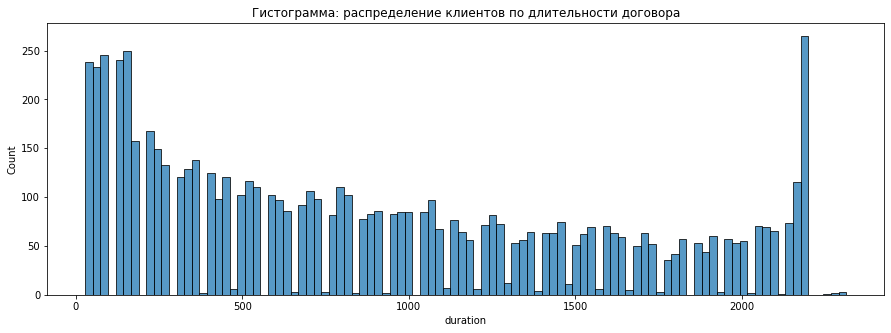

In [51]:
plt.figure(figsize=(15,5))  
sns.histplot(data['duration'],bins=100)
plt.title("Гистограмма: распределение клиентов по длительности договора");

Text(0.5, 1.0, 'График ящик с усами: распределение клиентов по длительности договора')

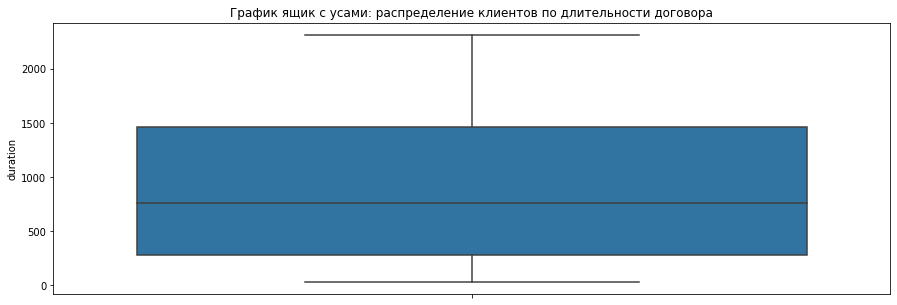

In [52]:
plt.figure(figsize=(15,5))  
sns.boxplot(y="duration", data=data);
plt.title("График ящик с усами: распределение клиентов по длительности договора")

In [53]:
data['duration'].describe()

count    7032.000000
mean      899.961320
std       682.738777
min        28.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: duration, dtype: float64

Итак, мы видим что средняя длительность договора около 900 дней. Но величина распределена не равнономерно, большое количество договоров со сроком до 200 дней, а также большое колиество со сроком свыше 2000 дней.

***Посмотрим на распределение клиентов по ежемесячным тратам на услуги***

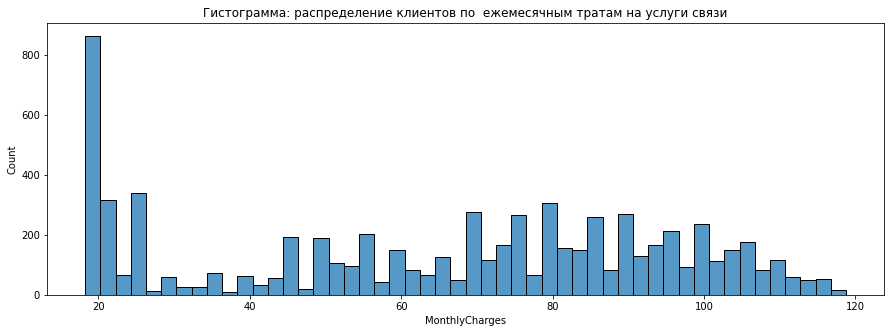

In [54]:
plt.figure(figsize=(15,5))  
sns.histplot(data['MonthlyCharges'],bins=50)
plt.title("Гистограмма: распределение клиентов по  ежемесячным тратам на услуги связи");

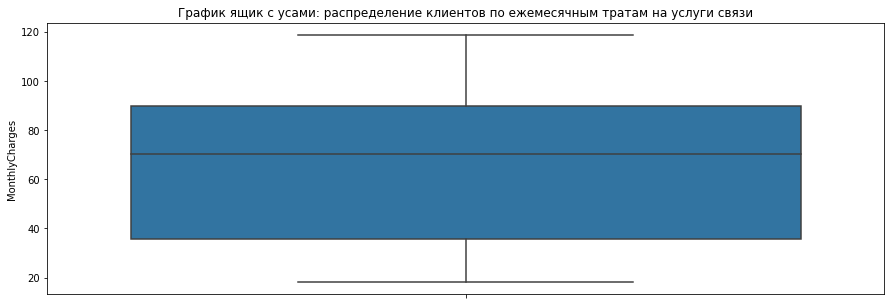

In [55]:
plt.figure(figsize=(15,5))  
sns.boxplot(y="MonthlyCharges", data=data);
plt.title("График ящик с усами: распределение клиентов по ежемесячным тратам на услуги связи");

In [56]:
data['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

Итак, мы видим что средняя плата за ежемесячные услуги связи составляет около 65 ден.ед. Но наблюдается большое количество пользвателей, которые платят до 20 ден. ед.

***Построим матрицу коррелиции для численных признаков ( используем корреляцию Спирмена)***

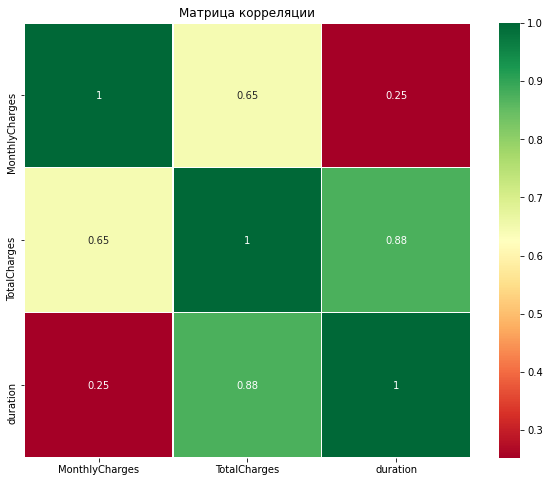

In [57]:
data_corr = data.drop('Exited', axis=1)
correlation_matrix = data_corr.corr(method='spearman')

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('Матрица корреляции')
plt.show()

Видим весомую корреляцию между совокупными затратами на услуги связи и длительностью договора, что логично.

In [58]:
! pip install phik

In [59]:
import phik

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'Exited', 'duration']


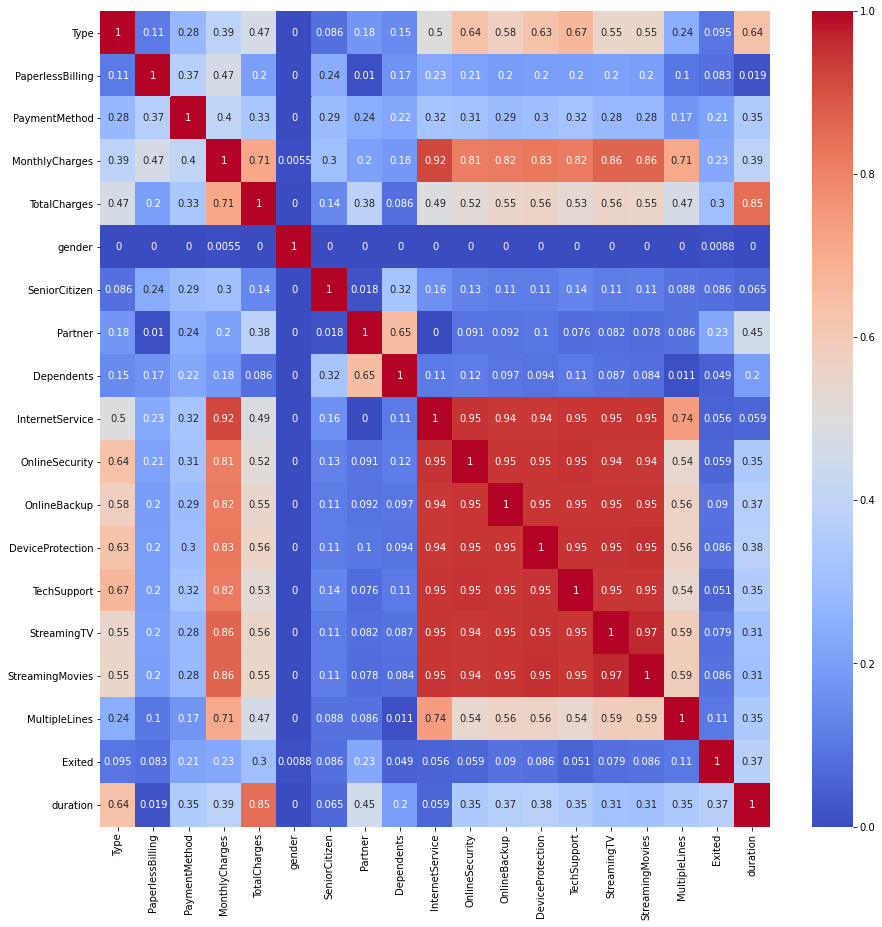

In [60]:
# Вычисление матрицы корреляции phi_k

correlation_matrix1 = data.phik_matrix()

plt.figure(figsize=(15,15))
# Построение тепловой карты
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')

# Отображение плота

plt.show()

Итак, мы видим наличие сильной корреляции в зоне интернет сервисов. Можно предположить если есть услуга интернет сервис, значит и все остальные услуги OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingT,  StreamingMovies тоже подключены. Соответственно эти стобцы для дальнейшего построения модели машинного обучения нам не нужны и можно их удалить.

In [61]:
#Удаление столбцов OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
columns_drop = ['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data = data.drop(columns=columns_drop)

interval columns not set, guessing: ['Exited']


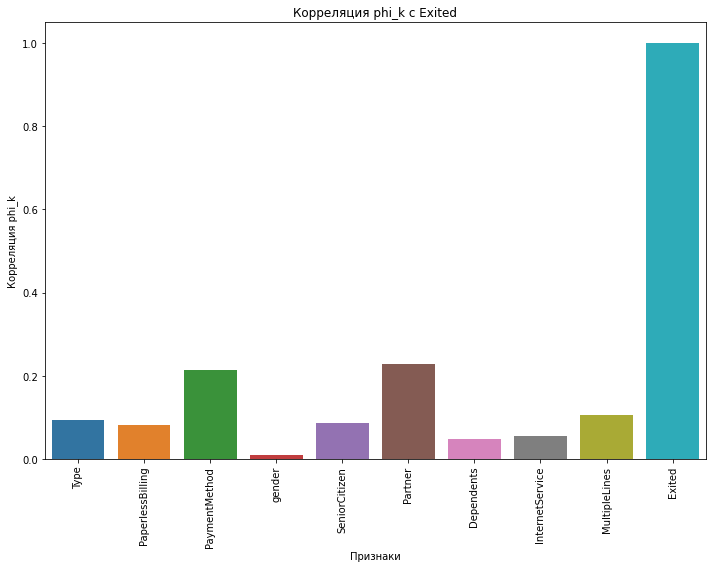

In [62]:
columns_for_drop = ['duration', 'MonthlyCharges', 'TotalCharges']
data_phik_target = data.drop(columns=columns_for_drop)

# Вычисление матрицы корреляции phi_k
correlation_matrix = data_phik_target.phik_matrix()

# Выбор столбца, содержащего целевую переменную
target_column = 'Exited'

# Получение корреляции с таргетом
correlation_with_target = correlation_matrix[target_column]

# Создание фигуры с заданными размерами
plt.figure(figsize=(10, 8))

# Построение плота корреляции
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)

# Настройка осей и названия графика
plt.xlabel('Признаки')
plt.ylabel('Корреляция phi_k')
plt.title(f'Корреляция phi_k с {target_column}')

# Вывод плота
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Ну также сильной корреляции какого-либо категориального признака с таргетом не обнаружено.

***Проверка на дисбаланс классов, чувствительность метрики к дисбалансу***

Ранее мы провели оценку дисбаланса классов, выяснили что дисбаланс присутствует, соотношение 84 на 16%.
Метрика AUC-ROC не является чувствительной к дисбалансу классов. AUC-ROC оценивает качество модели, измеряя ее способность различать между классами. Она учитывает все возможные пороги классификации и оценивает суммарное качество классификации. Поэтому балансировкой заниматься не будем.

## Деление на выборки

***Разделим датасет на тестовую и обучающую выборки, для тестовой оставим 25%***

In [63]:
data_train, data_test = train_test_split(data, test_size=0.25, random_state=220523)

In [64]:
#Проверим размеры выборок
len(data_train)

5274

In [65]:
len(data_test)

1758

***Создадим переменные для признаков и целевого признака***

In [66]:
features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']
features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

## Обучим модели

**LogisticRegression**

In [67]:
!pip install scikit-learn==1.1.3

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [69]:
# В переменную numeric добавим численные признаки
numeric_features = ['duration', 'MonthlyCharges', 'TotalCharges']

In [70]:
# В переменную categorical_features добавим категориальные признаки
categorical_features = (['Type', 'PaperlessBilling', 'PaymentMethod', 
                         'gender','SeniorCitizen','Partner',
                         'Dependents', 'InternetService','MultipleLines'])

In [71]:
# Определение пайплайна для предобработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),  # Стандартизация численных признаков
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)  # Кодирование категориальных признаков
    ])

In [72]:
# Определение модели логистической регрессии
model = LogisticRegression(random_state=220523)

In [73]:
# Создание пайплайна
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [74]:
# Определение сетки параметров для GridSearchCV
param_grid = {
    'model__C': [0.1, 1, 10]
}

In [75]:
# Создание объекта GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='roc_auc')

In [76]:
grid_search.fit(features_train, target_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'InternetService',
                                                                          'MultipleLines'])])),
                                       ('model',
                                        LogisticRegression(random_state=220523))]),
             param_grid={'model__C': [0.1, 1, 10]}, scoring='roc_auc')

In [77]:
# Получение лучшей модели
best_model = grid_search.best_estimator_

# Получение лучшего score
best_score = grid_search.best_score_

In [78]:
print(best_score)

0.7528496753457077


Итак, полученный roc_auc  составляет 0.75, не дотягивает до целевого результата, очевидно модель логистической регрессии не лучший вариант.

**CatBoostClassifier**

CatBoost может сам кодировать категории из типа данных 'object' и 'category', но эта кодровка занимает дополнительное время. Будем кодировать OE, чтобы получилось быстрее.

In [79]:
from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostClassifier

In [80]:
# Определение модели CatBoostClassifier
model_cb = CatBoostClassifier(random_state=220523)

In [81]:

# Определение пайплайна для предобработки признаков
preprocessor_cb = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),  # Стандартизация численных признаков
        ('categorical', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)  # Кодирование категориальных признаков
    ])



In [82]:
# Создание пайплайна
pipeline_cb = Pipeline([
    ('preprocessor', preprocessor_cb),
    ('model', model_cb)
])


In [83]:
# Определение сетки параметров для GridSearchCV
param_grid_cb = {
    'model__learning_rate': [0.1, 0.01, 0.001],  # Скорость обучения модели CatBoostClassifier
    'model__depth': [5, 7]  # Глубина дерева модели CatBoostClassifier
}

In [84]:
# Создание объекта GridSearchCV
grid_search_cb = GridSearchCV(pipeline_cb, param_grid_cb, cv=5, scoring='roc_auc')

In [85]:
# Обучение модели с подбором параметров
grid_search_cb.fit(features_train, target_train)

0:	learn: 0.6233542	total: 60.5ms	remaining: 1m
1:	learn: 0.5698100	total: 61.6ms	remaining: 30.7s
2:	learn: 0.5151527	total: 62.7ms	remaining: 20.8s
3:	learn: 0.4848168	total: 63.6ms	remaining: 15.8s
4:	learn: 0.4544272	total: 64.6ms	remaining: 12.9s
5:	learn: 0.4290722	total: 65.6ms	remaining: 10.9s
6:	learn: 0.4087030	total: 66.6ms	remaining: 9.45s
7:	learn: 0.3977679	total: 67.7ms	remaining: 8.39s
8:	learn: 0.3848229	total: 68.7ms	remaining: 7.56s
9:	learn: 0.3749370	total: 69.8ms	remaining: 6.91s
10:	learn: 0.3666425	total: 71.2ms	remaining: 6.41s
11:	learn: 0.3599714	total: 72.3ms	remaining: 5.95s
12:	learn: 0.3540981	total: 73.5ms	remaining: 5.58s
13:	learn: 0.3489695	total: 74.8ms	remaining: 5.27s
14:	learn: 0.3443506	total: 76ms	remaining: 4.99s
15:	learn: 0.3413801	total: 77.2ms	remaining: 4.75s
16:	learn: 0.3383385	total: 78.2ms	remaining: 4.52s
17:	learn: 0.3361095	total: 79.5ms	remaining: 4.34s
18:	learn: 0.3342098	total: 80.7ms	remaining: 4.17s
19:	learn: 0.3326322	total:

162:	learn: 0.2253685	total: 253ms	remaining: 1.3s
163:	learn: 0.2245304	total: 254ms	remaining: 1.29s
164:	learn: 0.2240736	total: 255ms	remaining: 1.29s
165:	learn: 0.2238839	total: 257ms	remaining: 1.29s
166:	learn: 0.2225865	total: 258ms	remaining: 1.29s
167:	learn: 0.2221262	total: 259ms	remaining: 1.28s
168:	learn: 0.2216889	total: 260ms	remaining: 1.28s
169:	learn: 0.2213031	total: 262ms	remaining: 1.28s
170:	learn: 0.2210404	total: 263ms	remaining: 1.27s
171:	learn: 0.2208038	total: 265ms	remaining: 1.27s
172:	learn: 0.2197875	total: 266ms	remaining: 1.27s
173:	learn: 0.2184051	total: 267ms	remaining: 1.27s
174:	learn: 0.2179974	total: 268ms	remaining: 1.26s
175:	learn: 0.2173094	total: 269ms	remaining: 1.26s
176:	learn: 0.2168177	total: 270ms	remaining: 1.26s
177:	learn: 0.2164943	total: 271ms	remaining: 1.25s
178:	learn: 0.2155306	total: 273ms	remaining: 1.25s
179:	learn: 0.2152021	total: 274ms	remaining: 1.25s
180:	learn: 0.2149983	total: 275ms	remaining: 1.24s
181:	learn: 0

322:	learn: 0.1571742	total: 445ms	remaining: 932ms
323:	learn: 0.1568493	total: 446ms	remaining: 930ms
324:	learn: 0.1566136	total: 447ms	remaining: 928ms
325:	learn: 0.1562912	total: 448ms	remaining: 926ms
326:	learn: 0.1560782	total: 449ms	remaining: 925ms
327:	learn: 0.1558931	total: 450ms	remaining: 923ms
328:	learn: 0.1557285	total: 451ms	remaining: 921ms
329:	learn: 0.1556554	total: 453ms	remaining: 919ms
330:	learn: 0.1554027	total: 454ms	remaining: 917ms
331:	learn: 0.1553553	total: 455ms	remaining: 916ms
332:	learn: 0.1552155	total: 456ms	remaining: 914ms
333:	learn: 0.1549654	total: 458ms	remaining: 913ms
334:	learn: 0.1546881	total: 459ms	remaining: 912ms
335:	learn: 0.1545022	total: 460ms	remaining: 910ms
336:	learn: 0.1542481	total: 462ms	remaining: 908ms
337:	learn: 0.1536568	total: 463ms	remaining: 907ms
338:	learn: 0.1535659	total: 464ms	remaining: 906ms
339:	learn: 0.1533968	total: 466ms	remaining: 904ms
340:	learn: 0.1533734	total: 467ms	remaining: 902ms
341:	learn: 

483:	learn: 0.1249700	total: 637ms	remaining: 679ms
484:	learn: 0.1248336	total: 638ms	remaining: 678ms
485:	learn: 0.1244867	total: 640ms	remaining: 677ms
486:	learn: 0.1241338	total: 641ms	remaining: 675ms
487:	learn: 0.1239491	total: 642ms	remaining: 673ms
488:	learn: 0.1237296	total: 643ms	remaining: 672ms
489:	learn: 0.1234230	total: 644ms	remaining: 670ms
490:	learn: 0.1233568	total: 645ms	remaining: 669ms
491:	learn: 0.1230063	total: 646ms	remaining: 667ms
492:	learn: 0.1228391	total: 648ms	remaining: 666ms
493:	learn: 0.1225632	total: 649ms	remaining: 665ms
494:	learn: 0.1223774	total: 650ms	remaining: 663ms
495:	learn: 0.1222539	total: 652ms	remaining: 662ms
496:	learn: 0.1221506	total: 653ms	remaining: 661ms
497:	learn: 0.1218128	total: 654ms	remaining: 659ms
498:	learn: 0.1215691	total: 655ms	remaining: 658ms
499:	learn: 0.1213735	total: 656ms	remaining: 656ms
500:	learn: 0.1212181	total: 657ms	remaining: 655ms
501:	learn: 0.1210864	total: 659ms	remaining: 653ms
502:	learn: 

674:	learn: 0.0983823	total: 866ms	remaining: 417ms
675:	learn: 0.0983130	total: 867ms	remaining: 416ms
676:	learn: 0.0981191	total: 868ms	remaining: 414ms
677:	learn: 0.0979800	total: 869ms	remaining: 413ms
678:	learn: 0.0979327	total: 870ms	remaining: 411ms
679:	learn: 0.0978085	total: 871ms	remaining: 410ms
680:	learn: 0.0976504	total: 872ms	remaining: 409ms
681:	learn: 0.0975946	total: 874ms	remaining: 407ms
682:	learn: 0.0974214	total: 875ms	remaining: 406ms
683:	learn: 0.0973532	total: 876ms	remaining: 405ms
684:	learn: 0.0972498	total: 877ms	remaining: 404ms
685:	learn: 0.0971099	total: 879ms	remaining: 402ms
686:	learn: 0.0969627	total: 880ms	remaining: 401ms
687:	learn: 0.0968279	total: 881ms	remaining: 400ms
688:	learn: 0.0966073	total: 882ms	remaining: 398ms
689:	learn: 0.0964509	total: 884ms	remaining: 397ms
690:	learn: 0.0963609	total: 885ms	remaining: 396ms
691:	learn: 0.0963487	total: 886ms	remaining: 394ms
692:	learn: 0.0962777	total: 887ms	remaining: 393ms
693:	learn: 

836:	learn: 0.0812891	total: 1.06s	remaining: 206ms
837:	learn: 0.0811834	total: 1.06s	remaining: 205ms
838:	learn: 0.0811053	total: 1.06s	remaining: 204ms
839:	learn: 0.0809781	total: 1.06s	remaining: 202ms
840:	learn: 0.0808472	total: 1.06s	remaining: 201ms
841:	learn: 0.0807091	total: 1.06s	remaining: 200ms
842:	learn: 0.0806295	total: 1.06s	remaining: 198ms
843:	learn: 0.0804927	total: 1.07s	remaining: 197ms
844:	learn: 0.0803256	total: 1.07s	remaining: 196ms
845:	learn: 0.0802216	total: 1.07s	remaining: 195ms
846:	learn: 0.0801369	total: 1.07s	remaining: 193ms
847:	learn: 0.0800300	total: 1.07s	remaining: 192ms
848:	learn: 0.0798996	total: 1.07s	remaining: 191ms
849:	learn: 0.0798146	total: 1.07s	remaining: 189ms
850:	learn: 0.0797829	total: 1.07s	remaining: 188ms
851:	learn: 0.0797242	total: 1.07s	remaining: 187ms
852:	learn: 0.0795868	total: 1.08s	remaining: 186ms
853:	learn: 0.0794728	total: 1.08s	remaining: 184ms
854:	learn: 0.0792763	total: 1.08s	remaining: 183ms
855:	learn: 

0:	learn: 0.6243134	total: 1.34ms	remaining: 1.34s
1:	learn: 0.5594323	total: 2.29ms	remaining: 1.14s
2:	learn: 0.5108965	total: 3.13ms	remaining: 1.04s
3:	learn: 0.4819334	total: 4.03ms	remaining: 1s
4:	learn: 0.4499147	total: 5.16ms	remaining: 1.03s
5:	learn: 0.4262368	total: 6.11ms	remaining: 1.01s
6:	learn: 0.4062745	total: 6.97ms	remaining: 989ms
7:	learn: 0.3936174	total: 7.93ms	remaining: 983ms
8:	learn: 0.3826042	total: 9.05ms	remaining: 996ms
9:	learn: 0.3737531	total: 10.2ms	remaining: 1.01s
10:	learn: 0.3666966	total: 11.2ms	remaining: 1s
11:	learn: 0.3604852	total: 13ms	remaining: 1.07s
12:	learn: 0.3548381	total: 14.1ms	remaining: 1.07s
13:	learn: 0.3497760	total: 15.1ms	remaining: 1.06s
14:	learn: 0.3467322	total: 16.2ms	remaining: 1.06s
15:	learn: 0.3433359	total: 17.3ms	remaining: 1.06s
16:	learn: 0.3403219	total: 18.4ms	remaining: 1.06s
17:	learn: 0.3384351	total: 19.7ms	remaining: 1.07s
18:	learn: 0.3356956	total: 20.7ms	remaining: 1.07s
19:	learn: 0.3341210	total: 21

166:	learn: 0.2259246	total: 195ms	remaining: 970ms
167:	learn: 0.2255909	total: 196ms	remaining: 969ms
168:	learn: 0.2247135	total: 197ms	remaining: 968ms
169:	learn: 0.2241376	total: 198ms	remaining: 968ms
170:	learn: 0.2232810	total: 199ms	remaining: 967ms
171:	learn: 0.2229902	total: 201ms	remaining: 965ms
172:	learn: 0.2228232	total: 202ms	remaining: 963ms
173:	learn: 0.2217593	total: 203ms	remaining: 963ms
174:	learn: 0.2206713	total: 204ms	remaining: 962ms
175:	learn: 0.2202664	total: 205ms	remaining: 960ms
176:	learn: 0.2196781	total: 206ms	remaining: 959ms
177:	learn: 0.2195418	total: 208ms	remaining: 961ms
178:	learn: 0.2192632	total: 209ms	remaining: 960ms
179:	learn: 0.2182936	total: 210ms	remaining: 958ms
180:	learn: 0.2179357	total: 211ms	remaining: 957ms
181:	learn: 0.2175628	total: 213ms	remaining: 955ms
182:	learn: 0.2174059	total: 214ms	remaining: 954ms
183:	learn: 0.2164816	total: 215ms	remaining: 953ms
184:	learn: 0.2160731	total: 217ms	remaining: 954ms
185:	learn: 

328:	learn: 0.1612669	total: 387ms	remaining: 789ms
329:	learn: 0.1609509	total: 388ms	remaining: 789ms
330:	learn: 0.1606825	total: 390ms	remaining: 788ms
331:	learn: 0.1601809	total: 391ms	remaining: 786ms
332:	learn: 0.1599494	total: 392ms	remaining: 785ms
333:	learn: 0.1597151	total: 393ms	remaining: 783ms
334:	learn: 0.1594347	total: 394ms	remaining: 782ms
335:	learn: 0.1592946	total: 395ms	remaining: 781ms
336:	learn: 0.1587928	total: 396ms	remaining: 780ms
337:	learn: 0.1585625	total: 398ms	remaining: 779ms
338:	learn: 0.1584333	total: 399ms	remaining: 778ms
339:	learn: 0.1583865	total: 400ms	remaining: 777ms
340:	learn: 0.1582549	total: 401ms	remaining: 776ms
341:	learn: 0.1581687	total: 402ms	remaining: 774ms
342:	learn: 0.1580267	total: 404ms	remaining: 773ms
343:	learn: 0.1578560	total: 405ms	remaining: 772ms
344:	learn: 0.1577830	total: 406ms	remaining: 771ms
345:	learn: 0.1576913	total: 407ms	remaining: 770ms
346:	learn: 0.1573247	total: 408ms	remaining: 769ms
347:	learn: 

490:	learn: 0.1271295	total: 579ms	remaining: 600ms
491:	learn: 0.1271087	total: 580ms	remaining: 599ms
492:	learn: 0.1270902	total: 581ms	remaining: 598ms
493:	learn: 0.1267818	total: 582ms	remaining: 596ms
494:	learn: 0.1265674	total: 583ms	remaining: 595ms
495:	learn: 0.1263918	total: 584ms	remaining: 593ms
496:	learn: 0.1263418	total: 585ms	remaining: 592ms
497:	learn: 0.1262968	total: 587ms	remaining: 591ms
498:	learn: 0.1262063	total: 588ms	remaining: 590ms
499:	learn: 0.1261157	total: 589ms	remaining: 589ms
500:	learn: 0.1260750	total: 590ms	remaining: 588ms
501:	learn: 0.1259140	total: 591ms	remaining: 586ms
502:	learn: 0.1257428	total: 592ms	remaining: 585ms
503:	learn: 0.1257172	total: 594ms	remaining: 584ms
504:	learn: 0.1255078	total: 595ms	remaining: 583ms
505:	learn: 0.1252627	total: 596ms	remaining: 582ms
506:	learn: 0.1251372	total: 597ms	remaining: 581ms
507:	learn: 0.1250306	total: 598ms	remaining: 579ms
508:	learn: 0.1247625	total: 599ms	remaining: 578ms
509:	learn: 

650:	learn: 0.1035036	total: 772ms	remaining: 414ms
651:	learn: 0.1034152	total: 773ms	remaining: 412ms
652:	learn: 0.1031801	total: 774ms	remaining: 411ms
653:	learn: 0.1031327	total: 775ms	remaining: 410ms
654:	learn: 0.1030520	total: 776ms	remaining: 409ms
655:	learn: 0.1029321	total: 778ms	remaining: 408ms
656:	learn: 0.1028679	total: 779ms	remaining: 406ms
657:	learn: 0.1027434	total: 780ms	remaining: 405ms
658:	learn: 0.1026052	total: 781ms	remaining: 404ms
659:	learn: 0.1024614	total: 782ms	remaining: 403ms
660:	learn: 0.1022741	total: 784ms	remaining: 402ms
661:	learn: 0.1020608	total: 785ms	remaining: 401ms
662:	learn: 0.1018829	total: 786ms	remaining: 400ms
663:	learn: 0.1018262	total: 787ms	remaining: 398ms
664:	learn: 0.1016398	total: 789ms	remaining: 397ms
665:	learn: 0.1015029	total: 790ms	remaining: 396ms
666:	learn: 0.1013425	total: 791ms	remaining: 395ms
667:	learn: 0.1012305	total: 792ms	remaining: 394ms
668:	learn: 0.1011707	total: 793ms	remaining: 392ms
669:	learn: 

812:	learn: 0.0849807	total: 964ms	remaining: 222ms
813:	learn: 0.0847619	total: 965ms	remaining: 221ms
814:	learn: 0.0846742	total: 966ms	remaining: 219ms
815:	learn: 0.0846358	total: 968ms	remaining: 218ms
816:	learn: 0.0845212	total: 969ms	remaining: 217ms
817:	learn: 0.0844099	total: 970ms	remaining: 216ms
818:	learn: 0.0842762	total: 971ms	remaining: 214ms
819:	learn: 0.0841144	total: 972ms	remaining: 213ms
820:	learn: 0.0840302	total: 973ms	remaining: 212ms
821:	learn: 0.0839513	total: 974ms	remaining: 211ms
822:	learn: 0.0838281	total: 975ms	remaining: 210ms
823:	learn: 0.0837384	total: 976ms	remaining: 208ms
824:	learn: 0.0836730	total: 977ms	remaining: 207ms
825:	learn: 0.0835440	total: 978ms	remaining: 206ms
826:	learn: 0.0834720	total: 980ms	remaining: 205ms
827:	learn: 0.0833925	total: 981ms	remaining: 204ms
828:	learn: 0.0832978	total: 982ms	remaining: 203ms
829:	learn: 0.0831397	total: 984ms	remaining: 201ms
830:	learn: 0.0830161	total: 985ms	remaining: 200ms
831:	learn: 

973:	learn: 0.0720049	total: 1.16s	remaining: 30.9ms
974:	learn: 0.0719978	total: 1.16s	remaining: 29.7ms
975:	learn: 0.0719865	total: 1.16s	remaining: 28.5ms
976:	learn: 0.0718883	total: 1.16s	remaining: 27.3ms
977:	learn: 0.0718646	total: 1.16s	remaining: 26.1ms
978:	learn: 0.0718183	total: 1.16s	remaining: 24.9ms
979:	learn: 0.0717361	total: 1.16s	remaining: 23.7ms
980:	learn: 0.0717298	total: 1.16s	remaining: 22.5ms
981:	learn: 0.0715916	total: 1.17s	remaining: 21.4ms
982:	learn: 0.0715208	total: 1.17s	remaining: 20.2ms
983:	learn: 0.0714640	total: 1.17s	remaining: 19ms
984:	learn: 0.0713389	total: 1.17s	remaining: 17.8ms
985:	learn: 0.0712882	total: 1.17s	remaining: 16.6ms
986:	learn: 0.0712432	total: 1.17s	remaining: 15.4ms
987:	learn: 0.0711471	total: 1.17s	remaining: 14.2ms
988:	learn: 0.0709692	total: 1.17s	remaining: 13ms
989:	learn: 0.0709488	total: 1.17s	remaining: 11.8ms
990:	learn: 0.0709188	total: 1.17s	remaining: 10.7ms
991:	learn: 0.0707533	total: 1.17s	remaining: 9.47

206:	learn: 0.2056183	total: 236ms	remaining: 904ms
207:	learn: 0.2046176	total: 237ms	remaining: 903ms
208:	learn: 0.2041221	total: 238ms	remaining: 902ms
209:	learn: 0.2037794	total: 240ms	remaining: 901ms
210:	learn: 0.2034310	total: 241ms	remaining: 900ms
211:	learn: 0.2031244	total: 242ms	remaining: 900ms
212:	learn: 0.2029163	total: 243ms	remaining: 899ms
213:	learn: 0.2022569	total: 244ms	remaining: 897ms
214:	learn: 0.2021308	total: 245ms	remaining: 895ms
215:	learn: 0.2012639	total: 246ms	remaining: 894ms
216:	learn: 0.2008426	total: 247ms	remaining: 893ms
217:	learn: 0.1999270	total: 248ms	remaining: 891ms
218:	learn: 0.1992678	total: 250ms	remaining: 890ms
219:	learn: 0.1986974	total: 251ms	remaining: 890ms
220:	learn: 0.1979848	total: 252ms	remaining: 890ms
221:	learn: 0.1973887	total: 254ms	remaining: 888ms
222:	learn: 0.1970974	total: 255ms	remaining: 887ms
223:	learn: 0.1967562	total: 257ms	remaining: 889ms
224:	learn: 0.1963526	total: 257ms	remaining: 887ms
225:	learn: 

366:	learn: 0.1500135	total: 428ms	remaining: 738ms
367:	learn: 0.1497795	total: 429ms	remaining: 738ms
368:	learn: 0.1496450	total: 431ms	remaining: 736ms
369:	learn: 0.1494951	total: 432ms	remaining: 735ms
370:	learn: 0.1490924	total: 433ms	remaining: 733ms
371:	learn: 0.1488586	total: 434ms	remaining: 732ms
372:	learn: 0.1487220	total: 435ms	remaining: 731ms
373:	learn: 0.1484905	total: 436ms	remaining: 730ms
374:	learn: 0.1482593	total: 437ms	remaining: 728ms
375:	learn: 0.1479677	total: 438ms	remaining: 727ms
376:	learn: 0.1478154	total: 439ms	remaining: 726ms
377:	learn: 0.1475296	total: 440ms	remaining: 725ms
378:	learn: 0.1474120	total: 442ms	remaining: 724ms
379:	learn: 0.1472908	total: 443ms	remaining: 723ms
380:	learn: 0.1471770	total: 444ms	remaining: 722ms
381:	learn: 0.1468866	total: 445ms	remaining: 720ms
382:	learn: 0.1466175	total: 447ms	remaining: 719ms
383:	learn: 0.1464049	total: 448ms	remaining: 718ms
384:	learn: 0.1462896	total: 449ms	remaining: 717ms
385:	learn: 

527:	learn: 0.1188863	total: 619ms	remaining: 554ms
528:	learn: 0.1187133	total: 620ms	remaining: 552ms
529:	learn: 0.1185537	total: 621ms	remaining: 551ms
530:	learn: 0.1184343	total: 623ms	remaining: 550ms
531:	learn: 0.1182443	total: 624ms	remaining: 549ms
532:	learn: 0.1181922	total: 625ms	remaining: 547ms
533:	learn: 0.1180770	total: 627ms	remaining: 547ms
534:	learn: 0.1179118	total: 628ms	remaining: 546ms
535:	learn: 0.1177356	total: 630ms	remaining: 545ms
536:	learn: 0.1176061	total: 631ms	remaining: 544ms
537:	learn: 0.1173779	total: 632ms	remaining: 543ms
538:	learn: 0.1172673	total: 633ms	remaining: 542ms
539:	learn: 0.1171392	total: 634ms	remaining: 540ms
540:	learn: 0.1168621	total: 636ms	remaining: 539ms
541:	learn: 0.1166046	total: 637ms	remaining: 538ms
542:	learn: 0.1163701	total: 638ms	remaining: 537ms
543:	learn: 0.1160039	total: 640ms	remaining: 536ms
544:	learn: 0.1158943	total: 641ms	remaining: 535ms
545:	learn: 0.1158082	total: 642ms	remaining: 534ms
546:	learn: 

746:	learn: 0.0916721	total: 885ms	remaining: 300ms
747:	learn: 0.0915565	total: 886ms	remaining: 299ms
748:	learn: 0.0914463	total: 887ms	remaining: 297ms
749:	learn: 0.0914021	total: 889ms	remaining: 296ms
750:	learn: 0.0912227	total: 890ms	remaining: 295ms
751:	learn: 0.0911782	total: 891ms	remaining: 294ms
752:	learn: 0.0911367	total: 892ms	remaining: 293ms
753:	learn: 0.0910201	total: 893ms	remaining: 291ms
754:	learn: 0.0909358	total: 895ms	remaining: 290ms
755:	learn: 0.0908496	total: 896ms	remaining: 289ms
756:	learn: 0.0907384	total: 897ms	remaining: 288ms
757:	learn: 0.0906095	total: 898ms	remaining: 287ms
758:	learn: 0.0905667	total: 899ms	remaining: 286ms
759:	learn: 0.0905276	total: 900ms	remaining: 284ms
760:	learn: 0.0904690	total: 902ms	remaining: 283ms
761:	learn: 0.0903549	total: 903ms	remaining: 282ms
762:	learn: 0.0903157	total: 904ms	remaining: 281ms
763:	learn: 0.0901741	total: 905ms	remaining: 280ms
764:	learn: 0.0900823	total: 906ms	remaining: 278ms
765:	learn: 

909:	learn: 0.0771219	total: 1.08s	remaining: 107ms
910:	learn: 0.0770122	total: 1.08s	remaining: 105ms
911:	learn: 0.0769796	total: 1.08s	remaining: 104ms
912:	learn: 0.0768577	total: 1.08s	remaining: 103ms
913:	learn: 0.0767901	total: 1.08s	remaining: 102ms
914:	learn: 0.0766585	total: 1.08s	remaining: 101ms
915:	learn: 0.0765084	total: 1.08s	remaining: 99.5ms
916:	learn: 0.0763995	total: 1.09s	remaining: 98.3ms
917:	learn: 0.0762782	total: 1.09s	remaining: 97.1ms
918:	learn: 0.0761944	total: 1.09s	remaining: 96ms
919:	learn: 0.0761513	total: 1.09s	remaining: 94.7ms
920:	learn: 0.0760281	total: 1.09s	remaining: 93.6ms
921:	learn: 0.0758908	total: 1.09s	remaining: 92.4ms
922:	learn: 0.0758397	total: 1.09s	remaining: 91.2ms
923:	learn: 0.0758097	total: 1.09s	remaining: 90ms
924:	learn: 0.0757281	total: 1.09s	remaining: 88.8ms
925:	learn: 0.0756733	total: 1.1s	remaining: 87.6ms
926:	learn: 0.0755648	total: 1.1s	remaining: 86.4ms
927:	learn: 0.0754771	total: 1.1s	remaining: 85.3ms
928:	l

165:	learn: 0.2250184	total: 194ms	remaining: 974ms
166:	learn: 0.2245856	total: 195ms	remaining: 973ms
167:	learn: 0.2239658	total: 196ms	remaining: 970ms
168:	learn: 0.2228524	total: 197ms	remaining: 969ms
169:	learn: 0.2225220	total: 198ms	remaining: 969ms
170:	learn: 0.2222506	total: 200ms	remaining: 968ms
171:	learn: 0.2220902	total: 201ms	remaining: 967ms
172:	learn: 0.2216572	total: 202ms	remaining: 965ms
173:	learn: 0.2213086	total: 203ms	remaining: 963ms
174:	learn: 0.2210949	total: 204ms	remaining: 962ms
175:	learn: 0.2202619	total: 205ms	remaining: 961ms
176:	learn: 0.2187119	total: 206ms	remaining: 960ms
177:	learn: 0.2178740	total: 208ms	remaining: 960ms
178:	learn: 0.2175798	total: 209ms	remaining: 960ms
179:	learn: 0.2174047	total: 211ms	remaining: 961ms
180:	learn: 0.2171643	total: 212ms	remaining: 960ms
181:	learn: 0.2165637	total: 213ms	remaining: 958ms
182:	learn: 0.2162981	total: 214ms	remaining: 957ms
183:	learn: 0.2155245	total: 216ms	remaining: 959ms
184:	learn: 

359:	learn: 0.1505637	total: 436ms	remaining: 776ms
360:	learn: 0.1502207	total: 438ms	remaining: 775ms
361:	learn: 0.1499236	total: 439ms	remaining: 774ms
362:	learn: 0.1496039	total: 440ms	remaining: 773ms
363:	learn: 0.1494100	total: 442ms	remaining: 772ms
364:	learn: 0.1491956	total: 443ms	remaining: 771ms
365:	learn: 0.1490146	total: 445ms	remaining: 770ms
366:	learn: 0.1485438	total: 446ms	remaining: 769ms
367:	learn: 0.1482315	total: 447ms	remaining: 768ms
368:	learn: 0.1475707	total: 449ms	remaining: 767ms
369:	learn: 0.1473624	total: 450ms	remaining: 766ms
370:	learn: 0.1470480	total: 451ms	remaining: 764ms
371:	learn: 0.1467590	total: 452ms	remaining: 763ms
372:	learn: 0.1466300	total: 454ms	remaining: 763ms
373:	learn: 0.1464108	total: 455ms	remaining: 762ms
374:	learn: 0.1461670	total: 456ms	remaining: 761ms
375:	learn: 0.1460287	total: 457ms	remaining: 759ms
376:	learn: 0.1458831	total: 458ms	remaining: 758ms
377:	learn: 0.1456178	total: 459ms	remaining: 756ms
378:	learn: 

628:	learn: 0.1024685	total: 766ms	remaining: 452ms
629:	learn: 0.1023483	total: 767ms	remaining: 450ms
630:	learn: 0.1022955	total: 768ms	remaining: 449ms
631:	learn: 0.1022288	total: 769ms	remaining: 448ms
632:	learn: 0.1021749	total: 770ms	remaining: 446ms
633:	learn: 0.1020418	total: 772ms	remaining: 446ms
634:	learn: 0.1018860	total: 773ms	remaining: 445ms
635:	learn: 0.1017228	total: 775ms	remaining: 444ms
636:	learn: 0.1016371	total: 777ms	remaining: 443ms
637:	learn: 0.1015452	total: 779ms	remaining: 442ms
638:	learn: 0.1014365	total: 780ms	remaining: 441ms
639:	learn: 0.1013429	total: 782ms	remaining: 440ms
640:	learn: 0.1012794	total: 783ms	remaining: 439ms
641:	learn: 0.1012031	total: 784ms	remaining: 437ms
642:	learn: 0.1010224	total: 786ms	remaining: 436ms
643:	learn: 0.1009273	total: 787ms	remaining: 435ms
644:	learn: 0.1008106	total: 789ms	remaining: 434ms
645:	learn: 0.1007767	total: 790ms	remaining: 433ms
646:	learn: 0.1006950	total: 791ms	remaining: 431ms
647:	learn: 

821:	learn: 0.0820594	total: 1.01s	remaining: 218ms
822:	learn: 0.0818555	total: 1.01s	remaining: 217ms
823:	learn: 0.0816807	total: 1.01s	remaining: 216ms
824:	learn: 0.0816095	total: 1.01s	remaining: 214ms
825:	learn: 0.0814633	total: 1.01s	remaining: 213ms
826:	learn: 0.0813061	total: 1.01s	remaining: 212ms
827:	learn: 0.0811443	total: 1.01s	remaining: 211ms
828:	learn: 0.0810994	total: 1.01s	remaining: 209ms
829:	learn: 0.0809533	total: 1.02s	remaining: 208ms
830:	learn: 0.0808553	total: 1.02s	remaining: 207ms
831:	learn: 0.0807696	total: 1.02s	remaining: 206ms
832:	learn: 0.0806878	total: 1.02s	remaining: 204ms
833:	learn: 0.0805489	total: 1.02s	remaining: 203ms
834:	learn: 0.0804671	total: 1.02s	remaining: 202ms
835:	learn: 0.0803274	total: 1.02s	remaining: 201ms
836:	learn: 0.0802705	total: 1.02s	remaining: 200ms
837:	learn: 0.0801265	total: 1.02s	remaining: 198ms
838:	learn: 0.0800183	total: 1.03s	remaining: 197ms
839:	learn: 0.0798522	total: 1.03s	remaining: 196ms
840:	learn: 

980:	learn: 0.0690763	total: 1.2s	remaining: 23.2ms
981:	learn: 0.0689859	total: 1.2s	remaining: 22ms
982:	learn: 0.0688845	total: 1.2s	remaining: 20.8ms
983:	learn: 0.0687720	total: 1.2s	remaining: 19.5ms
984:	learn: 0.0687226	total: 1.2s	remaining: 18.3ms
985:	learn: 0.0686846	total: 1.2s	remaining: 17.1ms
986:	learn: 0.0686621	total: 1.21s	remaining: 15.9ms
987:	learn: 0.0686027	total: 1.21s	remaining: 14.7ms
988:	learn: 0.0685393	total: 1.21s	remaining: 13.4ms
989:	learn: 0.0684534	total: 1.21s	remaining: 12.2ms
990:	learn: 0.0683659	total: 1.21s	remaining: 11ms
991:	learn: 0.0682589	total: 1.21s	remaining: 9.77ms
992:	learn: 0.0681772	total: 1.21s	remaining: 8.55ms
993:	learn: 0.0681551	total: 1.21s	remaining: 7.33ms
994:	learn: 0.0680258	total: 1.21s	remaining: 6.1ms
995:	learn: 0.0680149	total: 1.22s	remaining: 4.88ms
996:	learn: 0.0679441	total: 1.22s	remaining: 3.66ms
997:	learn: 0.0678885	total: 1.22s	remaining: 2.44ms
998:	learn: 0.0677823	total: 1.22s	remaining: 1.22ms
999:

233:	learn: 0.1856686	total: 276ms	remaining: 903ms
234:	learn: 0.1852690	total: 277ms	remaining: 902ms
235:	learn: 0.1848908	total: 278ms	remaining: 901ms
236:	learn: 0.1845460	total: 279ms	remaining: 900ms
237:	learn: 0.1842264	total: 281ms	remaining: 898ms
238:	learn: 0.1841167	total: 282ms	remaining: 897ms
239:	learn: 0.1839402	total: 283ms	remaining: 896ms
240:	learn: 0.1835515	total: 285ms	remaining: 896ms
241:	learn: 0.1832532	total: 286ms	remaining: 895ms
242:	learn: 0.1828634	total: 287ms	remaining: 894ms
243:	learn: 0.1824680	total: 288ms	remaining: 893ms
244:	learn: 0.1821837	total: 290ms	remaining: 892ms
245:	learn: 0.1815609	total: 291ms	remaining: 891ms
246:	learn: 0.1813222	total: 292ms	remaining: 889ms
247:	learn: 0.1812170	total: 293ms	remaining: 888ms
248:	learn: 0.1808566	total: 294ms	remaining: 886ms
249:	learn: 0.1803824	total: 295ms	remaining: 885ms
250:	learn: 0.1800764	total: 296ms	remaining: 884ms
251:	learn: 0.1799519	total: 297ms	remaining: 883ms
252:	learn: 

391:	learn: 0.1414248	total: 468ms	remaining: 725ms
392:	learn: 0.1413093	total: 469ms	remaining: 724ms
393:	learn: 0.1411078	total: 470ms	remaining: 723ms
394:	learn: 0.1408725	total: 471ms	remaining: 721ms
395:	learn: 0.1406963	total: 472ms	remaining: 720ms
396:	learn: 0.1405202	total: 473ms	remaining: 719ms
397:	learn: 0.1401869	total: 475ms	remaining: 718ms
398:	learn: 0.1400199	total: 476ms	remaining: 717ms
399:	learn: 0.1397696	total: 478ms	remaining: 717ms
400:	learn: 0.1394291	total: 479ms	remaining: 716ms
401:	learn: 0.1391972	total: 481ms	remaining: 715ms
402:	learn: 0.1389917	total: 482ms	remaining: 714ms
403:	learn: 0.1387726	total: 483ms	remaining: 713ms
404:	learn: 0.1384232	total: 485ms	remaining: 712ms
405:	learn: 0.1382470	total: 486ms	remaining: 711ms
406:	learn: 0.1380020	total: 487ms	remaining: 710ms
407:	learn: 0.1376907	total: 488ms	remaining: 709ms
408:	learn: 0.1375743	total: 490ms	remaining: 708ms
409:	learn: 0.1373902	total: 491ms	remaining: 706ms
410:	learn: 

589:	learn: 0.1047490	total: 710ms	remaining: 493ms
590:	learn: 0.1046822	total: 711ms	remaining: 492ms
591:	learn: 0.1046377	total: 712ms	remaining: 491ms
592:	learn: 0.1045356	total: 713ms	remaining: 490ms
593:	learn: 0.1044581	total: 715ms	remaining: 488ms
594:	learn: 0.1043761	total: 716ms	remaining: 487ms
595:	learn: 0.1042666	total: 717ms	remaining: 486ms
596:	learn: 0.1041490	total: 718ms	remaining: 485ms
597:	learn: 0.1039826	total: 719ms	remaining: 483ms
598:	learn: 0.1038122	total: 720ms	remaining: 482ms
599:	learn: 0.1037322	total: 722ms	remaining: 481ms
600:	learn: 0.1035459	total: 723ms	remaining: 480ms
601:	learn: 0.1034345	total: 724ms	remaining: 479ms
602:	learn: 0.1032608	total: 725ms	remaining: 477ms
603:	learn: 0.1030756	total: 726ms	remaining: 476ms
604:	learn: 0.1029855	total: 727ms	remaining: 475ms
605:	learn: 0.1028395	total: 729ms	remaining: 474ms
606:	learn: 0.1025938	total: 730ms	remaining: 473ms
607:	learn: 0.1023801	total: 731ms	remaining: 471ms
608:	learn: 

748:	learn: 0.0859566	total: 903ms	remaining: 303ms
749:	learn: 0.0858804	total: 904ms	remaining: 301ms
750:	learn: 0.0858367	total: 905ms	remaining: 300ms
751:	learn: 0.0856227	total: 906ms	remaining: 299ms
752:	learn: 0.0854645	total: 908ms	remaining: 298ms
753:	learn: 0.0853805	total: 909ms	remaining: 297ms
754:	learn: 0.0852271	total: 910ms	remaining: 295ms
755:	learn: 0.0851856	total: 911ms	remaining: 294ms
756:	learn: 0.0850130	total: 913ms	remaining: 293ms
757:	learn: 0.0849354	total: 914ms	remaining: 292ms
758:	learn: 0.0848451	total: 915ms	remaining: 291ms
759:	learn: 0.0847268	total: 916ms	remaining: 289ms
760:	learn: 0.0845958	total: 917ms	remaining: 288ms
761:	learn: 0.0844815	total: 919ms	remaining: 287ms
762:	learn: 0.0844188	total: 920ms	remaining: 286ms
763:	learn: 0.0842347	total: 921ms	remaining: 284ms
764:	learn: 0.0841451	total: 922ms	remaining: 283ms
765:	learn: 0.0840886	total: 923ms	remaining: 282ms
766:	learn: 0.0840304	total: 924ms	remaining: 281ms
767:	learn: 

906:	learn: 0.0715647	total: 1.09s	remaining: 112ms
907:	learn: 0.0714174	total: 1.09s	remaining: 111ms
908:	learn: 0.0713391	total: 1.1s	remaining: 110ms
909:	learn: 0.0712955	total: 1.1s	remaining: 109ms
910:	learn: 0.0712700	total: 1.1s	remaining: 107ms
911:	learn: 0.0712600	total: 1.1s	remaining: 106ms
912:	learn: 0.0711816	total: 1.1s	remaining: 105ms
913:	learn: 0.0710757	total: 1.1s	remaining: 104ms
914:	learn: 0.0710632	total: 1.1s	remaining: 103ms
915:	learn: 0.0710474	total: 1.11s	remaining: 101ms
916:	learn: 0.0710212	total: 1.11s	remaining: 100ms
917:	learn: 0.0709404	total: 1.11s	remaining: 99ms
918:	learn: 0.0708983	total: 1.11s	remaining: 97.8ms
919:	learn: 0.0708725	total: 1.11s	remaining: 96.6ms
920:	learn: 0.0708039	total: 1.11s	remaining: 95.4ms
921:	learn: 0.0706591	total: 1.11s	remaining: 94.2ms
922:	learn: 0.0706167	total: 1.11s	remaining: 93ms
923:	learn: 0.0705505	total: 1.11s	remaining: 91.8ms
924:	learn: 0.0704924	total: 1.12s	remaining: 90.6ms
925:	learn: 0.0

169:	learn: 0.3425679	total: 192ms	remaining: 940ms
170:	learn: 0.3423346	total: 193ms	remaining: 938ms
171:	learn: 0.3420040	total: 194ms	remaining: 936ms
172:	learn: 0.3416827	total: 196ms	remaining: 936ms
173:	learn: 0.3413285	total: 197ms	remaining: 935ms
174:	learn: 0.3410472	total: 198ms	remaining: 933ms
175:	learn: 0.3407998	total: 199ms	remaining: 932ms
176:	learn: 0.3405090	total: 200ms	remaining: 932ms
177:	learn: 0.3402318	total: 202ms	remaining: 931ms
178:	learn: 0.3399756	total: 203ms	remaining: 930ms
179:	learn: 0.3397976	total: 204ms	remaining: 929ms
180:	learn: 0.3395667	total: 205ms	remaining: 928ms
181:	learn: 0.3393006	total: 206ms	remaining: 927ms
182:	learn: 0.3389710	total: 207ms	remaining: 925ms
183:	learn: 0.3387626	total: 208ms	remaining: 924ms
184:	learn: 0.3383965	total: 209ms	remaining: 921ms
185:	learn: 0.3381247	total: 210ms	remaining: 920ms
186:	learn: 0.3378845	total: 211ms	remaining: 918ms
187:	learn: 0.3376734	total: 213ms	remaining: 918ms
188:	learn: 

340:	learn: 0.3153047	total: 384ms	remaining: 741ms
341:	learn: 0.3152424	total: 385ms	remaining: 740ms
342:	learn: 0.3151697	total: 386ms	remaining: 739ms
343:	learn: 0.3150911	total: 387ms	remaining: 738ms
344:	learn: 0.3149728	total: 388ms	remaining: 737ms
345:	learn: 0.3148873	total: 390ms	remaining: 737ms
346:	learn: 0.3147300	total: 391ms	remaining: 736ms
347:	learn: 0.3146342	total: 392ms	remaining: 735ms
348:	learn: 0.3145453	total: 394ms	remaining: 734ms
349:	learn: 0.3144336	total: 395ms	remaining: 733ms
350:	learn: 0.3143799	total: 396ms	remaining: 732ms
351:	learn: 0.3143323	total: 397ms	remaining: 732ms
352:	learn: 0.3142140	total: 399ms	remaining: 731ms
353:	learn: 0.3141345	total: 400ms	remaining: 729ms
354:	learn: 0.3140021	total: 401ms	remaining: 728ms
355:	learn: 0.3139343	total: 402ms	remaining: 728ms
356:	learn: 0.3138051	total: 404ms	remaining: 728ms
357:	learn: 0.3136940	total: 405ms	remaining: 727ms
358:	learn: 0.3135984	total: 406ms	remaining: 725ms
359:	learn: 

505:	learn: 0.3023064	total: 575ms	remaining: 561ms
506:	learn: 0.3022315	total: 576ms	remaining: 560ms
507:	learn: 0.3021656	total: 578ms	remaining: 560ms
508:	learn: 0.3021252	total: 579ms	remaining: 559ms
509:	learn: 0.3020506	total: 580ms	remaining: 557ms
510:	learn: 0.3019775	total: 581ms	remaining: 556ms
511:	learn: 0.3018946	total: 582ms	remaining: 555ms
512:	learn: 0.3018383	total: 584ms	remaining: 554ms
513:	learn: 0.3017882	total: 585ms	remaining: 553ms
514:	learn: 0.3017173	total: 587ms	remaining: 552ms
515:	learn: 0.3016759	total: 588ms	remaining: 551ms
516:	learn: 0.3015751	total: 589ms	remaining: 550ms
517:	learn: 0.3014843	total: 590ms	remaining: 549ms
518:	learn: 0.3014244	total: 591ms	remaining: 548ms
519:	learn: 0.3013485	total: 592ms	remaining: 547ms
520:	learn: 0.3012913	total: 594ms	remaining: 546ms
521:	learn: 0.3011924	total: 595ms	remaining: 545ms
522:	learn: 0.3011058	total: 596ms	remaining: 543ms
523:	learn: 0.3010642	total: 597ms	remaining: 542ms
524:	learn: 

672:	learn: 0.2923476	total: 766ms	remaining: 372ms
673:	learn: 0.2923098	total: 767ms	remaining: 371ms
674:	learn: 0.2922794	total: 769ms	remaining: 370ms
675:	learn: 0.2922477	total: 770ms	remaining: 369ms
676:	learn: 0.2922120	total: 771ms	remaining: 368ms
677:	learn: 0.2921812	total: 772ms	remaining: 367ms
678:	learn: 0.2920720	total: 773ms	remaining: 366ms
679:	learn: 0.2920258	total: 775ms	remaining: 365ms
680:	learn: 0.2920027	total: 776ms	remaining: 363ms
681:	learn: 0.2919677	total: 777ms	remaining: 362ms
682:	learn: 0.2919278	total: 778ms	remaining: 361ms
683:	learn: 0.2918980	total: 779ms	remaining: 360ms
684:	learn: 0.2918378	total: 780ms	remaining: 359ms
685:	learn: 0.2917798	total: 782ms	remaining: 358ms
686:	learn: 0.2917226	total: 783ms	remaining: 357ms
687:	learn: 0.2916806	total: 784ms	remaining: 355ms
688:	learn: 0.2916361	total: 785ms	remaining: 354ms
689:	learn: 0.2915730	total: 786ms	remaining: 353ms
690:	learn: 0.2914746	total: 788ms	remaining: 352ms
691:	learn: 

839:	learn: 0.2823311	total: 958ms	remaining: 182ms
840:	learn: 0.2822803	total: 959ms	remaining: 181ms
841:	learn: 0.2821612	total: 961ms	remaining: 180ms
842:	learn: 0.2821218	total: 962ms	remaining: 179ms
843:	learn: 0.2820784	total: 963ms	remaining: 178ms
844:	learn: 0.2820437	total: 964ms	remaining: 177ms
845:	learn: 0.2819820	total: 965ms	remaining: 176ms
846:	learn: 0.2819419	total: 967ms	remaining: 175ms
847:	learn: 0.2818971	total: 968ms	remaining: 173ms
848:	learn: 0.2818614	total: 969ms	remaining: 172ms
849:	learn: 0.2818101	total: 970ms	remaining: 171ms
850:	learn: 0.2817690	total: 971ms	remaining: 170ms
851:	learn: 0.2817338	total: 972ms	remaining: 169ms
852:	learn: 0.2816986	total: 973ms	remaining: 168ms
853:	learn: 0.2816520	total: 974ms	remaining: 167ms
854:	learn: 0.2816127	total: 976ms	remaining: 165ms
855:	learn: 0.2815532	total: 977ms	remaining: 164ms
856:	learn: 0.2813548	total: 978ms	remaining: 163ms
857:	learn: 0.2813004	total: 979ms	remaining: 162ms
858:	learn: 

0:	learn: 0.6857832	total: 1.07ms	remaining: 1.07s
1:	learn: 0.6785567	total: 2.1ms	remaining: 1.04s
2:	learn: 0.6704825	total: 2.91ms	remaining: 967ms
3:	learn: 0.6622099	total: 3.99ms	remaining: 994ms
4:	learn: 0.6566367	total: 4.7ms	remaining: 936ms
5:	learn: 0.6491333	total: 5.77ms	remaining: 956ms
6:	learn: 0.6414768	total: 6.65ms	remaining: 944ms
7:	learn: 0.6338318	total: 7.8ms	remaining: 968ms
8:	learn: 0.6273174	total: 8.82ms	remaining: 971ms
9:	learn: 0.6205183	total: 9.96ms	remaining: 986ms
10:	learn: 0.6138894	total: 11.4ms	remaining: 1.02s
11:	learn: 0.6076250	total: 12.5ms	remaining: 1.03s
12:	learn: 0.6017005	total: 13.8ms	remaining: 1.05s
13:	learn: 0.5952519	total: 15.2ms	remaining: 1.07s
14:	learn: 0.5903660	total: 16.3ms	remaining: 1.07s
15:	learn: 0.5852299	total: 17.2ms	remaining: 1.06s
16:	learn: 0.5799890	total: 18.2ms	remaining: 1.05s
17:	learn: 0.5746730	total: 19.1ms	remaining: 1.04s
18:	learn: 0.5691310	total: 20.3ms	remaining: 1.05s
19:	learn: 0.5649913	tota

172:	learn: 0.3400567	total: 193ms	remaining: 924ms
173:	learn: 0.3398696	total: 195ms	remaining: 926ms
174:	learn: 0.3395975	total: 196ms	remaining: 925ms
175:	learn: 0.3392857	total: 197ms	remaining: 923ms
176:	learn: 0.3388697	total: 198ms	remaining: 922ms
177:	learn: 0.3385684	total: 199ms	remaining: 920ms
178:	learn: 0.3381381	total: 200ms	remaining: 918ms
179:	learn: 0.3377848	total: 201ms	remaining: 917ms
180:	learn: 0.3375056	total: 202ms	remaining: 915ms
181:	learn: 0.3371939	total: 203ms	remaining: 914ms
182:	learn: 0.3370176	total: 205ms	remaining: 913ms
183:	learn: 0.3368065	total: 206ms	remaining: 913ms
184:	learn: 0.3366560	total: 207ms	remaining: 912ms
185:	learn: 0.3364616	total: 208ms	remaining: 912ms
186:	learn: 0.3361726	total: 210ms	remaining: 911ms
187:	learn: 0.3359229	total: 211ms	remaining: 910ms
188:	learn: 0.3356792	total: 211ms	remaining: 908ms
189:	learn: 0.3354134	total: 213ms	remaining: 907ms
190:	learn: 0.3351533	total: 214ms	remaining: 906ms
191:	learn: 

342:	learn: 0.3135802	total: 384ms	remaining: 736ms
343:	learn: 0.3135162	total: 385ms	remaining: 735ms
344:	learn: 0.3134465	total: 386ms	remaining: 733ms
345:	learn: 0.3133540	total: 387ms	remaining: 732ms
346:	learn: 0.3133088	total: 388ms	remaining: 731ms
347:	learn: 0.3132214	total: 390ms	remaining: 730ms
348:	learn: 0.3131643	total: 390ms	remaining: 728ms
349:	learn: 0.3130692	total: 391ms	remaining: 727ms
350:	learn: 0.3130098	total: 393ms	remaining: 726ms
351:	learn: 0.3128372	total: 394ms	remaining: 725ms
352:	learn: 0.3127687	total: 395ms	remaining: 724ms
353:	learn: 0.3126498	total: 396ms	remaining: 723ms
354:	learn: 0.3125881	total: 397ms	remaining: 722ms
355:	learn: 0.3125131	total: 398ms	remaining: 721ms
356:	learn: 0.3124227	total: 399ms	remaining: 719ms
357:	learn: 0.3123081	total: 401ms	remaining: 718ms
358:	learn: 0.3122105	total: 402ms	remaining: 717ms
359:	learn: 0.3121413	total: 403ms	remaining: 717ms
360:	learn: 0.3120171	total: 404ms	remaining: 716ms
361:	learn: 

508:	learn: 0.3012962	total: 576ms	remaining: 556ms
509:	learn: 0.3012293	total: 578ms	remaining: 555ms
510:	learn: 0.3011779	total: 579ms	remaining: 555ms
511:	learn: 0.3010721	total: 581ms	remaining: 554ms
512:	learn: 0.3010336	total: 582ms	remaining: 553ms
513:	learn: 0.3009670	total: 583ms	remaining: 552ms
514:	learn: 0.3009294	total: 585ms	remaining: 551ms
515:	learn: 0.3008662	total: 586ms	remaining: 550ms
516:	learn: 0.3008051	total: 587ms	remaining: 548ms
517:	learn: 0.3007474	total: 588ms	remaining: 547ms
518:	learn: 0.3006756	total: 589ms	remaining: 546ms
519:	learn: 0.3006253	total: 591ms	remaining: 545ms
520:	learn: 0.3005821	total: 592ms	remaining: 544ms
521:	learn: 0.3005465	total: 593ms	remaining: 543ms
522:	learn: 0.3004213	total: 594ms	remaining: 542ms
523:	learn: 0.3003521	total: 595ms	remaining: 541ms
524:	learn: 0.3003173	total: 596ms	remaining: 540ms
525:	learn: 0.3002267	total: 598ms	remaining: 539ms
526:	learn: 0.3001666	total: 599ms	remaining: 538ms
527:	learn: 

672:	learn: 0.2909911	total: 778ms	remaining: 378ms
673:	learn: 0.2909471	total: 779ms	remaining: 377ms
674:	learn: 0.2908823	total: 780ms	remaining: 375ms
675:	learn: 0.2908441	total: 781ms	remaining: 374ms
676:	learn: 0.2908245	total: 782ms	remaining: 373ms
677:	learn: 0.2907880	total: 783ms	remaining: 372ms
678:	learn: 0.2907198	total: 784ms	remaining: 371ms
679:	learn: 0.2906565	total: 785ms	remaining: 369ms
680:	learn: 0.2906263	total: 786ms	remaining: 368ms
681:	learn: 0.2905934	total: 788ms	remaining: 367ms
682:	learn: 0.2905457	total: 789ms	remaining: 366ms
683:	learn: 0.2905007	total: 790ms	remaining: 365ms
684:	learn: 0.2904105	total: 791ms	remaining: 364ms
685:	learn: 0.2903781	total: 793ms	remaining: 363ms
686:	learn: 0.2903017	total: 794ms	remaining: 362ms
687:	learn: 0.2902715	total: 795ms	remaining: 360ms
688:	learn: 0.2901760	total: 796ms	remaining: 359ms
689:	learn: 0.2901011	total: 797ms	remaining: 358ms
690:	learn: 0.2900549	total: 798ms	remaining: 357ms
691:	learn: 

838:	learn: 0.2815259	total: 968ms	remaining: 186ms
839:	learn: 0.2815041	total: 970ms	remaining: 185ms
840:	learn: 0.2814556	total: 971ms	remaining: 184ms
841:	learn: 0.2813685	total: 972ms	remaining: 182ms
842:	learn: 0.2812330	total: 973ms	remaining: 181ms
843:	learn: 0.2811872	total: 974ms	remaining: 180ms
844:	learn: 0.2811141	total: 975ms	remaining: 179ms
845:	learn: 0.2810857	total: 976ms	remaining: 178ms
846:	learn: 0.2810263	total: 978ms	remaining: 177ms
847:	learn: 0.2809762	total: 979ms	remaining: 175ms
848:	learn: 0.2809377	total: 980ms	remaining: 174ms
849:	learn: 0.2809190	total: 981ms	remaining: 173ms
850:	learn: 0.2808556	total: 983ms	remaining: 172ms
851:	learn: 0.2808007	total: 984ms	remaining: 171ms
852:	learn: 0.2807373	total: 985ms	remaining: 170ms
853:	learn: 0.2806600	total: 986ms	remaining: 169ms
854:	learn: 0.2806504	total: 987ms	remaining: 167ms
855:	learn: 0.2805992	total: 988ms	remaining: 166ms
856:	learn: 0.2805643	total: 989ms	remaining: 165ms
857:	learn: 

0:	learn: 0.6854713	total: 1.74ms	remaining: 1.74s
1:	learn: 0.6766176	total: 2.8ms	remaining: 1.4s
2:	learn: 0.6683985	total: 3.68ms	remaining: 1.22s
3:	learn: 0.6609545	total: 4.53ms	remaining: 1.13s
4:	learn: 0.6539705	total: 5.49ms	remaining: 1.09s
5:	learn: 0.6458218	total: 6.38ms	remaining: 1.06s
6:	learn: 0.6381108	total: 7.34ms	remaining: 1.04s
7:	learn: 0.6307922	total: 8.49ms	remaining: 1.05s
8:	learn: 0.6241271	total: 9.65ms	remaining: 1.06s
9:	learn: 0.6174079	total: 10.5ms	remaining: 1.04s
10:	learn: 0.6109541	total: 11.7ms	remaining: 1.05s
11:	learn: 0.6050308	total: 12.6ms	remaining: 1.04s
12:	learn: 0.6003451	total: 13.4ms	remaining: 1.02s
13:	learn: 0.5946715	total: 14.5ms	remaining: 1.02s
14:	learn: 0.5889321	total: 15.6ms	remaining: 1.02s
15:	learn: 0.5833685	total: 16.6ms	remaining: 1.02s
16:	learn: 0.5783602	total: 17.7ms	remaining: 1.02s
17:	learn: 0.5730899	total: 18.7ms	remaining: 1.02s
18:	learn: 0.5690662	total: 19.4ms	remaining: 1s
19:	learn: 0.5634852	total:

177:	learn: 0.3335789	total: 194ms	remaining: 896ms
178:	learn: 0.3332362	total: 195ms	remaining: 897ms
179:	learn: 0.3329617	total: 196ms	remaining: 895ms
180:	learn: 0.3327653	total: 198ms	remaining: 894ms
181:	learn: 0.3325405	total: 198ms	remaining: 892ms
182:	learn: 0.3323404	total: 200ms	remaining: 891ms
183:	learn: 0.3320840	total: 201ms	remaining: 890ms
184:	learn: 0.3319120	total: 202ms	remaining: 889ms
185:	learn: 0.3315890	total: 203ms	remaining: 889ms
186:	learn: 0.3312441	total: 204ms	remaining: 889ms
187:	learn: 0.3309743	total: 206ms	remaining: 888ms
188:	learn: 0.3307371	total: 207ms	remaining: 886ms
189:	learn: 0.3304897	total: 208ms	remaining: 885ms
190:	learn: 0.3302460	total: 209ms	remaining: 883ms
191:	learn: 0.3300083	total: 210ms	remaining: 883ms
192:	learn: 0.3297602	total: 211ms	remaining: 882ms
193:	learn: 0.3295711	total: 212ms	remaining: 880ms
194:	learn: 0.3293666	total: 213ms	remaining: 879ms
195:	learn: 0.3291565	total: 214ms	remaining: 878ms
196:	learn: 

344:	learn: 0.3090481	total: 385ms	remaining: 732ms
345:	learn: 0.3089657	total: 386ms	remaining: 730ms
346:	learn: 0.3088551	total: 388ms	remaining: 729ms
347:	learn: 0.3087440	total: 389ms	remaining: 728ms
348:	learn: 0.3086370	total: 390ms	remaining: 727ms
349:	learn: 0.3085352	total: 391ms	remaining: 726ms
350:	learn: 0.3084924	total: 392ms	remaining: 725ms
351:	learn: 0.3083977	total: 393ms	remaining: 724ms
352:	learn: 0.3083125	total: 394ms	remaining: 723ms
353:	learn: 0.3082187	total: 396ms	remaining: 722ms
354:	learn: 0.3081189	total: 397ms	remaining: 721ms
355:	learn: 0.3080450	total: 398ms	remaining: 720ms
356:	learn: 0.3079645	total: 400ms	remaining: 720ms
357:	learn: 0.3078680	total: 401ms	remaining: 719ms
358:	learn: 0.3077708	total: 402ms	remaining: 718ms
359:	learn: 0.3076974	total: 403ms	remaining: 717ms
360:	learn: 0.3076457	total: 404ms	remaining: 716ms
361:	learn: 0.3075725	total: 405ms	remaining: 714ms
362:	learn: 0.3074957	total: 407ms	remaining: 713ms
363:	learn: 

504:	learn: 0.2970809	total: 576ms	remaining: 565ms
505:	learn: 0.2970467	total: 577ms	remaining: 564ms
506:	learn: 0.2970126	total: 578ms	remaining: 563ms
507:	learn: 0.2969526	total: 580ms	remaining: 561ms
508:	learn: 0.2969016	total: 581ms	remaining: 560ms
509:	learn: 0.2968195	total: 582ms	remaining: 560ms
510:	learn: 0.2967606	total: 583ms	remaining: 558ms
511:	learn: 0.2966937	total: 585ms	remaining: 557ms
512:	learn: 0.2966601	total: 586ms	remaining: 556ms
513:	learn: 0.2965929	total: 587ms	remaining: 555ms
514:	learn: 0.2965473	total: 588ms	remaining: 554ms
515:	learn: 0.2964935	total: 589ms	remaining: 552ms
516:	learn: 0.2964148	total: 590ms	remaining: 551ms
517:	learn: 0.2963755	total: 591ms	remaining: 550ms
518:	learn: 0.2963148	total: 592ms	remaining: 549ms
519:	learn: 0.2962505	total: 593ms	remaining: 548ms
520:	learn: 0.2961961	total: 594ms	remaining: 546ms
521:	learn: 0.2961068	total: 596ms	remaining: 545ms
522:	learn: 0.2960320	total: 596ms	remaining: 544ms
523:	learn: 

671:	learn: 0.2878555	total: 768ms	remaining: 375ms
672:	learn: 0.2878299	total: 769ms	remaining: 374ms
673:	learn: 0.2877368	total: 770ms	remaining: 372ms
674:	learn: 0.2877018	total: 771ms	remaining: 371ms
675:	learn: 0.2876309	total: 772ms	remaining: 370ms
676:	learn: 0.2875605	total: 774ms	remaining: 369ms
677:	learn: 0.2875161	total: 776ms	remaining: 368ms
678:	learn: 0.2874715	total: 777ms	remaining: 367ms
679:	learn: 0.2874163	total: 778ms	remaining: 366ms
680:	learn: 0.2873082	total: 779ms	remaining: 365ms
681:	learn: 0.2872844	total: 780ms	remaining: 364ms
682:	learn: 0.2872486	total: 782ms	remaining: 363ms
683:	learn: 0.2871973	total: 783ms	remaining: 362ms
684:	learn: 0.2871221	total: 784ms	remaining: 361ms
685:	learn: 0.2870862	total: 785ms	remaining: 359ms
686:	learn: 0.2870471	total: 786ms	remaining: 358ms
687:	learn: 0.2869598	total: 787ms	remaining: 357ms
688:	learn: 0.2868908	total: 788ms	remaining: 356ms
689:	learn: 0.2868056	total: 790ms	remaining: 355ms
690:	learn: 

837:	learn: 0.2786731	total: 960ms	remaining: 186ms
838:	learn: 0.2786184	total: 961ms	remaining: 184ms
839:	learn: 0.2785709	total: 962ms	remaining: 183ms
840:	learn: 0.2785428	total: 963ms	remaining: 182ms
841:	learn: 0.2784984	total: 964ms	remaining: 181ms
842:	learn: 0.2784687	total: 965ms	remaining: 180ms
843:	learn: 0.2784279	total: 967ms	remaining: 179ms
844:	learn: 0.2783853	total: 968ms	remaining: 178ms
845:	learn: 0.2783221	total: 969ms	remaining: 176ms
846:	learn: 0.2782811	total: 970ms	remaining: 175ms
847:	learn: 0.2782265	total: 971ms	remaining: 174ms
848:	learn: 0.2781782	total: 973ms	remaining: 173ms
849:	learn: 0.2781732	total: 974ms	remaining: 172ms
850:	learn: 0.2781045	total: 975ms	remaining: 171ms
851:	learn: 0.2780600	total: 976ms	remaining: 170ms
852:	learn: 0.2780306	total: 977ms	remaining: 168ms
853:	learn: 0.2779525	total: 978ms	remaining: 167ms
854:	learn: 0.2778871	total: 979ms	remaining: 166ms
855:	learn: 0.2777693	total: 981ms	remaining: 165ms
856:	learn: 

0:	learn: 0.6857349	total: 1.03ms	remaining: 1.03s
1:	learn: 0.6785311	total: 1.96ms	remaining: 980ms
2:	learn: 0.6696596	total: 3.13ms	remaining: 1.04s
3:	learn: 0.6622935	total: 3.96ms	remaining: 987ms
4:	learn: 0.6544455	total: 4.94ms	remaining: 983ms
5:	learn: 0.6463159	total: 5.85ms	remaining: 970ms
6:	learn: 0.6388056	total: 6.81ms	remaining: 966ms
7:	learn: 0.6316796	total: 8.27ms	remaining: 1.02s
8:	learn: 0.6253583	total: 9.65ms	remaining: 1.06s
9:	learn: 0.6194377	total: 10.6ms	remaining: 1.05s
10:	learn: 0.6132696	total: 11.5ms	remaining: 1.04s
11:	learn: 0.6069891	total: 12.5ms	remaining: 1.03s
12:	learn: 0.6008154	total: 13.8ms	remaining: 1.04s
13:	learn: 0.5942619	total: 14.7ms	remaining: 1.03s
14:	learn: 0.5890406	total: 15.8ms	remaining: 1.03s
15:	learn: 0.5836473	total: 17ms	remaining: 1.04s
16:	learn: 0.5782255	total: 18.3ms	remaining: 1.06s
17:	learn: 0.5732733	total: 19.4ms	remaining: 1.06s
18:	learn: 0.5678258	total: 21ms	remaining: 1.08s
19:	learn: 0.5625883	total

173:	learn: 0.3390678	total: 193ms	remaining: 917ms
174:	learn: 0.3388400	total: 195ms	remaining: 917ms
175:	learn: 0.3386897	total: 196ms	remaining: 916ms
176:	learn: 0.3384714	total: 197ms	remaining: 916ms
177:	learn: 0.3381186	total: 198ms	remaining: 916ms
178:	learn: 0.3379597	total: 199ms	remaining: 915ms
179:	learn: 0.3378889	total: 200ms	remaining: 912ms
180:	learn: 0.3376569	total: 201ms	remaining: 911ms
181:	learn: 0.3374110	total: 203ms	remaining: 910ms
182:	learn: 0.3371813	total: 204ms	remaining: 910ms
183:	learn: 0.3369774	total: 205ms	remaining: 909ms
184:	learn: 0.3367145	total: 206ms	remaining: 908ms
185:	learn: 0.3364741	total: 207ms	remaining: 907ms
186:	learn: 0.3361936	total: 208ms	remaining: 906ms
187:	learn: 0.3359648	total: 209ms	remaining: 905ms
188:	learn: 0.3357038	total: 211ms	remaining: 904ms
189:	learn: 0.3354351	total: 212ms	remaining: 903ms
190:	learn: 0.3350839	total: 213ms	remaining: 902ms
191:	learn: 0.3348755	total: 214ms	remaining: 902ms
192:	learn: 

343:	learn: 0.3140451	total: 385ms	remaining: 734ms
344:	learn: 0.3139212	total: 386ms	remaining: 733ms
345:	learn: 0.3138249	total: 387ms	remaining: 732ms
346:	learn: 0.3137256	total: 388ms	remaining: 731ms
347:	learn: 0.3136606	total: 389ms	remaining: 730ms
348:	learn: 0.3135982	total: 390ms	remaining: 728ms
349:	learn: 0.3135490	total: 392ms	remaining: 728ms
350:	learn: 0.3134782	total: 393ms	remaining: 727ms
351:	learn: 0.3133815	total: 394ms	remaining: 726ms
352:	learn: 0.3132798	total: 396ms	remaining: 725ms
353:	learn: 0.3132025	total: 397ms	remaining: 724ms
354:	learn: 0.3131605	total: 398ms	remaining: 723ms
355:	learn: 0.3130414	total: 399ms	remaining: 722ms
356:	learn: 0.3129697	total: 400ms	remaining: 721ms
357:	learn: 0.3129336	total: 401ms	remaining: 720ms
358:	learn: 0.3127962	total: 403ms	remaining: 719ms
359:	learn: 0.3127371	total: 404ms	remaining: 718ms
360:	learn: 0.3126345	total: 405ms	remaining: 717ms
361:	learn: 0.3125394	total: 406ms	remaining: 716ms
362:	learn: 

508:	learn: 0.3021927	total: 576ms	remaining: 556ms
509:	learn: 0.3021694	total: 578ms	remaining: 555ms
510:	learn: 0.3021003	total: 579ms	remaining: 554ms
511:	learn: 0.3020196	total: 580ms	remaining: 553ms
512:	learn: 0.3019614	total: 581ms	remaining: 552ms
513:	learn: 0.3019161	total: 582ms	remaining: 550ms
514:	learn: 0.3018418	total: 583ms	remaining: 549ms
515:	learn: 0.3018100	total: 584ms	remaining: 548ms
516:	learn: 0.3017430	total: 586ms	remaining: 547ms
517:	learn: 0.3016860	total: 587ms	remaining: 546ms
518:	learn: 0.3016333	total: 588ms	remaining: 545ms
519:	learn: 0.3015643	total: 589ms	remaining: 544ms
520:	learn: 0.3015114	total: 590ms	remaining: 542ms
521:	learn: 0.3014203	total: 591ms	remaining: 541ms
522:	learn: 0.3013680	total: 592ms	remaining: 540ms
523:	learn: 0.3013307	total: 593ms	remaining: 539ms
524:	learn: 0.3012575	total: 594ms	remaining: 538ms
525:	learn: 0.3012050	total: 595ms	remaining: 536ms
526:	learn: 0.3011385	total: 596ms	remaining: 535ms
527:	learn: 

669:	learn: 0.2926713	total: 766ms	remaining: 378ms
670:	learn: 0.2926678	total: 768ms	remaining: 376ms
671:	learn: 0.2926196	total: 769ms	remaining: 375ms
672:	learn: 0.2925824	total: 770ms	remaining: 374ms
673:	learn: 0.2925654	total: 771ms	remaining: 373ms
674:	learn: 0.2925418	total: 772ms	remaining: 372ms
675:	learn: 0.2924721	total: 773ms	remaining: 371ms
676:	learn: 0.2924178	total: 774ms	remaining: 369ms
677:	learn: 0.2923300	total: 776ms	remaining: 368ms
678:	learn: 0.2922700	total: 777ms	remaining: 367ms
679:	learn: 0.2922369	total: 778ms	remaining: 366ms
680:	learn: 0.2921899	total: 779ms	remaining: 365ms
681:	learn: 0.2921366	total: 780ms	remaining: 364ms
682:	learn: 0.2920827	total: 782ms	remaining: 363ms
683:	learn: 0.2919954	total: 783ms	remaining: 362ms
684:	learn: 0.2919243	total: 784ms	remaining: 360ms
685:	learn: 0.2919108	total: 785ms	remaining: 359ms
686:	learn: 0.2918768	total: 786ms	remaining: 358ms
687:	learn: 0.2918162	total: 787ms	remaining: 357ms
688:	learn: 

832:	learn: 0.2833103	total: 958ms	remaining: 192ms
833:	learn: 0.2832957	total: 959ms	remaining: 191ms
834:	learn: 0.2832593	total: 960ms	remaining: 190ms
835:	learn: 0.2832261	total: 961ms	remaining: 189ms
836:	learn: 0.2831699	total: 963ms	remaining: 187ms
837:	learn: 0.2831027	total: 964ms	remaining: 186ms
838:	learn: 0.2830425	total: 965ms	remaining: 185ms
839:	learn: 0.2829247	total: 967ms	remaining: 184ms
840:	learn: 0.2828786	total: 968ms	remaining: 183ms
841:	learn: 0.2827760	total: 969ms	remaining: 182ms
842:	learn: 0.2827489	total: 970ms	remaining: 181ms
843:	learn: 0.2827052	total: 971ms	remaining: 179ms
844:	learn: 0.2826345	total: 972ms	remaining: 178ms
845:	learn: 0.2825095	total: 973ms	remaining: 177ms
846:	learn: 0.2824434	total: 974ms	remaining: 176ms
847:	learn: 0.2823709	total: 976ms	remaining: 175ms
848:	learn: 0.2823221	total: 977ms	remaining: 174ms
849:	learn: 0.2822417	total: 978ms	remaining: 173ms
850:	learn: 0.2821917	total: 979ms	remaining: 171ms
851:	learn: 

992:	learn: 0.2736344	total: 1.15s	remaining: 8.1ms
993:	learn: 0.2735933	total: 1.15s	remaining: 6.94ms
994:	learn: 0.2735064	total: 1.15s	remaining: 5.78ms
995:	learn: 0.2734398	total: 1.15s	remaining: 4.63ms
996:	learn: 0.2733200	total: 1.15s	remaining: 3.47ms
997:	learn: 0.2732620	total: 1.15s	remaining: 2.31ms
998:	learn: 0.2731937	total: 1.16s	remaining: 1.16ms
999:	learn: 0.2731337	total: 1.16s	remaining: 0us
0:	learn: 0.6854344	total: 1.2ms	remaining: 1.19s
1:	learn: 0.6765674	total: 2.47ms	remaining: 1.23s
2:	learn: 0.6688963	total: 3.26ms	remaining: 1.08s
3:	learn: 0.6615660	total: 4.15ms	remaining: 1.03s
4:	learn: 0.6545930	total: 4.98ms	remaining: 991ms
5:	learn: 0.6462092	total: 5.88ms	remaining: 974ms
6:	learn: 0.6386737	total: 6.81ms	remaining: 966ms
7:	learn: 0.6315635	total: 7.75ms	remaining: 961ms
8:	learn: 0.6248922	total: 8.66ms	remaining: 954ms
9:	learn: 0.6179753	total: 9.5ms	remaining: 941ms
10:	learn: 0.6117321	total: 10.6ms	remaining: 957ms
11:	learn: 0.6058638

235:	learn: 0.3232331	total: 264ms	remaining: 856ms
236:	learn: 0.3230885	total: 266ms	remaining: 856ms
237:	learn: 0.3229251	total: 267ms	remaining: 855ms
238:	learn: 0.3227530	total: 268ms	remaining: 854ms
239:	learn: 0.3225737	total: 269ms	remaining: 853ms
240:	learn: 0.3223890	total: 270ms	remaining: 852ms
241:	learn: 0.3221544	total: 271ms	remaining: 850ms
242:	learn: 0.3220399	total: 273ms	remaining: 849ms
243:	learn: 0.3219470	total: 274ms	remaining: 849ms
244:	learn: 0.3217734	total: 275ms	remaining: 847ms
245:	learn: 0.3216297	total: 276ms	remaining: 847ms
246:	learn: 0.3214714	total: 277ms	remaining: 845ms
247:	learn: 0.3212971	total: 278ms	remaining: 843ms
248:	learn: 0.3211566	total: 279ms	remaining: 842ms
249:	learn: 0.3209888	total: 280ms	remaining: 841ms
250:	learn: 0.3208439	total: 281ms	remaining: 839ms
251:	learn: 0.3206972	total: 282ms	remaining: 838ms
252:	learn: 0.3205687	total: 284ms	remaining: 838ms
253:	learn: 0.3204387	total: 285ms	remaining: 838ms
254:	learn: 

404:	learn: 0.3054606	total: 459ms	remaining: 674ms
405:	learn: 0.3054082	total: 460ms	remaining: 673ms
406:	learn: 0.3053310	total: 461ms	remaining: 672ms
407:	learn: 0.3052375	total: 462ms	remaining: 670ms
408:	learn: 0.3051640	total: 463ms	remaining: 669ms
409:	learn: 0.3050834	total: 464ms	remaining: 668ms
410:	learn: 0.3050344	total: 465ms	remaining: 667ms
411:	learn: 0.3049097	total: 467ms	remaining: 666ms
412:	learn: 0.3048390	total: 468ms	remaining: 665ms
413:	learn: 0.3047893	total: 469ms	remaining: 663ms
414:	learn: 0.3047178	total: 470ms	remaining: 662ms
415:	learn: 0.3045906	total: 471ms	remaining: 661ms
416:	learn: 0.3044939	total: 472ms	remaining: 660ms
417:	learn: 0.3043917	total: 473ms	remaining: 659ms
418:	learn: 0.3043691	total: 474ms	remaining: 657ms
419:	learn: 0.3042903	total: 475ms	remaining: 656ms
420:	learn: 0.3042294	total: 476ms	remaining: 655ms
421:	learn: 0.3042071	total: 477ms	remaining: 654ms
422:	learn: 0.3041497	total: 479ms	remaining: 653ms
423:	learn: 

573:	learn: 0.2940936	total: 650ms	remaining: 483ms
574:	learn: 0.2940375	total: 652ms	remaining: 482ms
575:	learn: 0.2940020	total: 653ms	remaining: 480ms
576:	learn: 0.2938903	total: 654ms	remaining: 479ms
577:	learn: 0.2938313	total: 655ms	remaining: 478ms
578:	learn: 0.2937733	total: 656ms	remaining: 477ms
579:	learn: 0.2937026	total: 657ms	remaining: 476ms
580:	learn: 0.2936317	total: 658ms	remaining: 475ms
581:	learn: 0.2935787	total: 659ms	remaining: 474ms
582:	learn: 0.2935416	total: 661ms	remaining: 473ms
583:	learn: 0.2934934	total: 662ms	remaining: 471ms
584:	learn: 0.2934353	total: 663ms	remaining: 470ms
585:	learn: 0.2933811	total: 664ms	remaining: 469ms
586:	learn: 0.2933192	total: 665ms	remaining: 468ms
587:	learn: 0.2932484	total: 666ms	remaining: 467ms
588:	learn: 0.2931772	total: 668ms	remaining: 466ms
589:	learn: 0.2931335	total: 669ms	remaining: 465ms
590:	learn: 0.2930612	total: 670ms	remaining: 464ms
591:	learn: 0.2929986	total: 671ms	remaining: 463ms
592:	learn: 

745:	learn: 0.2843457	total: 842ms	remaining: 287ms
746:	learn: 0.2843096	total: 843ms	remaining: 286ms
747:	learn: 0.2842800	total: 845ms	remaining: 285ms
748:	learn: 0.2842265	total: 846ms	remaining: 283ms
749:	learn: 0.2842251	total: 847ms	remaining: 282ms
750:	learn: 0.2841769	total: 848ms	remaining: 281ms
751:	learn: 0.2841144	total: 849ms	remaining: 280ms
752:	learn: 0.2840784	total: 850ms	remaining: 279ms
753:	learn: 0.2840026	total: 851ms	remaining: 278ms
754:	learn: 0.2839611	total: 852ms	remaining: 277ms
755:	learn: 0.2839025	total: 854ms	remaining: 276ms
756:	learn: 0.2838672	total: 855ms	remaining: 274ms
757:	learn: 0.2838663	total: 855ms	remaining: 273ms
758:	learn: 0.2837541	total: 857ms	remaining: 272ms
759:	learn: 0.2837078	total: 858ms	remaining: 271ms
760:	learn: 0.2835944	total: 859ms	remaining: 270ms
761:	learn: 0.2835450	total: 860ms	remaining: 269ms
762:	learn: 0.2835035	total: 862ms	remaining: 268ms
763:	learn: 0.2834180	total: 863ms	remaining: 267ms
764:	learn: 

911:	learn: 0.2742437	total: 1.03s	remaining: 99.9ms
912:	learn: 0.2741817	total: 1.04s	remaining: 98.8ms
913:	learn: 0.2740607	total: 1.04s	remaining: 97.6ms
914:	learn: 0.2739852	total: 1.04s	remaining: 96.5ms
915:	learn: 0.2739585	total: 1.04s	remaining: 95.3ms
916:	learn: 0.2739254	total: 1.04s	remaining: 94.2ms
917:	learn: 0.2738774	total: 1.04s	remaining: 93.1ms
918:	learn: 0.2738015	total: 1.04s	remaining: 92ms
919:	learn: 0.2737129	total: 1.04s	remaining: 90.9ms
920:	learn: 0.2736319	total: 1.04s	remaining: 89.7ms
921:	learn: 0.2735455	total: 1.05s	remaining: 88.6ms
922:	learn: 0.2735048	total: 1.05s	remaining: 87.4ms
923:	learn: 0.2734438	total: 1.05s	remaining: 86.3ms
924:	learn: 0.2732289	total: 1.05s	remaining: 85.2ms
925:	learn: 0.2731280	total: 1.05s	remaining: 84.1ms
926:	learn: 0.2730929	total: 1.05s	remaining: 82.9ms
927:	learn: 0.2730453	total: 1.05s	remaining: 81.8ms
928:	learn: 0.2729931	total: 1.05s	remaining: 80.7ms
929:	learn: 0.2728309	total: 1.06s	remaining: 79

115:	learn: 0.6107433	total: 127ms	remaining: 969ms
116:	learn: 0.6101094	total: 128ms	remaining: 969ms
117:	learn: 0.6095184	total: 130ms	remaining: 969ms
118:	learn: 0.6088375	total: 131ms	remaining: 970ms
119:	learn: 0.6083499	total: 132ms	remaining: 971ms
120:	learn: 0.6076985	total: 134ms	remaining: 970ms
121:	learn: 0.6070825	total: 135ms	remaining: 973ms
122:	learn: 0.6064684	total: 136ms	remaining: 972ms
123:	learn: 0.6060247	total: 137ms	remaining: 970ms
124:	learn: 0.6054249	total: 138ms	remaining: 969ms
125:	learn: 0.6048202	total: 140ms	remaining: 968ms
126:	learn: 0.6041818	total: 141ms	remaining: 967ms
127:	learn: 0.6035905	total: 142ms	remaining: 966ms
128:	learn: 0.6029149	total: 143ms	remaining: 966ms
129:	learn: 0.6023730	total: 144ms	remaining: 965ms
130:	learn: 0.6017040	total: 146ms	remaining: 965ms
131:	learn: 0.6010918	total: 146ms	remaining: 963ms
132:	learn: 0.6004315	total: 148ms	remaining: 963ms
133:	learn: 0.5998711	total: 149ms	remaining: 962ms
134:	learn: 

287:	learn: 0.5248016	total: 318ms	remaining: 786ms
288:	learn: 0.5243694	total: 319ms	remaining: 785ms
289:	learn: 0.5239207	total: 321ms	remaining: 785ms
290:	learn: 0.5235287	total: 322ms	remaining: 783ms
291:	learn: 0.5231946	total: 323ms	remaining: 782ms
292:	learn: 0.5228387	total: 324ms	remaining: 781ms
293:	learn: 0.5225138	total: 325ms	remaining: 780ms
294:	learn: 0.5221400	total: 326ms	remaining: 779ms
295:	learn: 0.5217267	total: 327ms	remaining: 778ms
296:	learn: 0.5213525	total: 328ms	remaining: 777ms
297:	learn: 0.5210198	total: 329ms	remaining: 775ms
298:	learn: 0.5205635	total: 330ms	remaining: 773ms
299:	learn: 0.5201227	total: 331ms	remaining: 772ms
300:	learn: 0.5198020	total: 332ms	remaining: 771ms
301:	learn: 0.5194103	total: 333ms	remaining: 770ms
302:	learn: 0.5189763	total: 334ms	remaining: 769ms
303:	learn: 0.5186181	total: 335ms	remaining: 768ms
304:	learn: 0.5182242	total: 336ms	remaining: 767ms
305:	learn: 0.5178271	total: 337ms	remaining: 765ms
306:	learn: 

447:	learn: 0.4708184	total: 505ms	remaining: 623ms
448:	learn: 0.4705624	total: 507ms	remaining: 622ms
449:	learn: 0.4702560	total: 508ms	remaining: 621ms
450:	learn: 0.4699965	total: 510ms	remaining: 620ms
451:	learn: 0.4697288	total: 511ms	remaining: 619ms
452:	learn: 0.4694753	total: 512ms	remaining: 618ms
453:	learn: 0.4691995	total: 513ms	remaining: 616ms
454:	learn: 0.4689515	total: 514ms	remaining: 615ms
455:	learn: 0.4687048	total: 515ms	remaining: 614ms
456:	learn: 0.4684710	total: 516ms	remaining: 613ms
457:	learn: 0.4681826	total: 517ms	remaining: 612ms
458:	learn: 0.4679315	total: 518ms	remaining: 610ms
459:	learn: 0.4676480	total: 519ms	remaining: 609ms
460:	learn: 0.4673728	total: 520ms	remaining: 608ms
461:	learn: 0.4671025	total: 521ms	remaining: 607ms
462:	learn: 0.4667754	total: 522ms	remaining: 606ms
463:	learn: 0.4665057	total: 524ms	remaining: 605ms
464:	learn: 0.4661832	total: 525ms	remaining: 604ms
465:	learn: 0.4658916	total: 526ms	remaining: 603ms
466:	learn: 

618:	learn: 0.4312438	total: 696ms	remaining: 429ms
619:	learn: 0.4310670	total: 697ms	remaining: 427ms
620:	learn: 0.4309011	total: 698ms	remaining: 426ms
621:	learn: 0.4307027	total: 699ms	remaining: 425ms
622:	learn: 0.4305157	total: 700ms	remaining: 424ms
623:	learn: 0.4303285	total: 701ms	remaining: 423ms
624:	learn: 0.4301441	total: 702ms	remaining: 421ms
625:	learn: 0.4299202	total: 704ms	remaining: 420ms
626:	learn: 0.4297615	total: 705ms	remaining: 419ms
627:	learn: 0.4295693	total: 706ms	remaining: 418ms
628:	learn: 0.4294022	total: 707ms	remaining: 417ms
629:	learn: 0.4292217	total: 708ms	remaining: 416ms
630:	learn: 0.4290008	total: 709ms	remaining: 415ms
631:	learn: 0.4288131	total: 710ms	remaining: 413ms
632:	learn: 0.4286870	total: 711ms	remaining: 412ms
633:	learn: 0.4285280	total: 712ms	remaining: 411ms
634:	learn: 0.4283461	total: 713ms	remaining: 410ms
635:	learn: 0.4281417	total: 714ms	remaining: 409ms
636:	learn: 0.4279612	total: 715ms	remaining: 408ms
637:	learn: 

793:	learn: 0.4032522	total: 888ms	remaining: 230ms
794:	learn: 0.4030982	total: 889ms	remaining: 229ms
795:	learn: 0.4029761	total: 890ms	remaining: 228ms
796:	learn: 0.4029063	total: 890ms	remaining: 227ms
797:	learn: 0.4027702	total: 891ms	remaining: 226ms
798:	learn: 0.4026320	total: 893ms	remaining: 225ms
799:	learn: 0.4025099	total: 894ms	remaining: 223ms
800:	learn: 0.4023906	total: 895ms	remaining: 222ms
801:	learn: 0.4022263	total: 896ms	remaining: 221ms
802:	learn: 0.4020954	total: 897ms	remaining: 220ms
803:	learn: 0.4019921	total: 898ms	remaining: 219ms
804:	learn: 0.4018366	total: 899ms	remaining: 218ms
805:	learn: 0.4017069	total: 900ms	remaining: 217ms
806:	learn: 0.4015625	total: 901ms	remaining: 215ms
807:	learn: 0.4014221	total: 902ms	remaining: 214ms
808:	learn: 0.4012832	total: 903ms	remaining: 213ms
809:	learn: 0.4012067	total: 904ms	remaining: 212ms
810:	learn: 0.4010899	total: 905ms	remaining: 211ms
811:	learn: 0.4009792	total: 906ms	remaining: 210ms
812:	learn: 

968:	learn: 0.3834133	total: 1.08s	remaining: 34.5ms
969:	learn: 0.3833190	total: 1.08s	remaining: 33.4ms
970:	learn: 0.3832252	total: 1.08s	remaining: 32.3ms
971:	learn: 0.3831075	total: 1.08s	remaining: 31.2ms
972:	learn: 0.3830225	total: 1.08s	remaining: 30.1ms
973:	learn: 0.3829294	total: 1.08s	remaining: 29ms
974:	learn: 0.3828272	total: 1.08s	remaining: 27.8ms
975:	learn: 0.3827605	total: 1.09s	remaining: 26.7ms
976:	learn: 0.3826813	total: 1.09s	remaining: 25.6ms
977:	learn: 0.3825786	total: 1.09s	remaining: 24.5ms
978:	learn: 0.3824518	total: 1.09s	remaining: 23.4ms
979:	learn: 0.3823786	total: 1.09s	remaining: 22.3ms
980:	learn: 0.3822782	total: 1.09s	remaining: 21.2ms
981:	learn: 0.3821832	total: 1.09s	remaining: 20.1ms
982:	learn: 0.3820778	total: 1.09s	remaining: 18.9ms
983:	learn: 0.3820307	total: 1.09s	remaining: 17.8ms
984:	learn: 0.3819301	total: 1.1s	remaining: 16.7ms
985:	learn: 0.3818116	total: 1.1s	remaining: 15.6ms
986:	learn: 0.3817491	total: 1.1s	remaining: 14.5m

212:	learn: 0.5583630	total: 237ms	remaining: 874ms
213:	learn: 0.5578978	total: 238ms	remaining: 873ms
214:	learn: 0.5574218	total: 239ms	remaining: 873ms
215:	learn: 0.5569140	total: 240ms	remaining: 871ms
216:	learn: 0.5564251	total: 241ms	remaining: 869ms
217:	learn: 0.5559479	total: 242ms	remaining: 870ms
218:	learn: 0.5554492	total: 243ms	remaining: 868ms
219:	learn: 0.5549826	total: 245ms	remaining: 867ms
220:	learn: 0.5544684	total: 245ms	remaining: 865ms
221:	learn: 0.5540158	total: 247ms	remaining: 864ms
222:	learn: 0.5534748	total: 248ms	remaining: 864ms
223:	learn: 0.5529615	total: 249ms	remaining: 863ms
224:	learn: 0.5524866	total: 250ms	remaining: 861ms
225:	learn: 0.5519754	total: 251ms	remaining: 859ms
226:	learn: 0.5514983	total: 252ms	remaining: 859ms
227:	learn: 0.5510265	total: 253ms	remaining: 857ms
228:	learn: 0.5505750	total: 254ms	remaining: 856ms
229:	learn: 0.5502151	total: 255ms	remaining: 853ms
230:	learn: 0.5497120	total: 256ms	remaining: 852ms
231:	learn: 

388:	learn: 0.4880892	total: 429ms	remaining: 674ms
389:	learn: 0.4877249	total: 430ms	remaining: 673ms
390:	learn: 0.4874359	total: 432ms	remaining: 672ms
391:	learn: 0.4871488	total: 433ms	remaining: 671ms
392:	learn: 0.4868308	total: 434ms	remaining: 670ms
393:	learn: 0.4864701	total: 435ms	remaining: 669ms
394:	learn: 0.4862025	total: 436ms	remaining: 667ms
395:	learn: 0.4859285	total: 437ms	remaining: 666ms
396:	learn: 0.4855940	total: 438ms	remaining: 665ms
397:	learn: 0.4853447	total: 439ms	remaining: 664ms
398:	learn: 0.4850314	total: 440ms	remaining: 663ms
399:	learn: 0.4846896	total: 441ms	remaining: 662ms
400:	learn: 0.4843156	total: 443ms	remaining: 661ms
401:	learn: 0.4839756	total: 444ms	remaining: 660ms
402:	learn: 0.4836596	total: 445ms	remaining: 659ms
403:	learn: 0.4833711	total: 446ms	remaining: 657ms
404:	learn: 0.4831057	total: 447ms	remaining: 656ms
405:	learn: 0.4828386	total: 448ms	remaining: 656ms
406:	learn: 0.4825321	total: 449ms	remaining: 655ms
407:	learn: 

557:	learn: 0.4429404	total: 621ms	remaining: 492ms
558:	learn: 0.4427166	total: 622ms	remaining: 490ms
559:	learn: 0.4425049	total: 623ms	remaining: 489ms
560:	learn: 0.4422695	total: 625ms	remaining: 489ms
561:	learn: 0.4420201	total: 626ms	remaining: 488ms
562:	learn: 0.4418139	total: 627ms	remaining: 487ms
563:	learn: 0.4415786	total: 628ms	remaining: 485ms
564:	learn: 0.4413783	total: 629ms	remaining: 484ms
565:	learn: 0.4411381	total: 630ms	remaining: 483ms
566:	learn: 0.4409064	total: 631ms	remaining: 482ms
567:	learn: 0.4406494	total: 632ms	remaining: 481ms
568:	learn: 0.4404136	total: 633ms	remaining: 479ms
569:	learn: 0.4402043	total: 634ms	remaining: 478ms
570:	learn: 0.4399579	total: 636ms	remaining: 478ms
571:	learn: 0.4397318	total: 637ms	remaining: 477ms
572:	learn: 0.4395095	total: 638ms	remaining: 476ms
573:	learn: 0.4393601	total: 639ms	remaining: 474ms
574:	learn: 0.4391078	total: 640ms	remaining: 473ms
575:	learn: 0.4388786	total: 642ms	remaining: 473ms
576:	learn: 

727:	learn: 0.4116078	total: 813ms	remaining: 304ms
728:	learn: 0.4114266	total: 814ms	remaining: 303ms
729:	learn: 0.4112636	total: 815ms	remaining: 301ms
730:	learn: 0.4110876	total: 816ms	remaining: 300ms
731:	learn: 0.4109207	total: 817ms	remaining: 299ms
732:	learn: 0.4107581	total: 819ms	remaining: 298ms
733:	learn: 0.4106407	total: 819ms	remaining: 297ms
734:	learn: 0.4105237	total: 820ms	remaining: 296ms
735:	learn: 0.4103710	total: 822ms	remaining: 295ms
736:	learn: 0.4102235	total: 823ms	remaining: 294ms
737:	learn: 0.4100539	total: 824ms	remaining: 292ms
738:	learn: 0.4098772	total: 825ms	remaining: 291ms
739:	learn: 0.4097443	total: 826ms	remaining: 290ms
740:	learn: 0.4096356	total: 827ms	remaining: 289ms
741:	learn: 0.4095013	total: 828ms	remaining: 288ms
742:	learn: 0.4093446	total: 829ms	remaining: 287ms
743:	learn: 0.4092031	total: 831ms	remaining: 286ms
744:	learn: 0.4090344	total: 832ms	remaining: 285ms
745:	learn: 0.4088859	total: 833ms	remaining: 284ms
746:	learn: 

900:	learn: 0.3894834	total: 1s	remaining: 110ms
901:	learn: 0.3893685	total: 1s	remaining: 109ms
902:	learn: 0.3892881	total: 1.01s	remaining: 108ms
903:	learn: 0.3891475	total: 1.01s	remaining: 107ms
904:	learn: 0.3890530	total: 1.01s	remaining: 106ms
905:	learn: 0.3889361	total: 1.01s	remaining: 105ms
906:	learn: 0.3888790	total: 1.01s	remaining: 104ms
907:	learn: 0.3887695	total: 1.01s	remaining: 103ms
908:	learn: 0.3886651	total: 1.01s	remaining: 102ms
909:	learn: 0.3885789	total: 1.01s	remaining: 100ms
910:	learn: 0.3884888	total: 1.02s	remaining: 99.3ms
911:	learn: 0.3883629	total: 1.02s	remaining: 98.2ms
912:	learn: 0.3882444	total: 1.02s	remaining: 97.1ms
913:	learn: 0.3881188	total: 1.02s	remaining: 95.9ms
914:	learn: 0.3880371	total: 1.02s	remaining: 94.8ms
915:	learn: 0.3879459	total: 1.02s	remaining: 93.7ms
916:	learn: 0.3878445	total: 1.02s	remaining: 92.6ms
917:	learn: 0.3877385	total: 1.02s	remaining: 91.4ms
918:	learn: 0.3876155	total: 1.02s	remaining: 90.3ms
919:	lear

109:	learn: 0.6132418	total: 117ms	remaining: 944ms
110:	learn: 0.6125814	total: 118ms	remaining: 943ms
111:	learn: 0.6119266	total: 119ms	remaining: 943ms
112:	learn: 0.6114298	total: 120ms	remaining: 944ms
113:	learn: 0.6107637	total: 121ms	remaining: 942ms
114:	learn: 0.6102972	total: 122ms	remaining: 939ms
115:	learn: 0.6097435	total: 123ms	remaining: 937ms
116:	learn: 0.6090608	total: 124ms	remaining: 936ms
117:	learn: 0.6084721	total: 125ms	remaining: 934ms
118:	learn: 0.6077617	total: 126ms	remaining: 935ms
119:	learn: 0.6072365	total: 127ms	remaining: 934ms
120:	learn: 0.6065632	total: 129ms	remaining: 935ms
121:	learn: 0.6060420	total: 130ms	remaining: 934ms
122:	learn: 0.6054349	total: 131ms	remaining: 932ms
123:	learn: 0.6047340	total: 132ms	remaining: 931ms
124:	learn: 0.6042640	total: 133ms	remaining: 928ms
125:	learn: 0.6036411	total: 134ms	remaining: 928ms
126:	learn: 0.6029442	total: 135ms	remaining: 927ms
127:	learn: 0.6022906	total: 136ms	remaining: 925ms
128:	learn: 

287:	learn: 0.5223521	total: 309ms	remaining: 763ms
288:	learn: 0.5218726	total: 310ms	remaining: 763ms
289:	learn: 0.5214082	total: 311ms	remaining: 763ms
290:	learn: 0.5209972	total: 312ms	remaining: 761ms
291:	learn: 0.5206010	total: 314ms	remaining: 761ms
292:	learn: 0.5201641	total: 315ms	remaining: 759ms
293:	learn: 0.5197341	total: 316ms	remaining: 758ms
294:	learn: 0.5193259	total: 317ms	remaining: 757ms
295:	learn: 0.5189255	total: 318ms	remaining: 756ms
296:	learn: 0.5185856	total: 319ms	remaining: 755ms
297:	learn: 0.5181505	total: 320ms	remaining: 754ms
298:	learn: 0.5178830	total: 321ms	remaining: 752ms
299:	learn: 0.5174428	total: 322ms	remaining: 751ms
300:	learn: 0.5170104	total: 323ms	remaining: 750ms
301:	learn: 0.5165193	total: 324ms	remaining: 749ms
302:	learn: 0.5162254	total: 325ms	remaining: 748ms
303:	learn: 0.5157976	total: 326ms	remaining: 747ms
304:	learn: 0.5153776	total: 327ms	remaining: 746ms
305:	learn: 0.5149643	total: 328ms	remaining: 745ms
306:	learn: 

461:	learn: 0.4618880	total: 500ms	remaining: 582ms
462:	learn: 0.4616054	total: 501ms	remaining: 581ms
463:	learn: 0.4614281	total: 502ms	remaining: 580ms
464:	learn: 0.4611342	total: 504ms	remaining: 579ms
465:	learn: 0.4608295	total: 504ms	remaining: 578ms
466:	learn: 0.4605189	total: 506ms	remaining: 577ms
467:	learn: 0.4603052	total: 507ms	remaining: 576ms
468:	learn: 0.4600504	total: 508ms	remaining: 575ms
469:	learn: 0.4598078	total: 509ms	remaining: 574ms
470:	learn: 0.4594579	total: 510ms	remaining: 573ms
471:	learn: 0.4591864	total: 511ms	remaining: 572ms
472:	learn: 0.4589702	total: 513ms	remaining: 571ms
473:	learn: 0.4587204	total: 514ms	remaining: 570ms
474:	learn: 0.4584285	total: 515ms	remaining: 569ms
475:	learn: 0.4581563	total: 516ms	remaining: 568ms
476:	learn: 0.4578165	total: 518ms	remaining: 567ms
477:	learn: 0.4574801	total: 519ms	remaining: 566ms
478:	learn: 0.4571811	total: 520ms	remaining: 565ms
479:	learn: 0.4569011	total: 521ms	remaining: 564ms
480:	learn: 

636:	learn: 0.4222847	total: 691ms	remaining: 394ms
637:	learn: 0.4221137	total: 692ms	remaining: 393ms
638:	learn: 0.4219042	total: 693ms	remaining: 392ms
639:	learn: 0.4216781	total: 694ms	remaining: 391ms
640:	learn: 0.4214691	total: 696ms	remaining: 390ms
641:	learn: 0.4212564	total: 697ms	remaining: 388ms
642:	learn: 0.4210574	total: 698ms	remaining: 387ms
643:	learn: 0.4208621	total: 698ms	remaining: 386ms
644:	learn: 0.4207152	total: 699ms	remaining: 385ms
645:	learn: 0.4205200	total: 701ms	remaining: 384ms
646:	learn: 0.4203351	total: 702ms	remaining: 383ms
647:	learn: 0.4201398	total: 703ms	remaining: 382ms
648:	learn: 0.4199492	total: 704ms	remaining: 381ms
649:	learn: 0.4197155	total: 705ms	remaining: 380ms
650:	learn: 0.4195362	total: 707ms	remaining: 379ms
651:	learn: 0.4193530	total: 708ms	remaining: 378ms
652:	learn: 0.4191942	total: 709ms	remaining: 377ms
653:	learn: 0.4189919	total: 710ms	remaining: 376ms
654:	learn: 0.4188127	total: 711ms	remaining: 375ms
655:	learn: 

810:	learn: 0.3951366	total: 884ms	remaining: 206ms
811:	learn: 0.3950137	total: 885ms	remaining: 205ms
812:	learn: 0.3948793	total: 886ms	remaining: 204ms
813:	learn: 0.3947350	total: 888ms	remaining: 203ms
814:	learn: 0.3945708	total: 889ms	remaining: 202ms
815:	learn: 0.3944495	total: 890ms	remaining: 201ms
816:	learn: 0.3943087	total: 891ms	remaining: 200ms
817:	learn: 0.3941704	total: 892ms	remaining: 199ms
818:	learn: 0.3940312	total: 894ms	remaining: 198ms
819:	learn: 0.3939094	total: 895ms	remaining: 196ms
820:	learn: 0.3937781	total: 896ms	remaining: 195ms
821:	learn: 0.3936606	total: 898ms	remaining: 194ms
822:	learn: 0.3935323	total: 898ms	remaining: 193ms
823:	learn: 0.3933906	total: 900ms	remaining: 192ms
824:	learn: 0.3932866	total: 901ms	remaining: 191ms
825:	learn: 0.3931233	total: 902ms	remaining: 190ms
826:	learn: 0.3930101	total: 903ms	remaining: 189ms
827:	learn: 0.3929031	total: 904ms	remaining: 188ms
828:	learn: 0.3927581	total: 905ms	remaining: 187ms
829:	learn: 

981:	learn: 0.3755886	total: 1.07s	remaining: 19.7ms
982:	learn: 0.3755176	total: 1.08s	remaining: 18.6ms
983:	learn: 0.3753943	total: 1.08s	remaining: 17.5ms
984:	learn: 0.3753052	total: 1.08s	remaining: 16.4ms
985:	learn: 0.3752255	total: 1.08s	remaining: 15.3ms
986:	learn: 0.3751293	total: 1.08s	remaining: 14.2ms
987:	learn: 0.3750407	total: 1.08s	remaining: 13.1ms
988:	learn: 0.3749174	total: 1.08s	remaining: 12ms
989:	learn: 0.3748152	total: 1.08s	remaining: 10.9ms
990:	learn: 0.3747116	total: 1.08s	remaining: 9.85ms
991:	learn: 0.3746263	total: 1.08s	remaining: 8.75ms
992:	learn: 0.3745420	total: 1.09s	remaining: 7.66ms
993:	learn: 0.3744597	total: 1.09s	remaining: 6.57ms
994:	learn: 0.3743614	total: 1.09s	remaining: 5.47ms
995:	learn: 0.3742659	total: 1.09s	remaining: 4.38ms
996:	learn: 0.3741695	total: 1.09s	remaining: 3.29ms
997:	learn: 0.3740585	total: 1.09s	remaining: 2.19ms
998:	learn: 0.3739880	total: 1.09s	remaining: 1.09ms
999:	learn: 0.3738988	total: 1.09s	remaining: 0u

234:	learn: 0.5479661	total: 260ms	remaining: 846ms
235:	learn: 0.5474848	total: 261ms	remaining: 845ms
236:	learn: 0.5469930	total: 262ms	remaining: 843ms
237:	learn: 0.5465156	total: 263ms	remaining: 842ms
238:	learn: 0.5460460	total: 264ms	remaining: 841ms
239:	learn: 0.5456370	total: 265ms	remaining: 840ms
240:	learn: 0.5451886	total: 267ms	remaining: 839ms
241:	learn: 0.5446944	total: 268ms	remaining: 838ms
242:	learn: 0.5442274	total: 269ms	remaining: 837ms
243:	learn: 0.5438347	total: 270ms	remaining: 835ms
244:	learn: 0.5433085	total: 271ms	remaining: 834ms
245:	learn: 0.5428417	total: 272ms	remaining: 832ms
246:	learn: 0.5424184	total: 273ms	remaining: 831ms
247:	learn: 0.5419068	total: 274ms	remaining: 830ms
248:	learn: 0.5414661	total: 275ms	remaining: 829ms
249:	learn: 0.5410194	total: 276ms	remaining: 827ms
250:	learn: 0.5405255	total: 277ms	remaining: 826ms
251:	learn: 0.5400128	total: 278ms	remaining: 825ms
252:	learn: 0.5394895	total: 279ms	remaining: 824ms
253:	learn: 

408:	learn: 0.4817622	total: 452ms	remaining: 652ms
409:	learn: 0.4814225	total: 453ms	remaining: 651ms
410:	learn: 0.4810872	total: 454ms	remaining: 650ms
411:	learn: 0.4808352	total: 455ms	remaining: 650ms
412:	learn: 0.4805477	total: 456ms	remaining: 649ms
413:	learn: 0.4802791	total: 458ms	remaining: 648ms
414:	learn: 0.4799807	total: 459ms	remaining: 647ms
415:	learn: 0.4797616	total: 460ms	remaining: 645ms
416:	learn: 0.4794838	total: 461ms	remaining: 644ms
417:	learn: 0.4791536	total: 462ms	remaining: 643ms
418:	learn: 0.4788097	total: 463ms	remaining: 642ms
419:	learn: 0.4785057	total: 464ms	remaining: 641ms
420:	learn: 0.4782203	total: 465ms	remaining: 639ms
421:	learn: 0.4778885	total: 466ms	remaining: 638ms
422:	learn: 0.4775891	total: 467ms	remaining: 637ms
423:	learn: 0.4772643	total: 468ms	remaining: 636ms
424:	learn: 0.4769900	total: 469ms	remaining: 635ms
425:	learn: 0.4767680	total: 470ms	remaining: 633ms
426:	learn: 0.4764612	total: 471ms	remaining: 632ms
427:	learn: 

581:	learn: 0.4374357	total: 644ms	remaining: 463ms
582:	learn: 0.4372463	total: 645ms	remaining: 461ms
583:	learn: 0.4370635	total: 646ms	remaining: 460ms
584:	learn: 0.4368847	total: 647ms	remaining: 459ms
585:	learn: 0.4366658	total: 648ms	remaining: 458ms
586:	learn: 0.4365143	total: 649ms	remaining: 457ms
587:	learn: 0.4363534	total: 650ms	remaining: 456ms
588:	learn: 0.4361446	total: 652ms	remaining: 455ms
589:	learn: 0.4359373	total: 653ms	remaining: 454ms
590:	learn: 0.4357385	total: 654ms	remaining: 452ms
591:	learn: 0.4355028	total: 655ms	remaining: 451ms
592:	learn: 0.4353398	total: 656ms	remaining: 450ms
593:	learn: 0.4351917	total: 657ms	remaining: 449ms
594:	learn: 0.4349693	total: 658ms	remaining: 448ms
595:	learn: 0.4347695	total: 659ms	remaining: 446ms
596:	learn: 0.4345165	total: 660ms	remaining: 445ms
597:	learn: 0.4343138	total: 661ms	remaining: 444ms
598:	learn: 0.4341192	total: 662ms	remaining: 443ms
599:	learn: 0.4339104	total: 663ms	remaining: 442ms
600:	learn: 

754:	learn: 0.4077065	total: 835ms	remaining: 271ms
755:	learn: 0.4075482	total: 836ms	remaining: 270ms
756:	learn: 0.4074001	total: 837ms	remaining: 269ms
757:	learn: 0.4072404	total: 838ms	remaining: 268ms
758:	learn: 0.4071010	total: 839ms	remaining: 267ms
759:	learn: 0.4069803	total: 841ms	remaining: 265ms
760:	learn: 0.4068622	total: 842ms	remaining: 264ms
761:	learn: 0.4067272	total: 843ms	remaining: 263ms
762:	learn: 0.4065863	total: 845ms	remaining: 262ms
763:	learn: 0.4064296	total: 846ms	remaining: 261ms
764:	learn: 0.4062956	total: 847ms	remaining: 260ms
765:	learn: 0.4061462	total: 848ms	remaining: 259ms
766:	learn: 0.4060543	total: 849ms	remaining: 258ms
767:	learn: 0.4059369	total: 849ms	remaining: 257ms
768:	learn: 0.4057956	total: 851ms	remaining: 256ms
769:	learn: 0.4056452	total: 852ms	remaining: 254ms
770:	learn: 0.4054885	total: 853ms	remaining: 253ms
771:	learn: 0.4053171	total: 854ms	remaining: 252ms
772:	learn: 0.4052039	total: 855ms	remaining: 251ms
773:	learn: 

930:	learn: 0.3864209	total: 1.02s	remaining: 76ms
931:	learn: 0.3863232	total: 1.03s	remaining: 74.9ms
932:	learn: 0.3862635	total: 1.03s	remaining: 73.8ms
933:	learn: 0.3861628	total: 1.03s	remaining: 72.7ms
934:	learn: 0.3860577	total: 1.03s	remaining: 71.6ms
935:	learn: 0.3859560	total: 1.03s	remaining: 70.5ms
936:	learn: 0.3858604	total: 1.03s	remaining: 69.4ms
937:	learn: 0.3857389	total: 1.03s	remaining: 68.3ms
938:	learn: 0.3856161	total: 1.03s	remaining: 67.2ms
939:	learn: 0.3854925	total: 1.03s	remaining: 66ms
940:	learn: 0.3854118	total: 1.03s	remaining: 64.9ms
941:	learn: 0.3852826	total: 1.04s	remaining: 63.8ms
942:	learn: 0.3851752	total: 1.04s	remaining: 62.7ms
943:	learn: 0.3850998	total: 1.04s	remaining: 61.6ms
944:	learn: 0.3850117	total: 1.04s	remaining: 60.5ms
945:	learn: 0.3849074	total: 1.04s	remaining: 59.4ms
946:	learn: 0.3848163	total: 1.04s	remaining: 58.3ms
947:	learn: 0.3847217	total: 1.04s	remaining: 57.2ms
948:	learn: 0.3846173	total: 1.04s	remaining: 56.1

136:	learn: 0.5977385	total: 149ms	remaining: 936ms
137:	learn: 0.5971158	total: 150ms	remaining: 936ms
138:	learn: 0.5966107	total: 151ms	remaining: 935ms
139:	learn: 0.5959153	total: 152ms	remaining: 933ms
140:	learn: 0.5953600	total: 153ms	remaining: 933ms
141:	learn: 0.5948486	total: 154ms	remaining: 931ms
142:	learn: 0.5943739	total: 155ms	remaining: 930ms
143:	learn: 0.5939421	total: 156ms	remaining: 926ms
144:	learn: 0.5934370	total: 157ms	remaining: 926ms
145:	learn: 0.5928363	total: 158ms	remaining: 926ms
146:	learn: 0.5924060	total: 159ms	remaining: 923ms
147:	learn: 0.5917630	total: 160ms	remaining: 921ms
148:	learn: 0.5912075	total: 161ms	remaining: 920ms
149:	learn: 0.5906117	total: 162ms	remaining: 918ms
150:	learn: 0.5901476	total: 163ms	remaining: 916ms
151:	learn: 0.5896683	total: 164ms	remaining: 915ms
152:	learn: 0.5891188	total: 165ms	remaining: 914ms
153:	learn: 0.5884873	total: 166ms	remaining: 913ms
154:	learn: 0.5879021	total: 167ms	remaining: 912ms
155:	learn: 

310:	learn: 0.5140068	total: 340ms	remaining: 754ms
311:	learn: 0.5135607	total: 342ms	remaining: 753ms
312:	learn: 0.5131372	total: 343ms	remaining: 752ms
313:	learn: 0.5127517	total: 344ms	remaining: 752ms
314:	learn: 0.5122770	total: 345ms	remaining: 751ms
315:	learn: 0.5118810	total: 346ms	remaining: 749ms
316:	learn: 0.5114876	total: 347ms	remaining: 748ms
317:	learn: 0.5111236	total: 348ms	remaining: 747ms
318:	learn: 0.5106835	total: 349ms	remaining: 746ms
319:	learn: 0.5102736	total: 350ms	remaining: 745ms
320:	learn: 0.5098552	total: 352ms	remaining: 744ms
321:	learn: 0.5094674	total: 353ms	remaining: 742ms
322:	learn: 0.5090104	total: 354ms	remaining: 742ms
323:	learn: 0.5086688	total: 356ms	remaining: 742ms
324:	learn: 0.5082402	total: 357ms	remaining: 741ms
325:	learn: 0.5078337	total: 358ms	remaining: 740ms
326:	learn: 0.5075008	total: 359ms	remaining: 739ms
327:	learn: 0.5070698	total: 360ms	remaining: 738ms
328:	learn: 0.5066207	total: 361ms	remaining: 737ms
329:	learn: 

489:	learn: 0.4560863	total: 533ms	remaining: 554ms
490:	learn: 0.4558248	total: 534ms	remaining: 554ms
491:	learn: 0.4556439	total: 535ms	remaining: 553ms
492:	learn: 0.4553543	total: 536ms	remaining: 552ms
493:	learn: 0.4551090	total: 538ms	remaining: 551ms
494:	learn: 0.4548257	total: 539ms	remaining: 550ms
495:	learn: 0.4546283	total: 540ms	remaining: 549ms
496:	learn: 0.4543722	total: 541ms	remaining: 548ms
497:	learn: 0.4541218	total: 542ms	remaining: 546ms
498:	learn: 0.4538656	total: 543ms	remaining: 545ms
499:	learn: 0.4536383	total: 544ms	remaining: 544ms
500:	learn: 0.4533357	total: 545ms	remaining: 543ms
501:	learn: 0.4530533	total: 546ms	remaining: 542ms
502:	learn: 0.4527820	total: 548ms	remaining: 541ms
503:	learn: 0.4525240	total: 549ms	remaining: 540ms
504:	learn: 0.4523520	total: 549ms	remaining: 538ms
505:	learn: 0.4520794	total: 550ms	remaining: 537ms
506:	learn: 0.4518570	total: 552ms	remaining: 537ms
507:	learn: 0.4515895	total: 554ms	remaining: 536ms
508:	learn: 

670:	learn: 0.4176215	total: 723ms	remaining: 354ms
671:	learn: 0.4174587	total: 725ms	remaining: 354ms
672:	learn: 0.4173132	total: 726ms	remaining: 353ms
673:	learn: 0.4171314	total: 727ms	remaining: 351ms
674:	learn: 0.4170309	total: 727ms	remaining: 350ms
675:	learn: 0.4168492	total: 728ms	remaining: 349ms
676:	learn: 0.4166788	total: 729ms	remaining: 348ms
677:	learn: 0.4164855	total: 730ms	remaining: 347ms
678:	learn: 0.4163162	total: 732ms	remaining: 346ms
679:	learn: 0.4161409	total: 733ms	remaining: 345ms
680:	learn: 0.4159596	total: 734ms	remaining: 344ms
681:	learn: 0.4157605	total: 735ms	remaining: 343ms
682:	learn: 0.4156468	total: 736ms	remaining: 342ms
683:	learn: 0.4154811	total: 737ms	remaining: 341ms
684:	learn: 0.4152877	total: 738ms	remaining: 339ms
685:	learn: 0.4150863	total: 739ms	remaining: 338ms
686:	learn: 0.4148875	total: 740ms	remaining: 337ms
687:	learn: 0.4147241	total: 742ms	remaining: 336ms
688:	learn: 0.4145551	total: 743ms	remaining: 335ms
689:	learn: 

842:	learn: 0.3922693	total: 910ms	remaining: 169ms
843:	learn: 0.3921439	total: 911ms	remaining: 168ms
844:	learn: 0.3920474	total: 912ms	remaining: 167ms
845:	learn: 0.3919417	total: 913ms	remaining: 166ms
846:	learn: 0.3917987	total: 914ms	remaining: 165ms
847:	learn: 0.3916778	total: 915ms	remaining: 164ms
848:	learn: 0.3915701	total: 916ms	remaining: 163ms
849:	learn: 0.3914402	total: 917ms	remaining: 162ms
850:	learn: 0.3913051	total: 919ms	remaining: 161ms
851:	learn: 0.3912270	total: 920ms	remaining: 160ms
852:	learn: 0.3911024	total: 921ms	remaining: 159ms
853:	learn: 0.3909853	total: 922ms	remaining: 158ms
854:	learn: 0.3908851	total: 923ms	remaining: 157ms
855:	learn: 0.3907536	total: 924ms	remaining: 155ms
856:	learn: 0.3906320	total: 925ms	remaining: 154ms
857:	learn: 0.3905486	total: 926ms	remaining: 153ms
858:	learn: 0.3904611	total: 928ms	remaining: 152ms
859:	learn: 0.3903432	total: 929ms	remaining: 151ms
860:	learn: 0.3902255	total: 930ms	remaining: 150ms
861:	learn: 

0:	learn: 0.6118460	total: 1.82ms	remaining: 1.82s
1:	learn: 0.5520276	total: 3.14ms	remaining: 1.57s
2:	learn: 0.5184846	total: 3.86ms	remaining: 1.28s
3:	learn: 0.4777077	total: 5ms	remaining: 1.25s
4:	learn: 0.4457959	total: 6.22ms	remaining: 1.24s
5:	learn: 0.4210580	total: 7.46ms	remaining: 1.24s
6:	learn: 0.4024352	total: 8.95ms	remaining: 1.27s
7:	learn: 0.3942087	total: 10.5ms	remaining: 1.3s
8:	learn: 0.3813141	total: 12.1ms	remaining: 1.33s
9:	learn: 0.3695930	total: 13.7ms	remaining: 1.36s
10:	learn: 0.3611529	total: 15.2ms	remaining: 1.36s
11:	learn: 0.3529581	total: 16.8ms	remaining: 1.38s
12:	learn: 0.3464436	total: 18.3ms	remaining: 1.39s
13:	learn: 0.3417417	total: 19.8ms	remaining: 1.39s
14:	learn: 0.3384180	total: 21.2ms	remaining: 1.39s
15:	learn: 0.3331085	total: 22.9ms	remaining: 1.41s
16:	learn: 0.3287676	total: 24.4ms	remaining: 1.41s
17:	learn: 0.3262953	total: 25.9ms	remaining: 1.41s
18:	learn: 0.3236338	total: 27.4ms	remaining: 1.41s
19:	learn: 0.3214186	total

190:	learn: 0.1707151	total: 303ms	remaining: 1.28s
191:	learn: 0.1705231	total: 305ms	remaining: 1.28s
192:	learn: 0.1698762	total: 307ms	remaining: 1.28s
193:	learn: 0.1695827	total: 308ms	remaining: 1.28s
194:	learn: 0.1692148	total: 310ms	remaining: 1.28s
195:	learn: 0.1680379	total: 312ms	remaining: 1.28s
196:	learn: 0.1675735	total: 314ms	remaining: 1.28s
197:	learn: 0.1673904	total: 315ms	remaining: 1.28s
198:	learn: 0.1666730	total: 317ms	remaining: 1.27s
199:	learn: 0.1660033	total: 318ms	remaining: 1.27s
200:	learn: 0.1654850	total: 320ms	remaining: 1.27s
201:	learn: 0.1644133	total: 321ms	remaining: 1.27s
202:	learn: 0.1635974	total: 323ms	remaining: 1.27s
203:	learn: 0.1627734	total: 324ms	remaining: 1.26s
204:	learn: 0.1620017	total: 326ms	remaining: 1.26s
205:	learn: 0.1619299	total: 327ms	remaining: 1.26s
206:	learn: 0.1610795	total: 329ms	remaining: 1.26s
207:	learn: 0.1606918	total: 331ms	remaining: 1.26s
208:	learn: 0.1595093	total: 332ms	remaining: 1.26s
209:	learn: 

365:	learn: 0.1051852	total: 586ms	remaining: 1.01s
366:	learn: 0.1050322	total: 587ms	remaining: 1.01s
367:	learn: 0.1047853	total: 589ms	remaining: 1.01s
368:	learn: 0.1043915	total: 591ms	remaining: 1.01s
369:	learn: 0.1041430	total: 592ms	remaining: 1.01s
370:	learn: 0.1037934	total: 594ms	remaining: 1.01s
371:	learn: 0.1037194	total: 595ms	remaining: 1s
372:	learn: 0.1036196	total: 597ms	remaining: 1s
373:	learn: 0.1034546	total: 598ms	remaining: 1s
374:	learn: 0.1032164	total: 600ms	remaining: 999ms
375:	learn: 0.1027945	total: 601ms	remaining: 998ms
376:	learn: 0.1025682	total: 603ms	remaining: 996ms
377:	learn: 0.1023599	total: 604ms	remaining: 995ms
378:	learn: 0.1020896	total: 606ms	remaining: 993ms
379:	learn: 0.1019074	total: 608ms	remaining: 991ms
380:	learn: 0.1016238	total: 609ms	remaining: 989ms
381:	learn: 0.1015000	total: 611ms	remaining: 988ms
382:	learn: 0.1013640	total: 612ms	remaining: 986ms
383:	learn: 0.1011094	total: 614ms	remaining: 985ms
384:	learn: 0.1010208

553:	learn: 0.0714651	total: 888ms	remaining: 715ms
554:	learn: 0.0714246	total: 890ms	remaining: 714ms
555:	learn: 0.0713626	total: 891ms	remaining: 712ms
556:	learn: 0.0711266	total: 893ms	remaining: 710ms
557:	learn: 0.0709285	total: 894ms	remaining: 709ms
558:	learn: 0.0707924	total: 896ms	remaining: 707ms
559:	learn: 0.0706890	total: 898ms	remaining: 705ms
560:	learn: 0.0705995	total: 899ms	remaining: 703ms
561:	learn: 0.0702217	total: 901ms	remaining: 702ms
562:	learn: 0.0699755	total: 902ms	remaining: 700ms
563:	learn: 0.0697074	total: 904ms	remaining: 699ms
564:	learn: 0.0696065	total: 905ms	remaining: 697ms
565:	learn: 0.0694706	total: 906ms	remaining: 695ms
566:	learn: 0.0693983	total: 908ms	remaining: 693ms
567:	learn: 0.0690422	total: 910ms	remaining: 692ms
568:	learn: 0.0689520	total: 911ms	remaining: 690ms
569:	learn: 0.0687996	total: 913ms	remaining: 689ms
570:	learn: 0.0687525	total: 915ms	remaining: 687ms
571:	learn: 0.0686548	total: 916ms	remaining: 685ms
572:	learn: 

713:	learn: 0.0548247	total: 1.31s	remaining: 526ms
714:	learn: 0.0547129	total: 1.31s	remaining: 524ms
715:	learn: 0.0546631	total: 1.32s	remaining: 522ms
716:	learn: 0.0545604	total: 1.32s	remaining: 520ms
717:	learn: 0.0543456	total: 1.32s	remaining: 518ms
718:	learn: 0.0542657	total: 1.32s	remaining: 517ms
719:	learn: 0.0540600	total: 1.32s	remaining: 515ms
720:	learn: 0.0540216	total: 1.32s	remaining: 513ms
721:	learn: 0.0539367	total: 1.33s	remaining: 511ms
722:	learn: 0.0538152	total: 1.33s	remaining: 509ms
723:	learn: 0.0537200	total: 1.33s	remaining: 507ms
724:	learn: 0.0536539	total: 1.33s	remaining: 505ms
725:	learn: 0.0535440	total: 1.33s	remaining: 503ms
726:	learn: 0.0534678	total: 1.33s	remaining: 501ms
727:	learn: 0.0532838	total: 1.34s	remaining: 499ms
728:	learn: 0.0532250	total: 1.34s	remaining: 497ms
729:	learn: 0.0530650	total: 1.34s	remaining: 495ms
730:	learn: 0.0530065	total: 1.34s	remaining: 493ms
731:	learn: 0.0529431	total: 1.34s	remaining: 491ms
732:	learn: 

958:	learn: 0.0377051	total: 1.7s	remaining: 72.6ms
959:	learn: 0.0376269	total: 1.7s	remaining: 70.9ms
960:	learn: 0.0375460	total: 1.7s	remaining: 69.1ms
961:	learn: 0.0374911	total: 1.7s	remaining: 67.3ms
962:	learn: 0.0374303	total: 1.71s	remaining: 65.5ms
963:	learn: 0.0373697	total: 1.71s	remaining: 63.7ms
964:	learn: 0.0373228	total: 1.71s	remaining: 61.9ms
965:	learn: 0.0372838	total: 1.71s	remaining: 60.2ms
966:	learn: 0.0372589	total: 1.71s	remaining: 58.4ms
967:	learn: 0.0372049	total: 1.71s	remaining: 56.6ms
968:	learn: 0.0371400	total: 1.71s	remaining: 54.8ms
969:	learn: 0.0370782	total: 1.71s	remaining: 53ms
970:	learn: 0.0370332	total: 1.72s	remaining: 51.3ms
971:	learn: 0.0370188	total: 1.72s	remaining: 49.5ms
972:	learn: 0.0369183	total: 1.72s	remaining: 47.7ms
973:	learn: 0.0368720	total: 1.72s	remaining: 45.9ms
974:	learn: 0.0368081	total: 1.72s	remaining: 44.2ms
975:	learn: 0.0368002	total: 1.72s	remaining: 42.4ms
976:	learn: 0.0367431	total: 1.73s	remaining: 40.6ms

175:	learn: 0.1736980	total: 283ms	remaining: 1.32s
176:	learn: 0.1732308	total: 284ms	remaining: 1.32s
177:	learn: 0.1723730	total: 286ms	remaining: 1.32s
178:	learn: 0.1719463	total: 287ms	remaining: 1.32s
179:	learn: 0.1708932	total: 289ms	remaining: 1.31s
180:	learn: 0.1701064	total: 291ms	remaining: 1.31s
181:	learn: 0.1696778	total: 292ms	remaining: 1.31s
182:	learn: 0.1691488	total: 294ms	remaining: 1.31s
183:	learn: 0.1680232	total: 295ms	remaining: 1.31s
184:	learn: 0.1676013	total: 297ms	remaining: 1.31s
185:	learn: 0.1672028	total: 298ms	remaining: 1.3s
186:	learn: 0.1667208	total: 300ms	remaining: 1.3s
187:	learn: 0.1663740	total: 301ms	remaining: 1.3s
188:	learn: 0.1658944	total: 304ms	remaining: 1.3s
189:	learn: 0.1651932	total: 305ms	remaining: 1.3s
190:	learn: 0.1644876	total: 307ms	remaining: 1.3s
191:	learn: 0.1640748	total: 309ms	remaining: 1.3s
192:	learn: 0.1632670	total: 310ms	remaining: 1.3s
193:	learn: 0.1629540	total: 312ms	remaining: 1.29s
194:	learn: 0.162655

414:	learn: 0.0972019	total: 671ms	remaining: 946ms
415:	learn: 0.0968984	total: 672ms	remaining: 944ms
416:	learn: 0.0966233	total: 674ms	remaining: 942ms
417:	learn: 0.0963147	total: 675ms	remaining: 940ms
418:	learn: 0.0960743	total: 677ms	remaining: 938ms
419:	learn: 0.0957994	total: 678ms	remaining: 937ms
420:	learn: 0.0956899	total: 680ms	remaining: 935ms
421:	learn: 0.0955362	total: 681ms	remaining: 933ms
422:	learn: 0.0954806	total: 683ms	remaining: 932ms
423:	learn: 0.0953134	total: 685ms	remaining: 930ms
424:	learn: 0.0951217	total: 687ms	remaining: 929ms
425:	learn: 0.0949580	total: 688ms	remaining: 927ms
426:	learn: 0.0947493	total: 690ms	remaining: 926ms
427:	learn: 0.0944707	total: 691ms	remaining: 924ms
428:	learn: 0.0943324	total: 693ms	remaining: 922ms
429:	learn: 0.0941091	total: 695ms	remaining: 921ms
430:	learn: 0.0939653	total: 696ms	remaining: 919ms
431:	learn: 0.0933753	total: 697ms	remaining: 917ms
432:	learn: 0.0930272	total: 699ms	remaining: 915ms
433:	learn: 

651:	learn: 0.0613305	total: 1.06s	remaining: 565ms
652:	learn: 0.0611846	total: 1.06s	remaining: 563ms
653:	learn: 0.0611370	total: 1.06s	remaining: 562ms
654:	learn: 0.0610755	total: 1.06s	remaining: 560ms
655:	learn: 0.0610509	total: 1.06s	remaining: 558ms
656:	learn: 0.0609794	total: 1.07s	remaining: 557ms
657:	learn: 0.0608015	total: 1.07s	remaining: 555ms
658:	learn: 0.0607085	total: 1.07s	remaining: 554ms
659:	learn: 0.0606525	total: 1.07s	remaining: 552ms
660:	learn: 0.0605258	total: 1.07s	remaining: 550ms
661:	learn: 0.0604046	total: 1.07s	remaining: 549ms
662:	learn: 0.0602224	total: 1.08s	remaining: 547ms
663:	learn: 0.0600599	total: 1.08s	remaining: 546ms
664:	learn: 0.0599981	total: 1.08s	remaining: 544ms
665:	learn: 0.0598950	total: 1.08s	remaining: 543ms
666:	learn: 0.0598772	total: 1.08s	remaining: 541ms
667:	learn: 0.0597995	total: 1.08s	remaining: 539ms
668:	learn: 0.0596520	total: 1.09s	remaining: 538ms
669:	learn: 0.0595630	total: 1.09s	remaining: 536ms
670:	learn: 

889:	learn: 0.0423192	total: 1.45s	remaining: 179ms
890:	learn: 0.0422408	total: 1.45s	remaining: 177ms
891:	learn: 0.0421920	total: 1.45s	remaining: 176ms
892:	learn: 0.0420864	total: 1.45s	remaining: 174ms
893:	learn: 0.0420349	total: 1.45s	remaining: 172ms
894:	learn: 0.0419719	total: 1.46s	remaining: 171ms
895:	learn: 0.0419381	total: 1.46s	remaining: 169ms
896:	learn: 0.0419308	total: 1.46s	remaining: 167ms
897:	learn: 0.0418878	total: 1.46s	remaining: 166ms
898:	learn: 0.0418479	total: 1.46s	remaining: 164ms
899:	learn: 0.0417949	total: 1.46s	remaining: 163ms
900:	learn: 0.0417879	total: 1.47s	remaining: 161ms
901:	learn: 0.0416936	total: 1.47s	remaining: 159ms
902:	learn: 0.0415485	total: 1.47s	remaining: 158ms
903:	learn: 0.0414433	total: 1.47s	remaining: 156ms
904:	learn: 0.0414014	total: 1.47s	remaining: 155ms
905:	learn: 0.0413472	total: 1.47s	remaining: 153ms
906:	learn: 0.0412440	total: 1.47s	remaining: 151ms
907:	learn: 0.0411517	total: 1.48s	remaining: 150ms
908:	learn: 

124:	learn: 0.2056843	total: 195ms	remaining: 1.36s
125:	learn: 0.2053050	total: 196ms	remaining: 1.36s
126:	learn: 0.2047937	total: 198ms	remaining: 1.36s
127:	learn: 0.2041662	total: 200ms	remaining: 1.36s
128:	learn: 0.2031473	total: 202ms	remaining: 1.36s
129:	learn: 0.2024643	total: 203ms	remaining: 1.36s
130:	learn: 0.2018445	total: 205ms	remaining: 1.36s
131:	learn: 0.2011878	total: 206ms	remaining: 1.35s
132:	learn: 0.2001139	total: 208ms	remaining: 1.36s
133:	learn: 0.1993893	total: 210ms	remaining: 1.35s
134:	learn: 0.1990994	total: 211ms	remaining: 1.35s
135:	learn: 0.1984802	total: 213ms	remaining: 1.35s
136:	learn: 0.1976156	total: 215ms	remaining: 1.35s
137:	learn: 0.1969336	total: 216ms	remaining: 1.35s
138:	learn: 0.1958555	total: 218ms	remaining: 1.35s
139:	learn: 0.1947070	total: 219ms	remaining: 1.34s
140:	learn: 0.1941684	total: 221ms	remaining: 1.35s
141:	learn: 0.1938772	total: 223ms	remaining: 1.35s
142:	learn: 0.1932122	total: 224ms	remaining: 1.34s
143:	learn: 

363:	learn: 0.1052394	total: 583ms	remaining: 1.02s
364:	learn: 0.1049816	total: 585ms	remaining: 1.02s
365:	learn: 0.1046254	total: 586ms	remaining: 1.01s
366:	learn: 0.1041513	total: 588ms	remaining: 1.01s
367:	learn: 0.1039072	total: 590ms	remaining: 1.01s
368:	learn: 0.1036615	total: 591ms	remaining: 1.01s
369:	learn: 0.1034085	total: 593ms	remaining: 1.01s
370:	learn: 0.1031369	total: 594ms	remaining: 1.01s
371:	learn: 0.1030095	total: 596ms	remaining: 1s
372:	learn: 0.1027348	total: 597ms	remaining: 1s
373:	learn: 0.1025088	total: 599ms	remaining: 1s
374:	learn: 0.1023573	total: 601ms	remaining: 1s
375:	learn: 0.1019086	total: 602ms	remaining: 999ms
376:	learn: 0.1017164	total: 604ms	remaining: 998ms
377:	learn: 0.1015756	total: 606ms	remaining: 996ms
378:	learn: 0.1014099	total: 607ms	remaining: 995ms
379:	learn: 0.1012132	total: 609ms	remaining: 993ms
380:	learn: 0.1010541	total: 611ms	remaining: 992ms
381:	learn: 0.1007662	total: 612ms	remaining: 990ms
382:	learn: 0.1004625	to

605:	learn: 0.0640111	total: 971ms	remaining: 631ms
606:	learn: 0.0639037	total: 973ms	remaining: 630ms
607:	learn: 0.0637524	total: 975ms	remaining: 628ms
608:	learn: 0.0635663	total: 976ms	remaining: 627ms
609:	learn: 0.0634535	total: 978ms	remaining: 625ms
610:	learn: 0.0634033	total: 980ms	remaining: 624ms
611:	learn: 0.0633064	total: 981ms	remaining: 622ms
612:	learn: 0.0631678	total: 983ms	remaining: 620ms
613:	learn: 0.0630913	total: 984ms	remaining: 619ms
614:	learn: 0.0629855	total: 986ms	remaining: 617ms
615:	learn: 0.0628609	total: 988ms	remaining: 616ms
616:	learn: 0.0627532	total: 989ms	remaining: 614ms
617:	learn: 0.0625666	total: 991ms	remaining: 612ms
618:	learn: 0.0624813	total: 992ms	remaining: 611ms
619:	learn: 0.0623287	total: 994ms	remaining: 609ms
620:	learn: 0.0622069	total: 996ms	remaining: 608ms
621:	learn: 0.0621037	total: 997ms	remaining: 606ms
622:	learn: 0.0620239	total: 998ms	remaining: 604ms
623:	learn: 0.0619241	total: 1000ms	remaining: 603ms
624:	learn:

841:	learn: 0.0437198	total: 1.36s	remaining: 255ms
842:	learn: 0.0436704	total: 1.36s	remaining: 254ms
843:	learn: 0.0436074	total: 1.36s	remaining: 252ms
844:	learn: 0.0435254	total: 1.36s	remaining: 250ms
845:	learn: 0.0434276	total: 1.37s	remaining: 249ms
846:	learn: 0.0433666	total: 1.37s	remaining: 247ms
847:	learn: 0.0432597	total: 1.37s	remaining: 245ms
848:	learn: 0.0431894	total: 1.37s	remaining: 244ms
849:	learn: 0.0431285	total: 1.37s	remaining: 242ms
850:	learn: 0.0431092	total: 1.38s	remaining: 241ms
851:	learn: 0.0430056	total: 1.38s	remaining: 239ms
852:	learn: 0.0429648	total: 1.38s	remaining: 238ms
853:	learn: 0.0428635	total: 1.38s	remaining: 236ms
854:	learn: 0.0427480	total: 1.38s	remaining: 234ms
855:	learn: 0.0426780	total: 1.38s	remaining: 233ms
856:	learn: 0.0426028	total: 1.38s	remaining: 231ms
857:	learn: 0.0425655	total: 1.39s	remaining: 229ms
858:	learn: 0.0424771	total: 1.39s	remaining: 228ms
859:	learn: 0.0424157	total: 1.39s	remaining: 226ms
860:	learn: 

59:	learn: 0.2663031	total: 92.2ms	remaining: 1.44s
60:	learn: 0.2654251	total: 93.9ms	remaining: 1.45s
61:	learn: 0.2646955	total: 95.3ms	remaining: 1.44s
62:	learn: 0.2639284	total: 97.6ms	remaining: 1.45s
63:	learn: 0.2625598	total: 99.1ms	remaining: 1.45s
64:	learn: 0.2615880	total: 100ms	remaining: 1.45s
65:	learn: 0.2608758	total: 102ms	remaining: 1.45s
66:	learn: 0.2606928	total: 103ms	remaining: 1.44s
67:	learn: 0.2598590	total: 105ms	remaining: 1.44s
68:	learn: 0.2587261	total: 107ms	remaining: 1.44s
69:	learn: 0.2581738	total: 108ms	remaining: 1.44s
70:	learn: 0.2571595	total: 110ms	remaining: 1.43s
71:	learn: 0.2560446	total: 111ms	remaining: 1.43s
72:	learn: 0.2550392	total: 112ms	remaining: 1.43s
73:	learn: 0.2542522	total: 114ms	remaining: 1.43s
74:	learn: 0.2535642	total: 116ms	remaining: 1.43s
75:	learn: 0.2526151	total: 117ms	remaining: 1.42s
76:	learn: 0.2514569	total: 119ms	remaining: 1.43s
77:	learn: 0.2510456	total: 120ms	remaining: 1.42s
78:	learn: 0.2508317	total

297:	learn: 0.1231286	total: 481ms	remaining: 1.13s
298:	learn: 0.1229695	total: 482ms	remaining: 1.13s
299:	learn: 0.1226190	total: 484ms	remaining: 1.13s
300:	learn: 0.1223242	total: 486ms	remaining: 1.13s
301:	learn: 0.1220970	total: 487ms	remaining: 1.13s
302:	learn: 0.1216703	total: 489ms	remaining: 1.12s
303:	learn: 0.1214349	total: 490ms	remaining: 1.12s
304:	learn: 0.1213659	total: 492ms	remaining: 1.12s
305:	learn: 0.1211404	total: 493ms	remaining: 1.12s
306:	learn: 0.1208418	total: 495ms	remaining: 1.12s
307:	learn: 0.1205489	total: 497ms	remaining: 1.12s
308:	learn: 0.1202986	total: 498ms	remaining: 1.11s
309:	learn: 0.1200525	total: 500ms	remaining: 1.11s
310:	learn: 0.1197549	total: 502ms	remaining: 1.11s
311:	learn: 0.1195898	total: 503ms	remaining: 1.11s
312:	learn: 0.1192358	total: 505ms	remaining: 1.11s
313:	learn: 0.1189555	total: 506ms	remaining: 1.11s
314:	learn: 0.1186008	total: 508ms	remaining: 1.1s
315:	learn: 0.1184862	total: 509ms	remaining: 1.1s
316:	learn: 0.

539:	learn: 0.0717873	total: 870ms	remaining: 741ms
540:	learn: 0.0716780	total: 871ms	remaining: 739ms
541:	learn: 0.0715375	total: 873ms	remaining: 738ms
542:	learn: 0.0713482	total: 875ms	remaining: 737ms
543:	learn: 0.0713208	total: 877ms	remaining: 735ms
544:	learn: 0.0711766	total: 878ms	remaining: 733ms
545:	learn: 0.0710435	total: 880ms	remaining: 732ms
546:	learn: 0.0709027	total: 881ms	remaining: 730ms
547:	learn: 0.0707998	total: 883ms	remaining: 728ms
548:	learn: 0.0706637	total: 885ms	remaining: 727ms
549:	learn: 0.0705836	total: 886ms	remaining: 725ms
550:	learn: 0.0705082	total: 888ms	remaining: 724ms
551:	learn: 0.0703122	total: 890ms	remaining: 722ms
552:	learn: 0.0702556	total: 891ms	remaining: 720ms
553:	learn: 0.0700821	total: 893ms	remaining: 719ms
554:	learn: 0.0698989	total: 894ms	remaining: 717ms
555:	learn: 0.0697086	total: 896ms	remaining: 715ms
556:	learn: 0.0695311	total: 897ms	remaining: 714ms
557:	learn: 0.0693523	total: 899ms	remaining: 712ms
558:	learn: 

779:	learn: 0.0489769	total: 1.26s	remaining: 355ms
780:	learn: 0.0489422	total: 1.26s	remaining: 353ms
781:	learn: 0.0489040	total: 1.26s	remaining: 352ms
782:	learn: 0.0487250	total: 1.26s	remaining: 350ms
783:	learn: 0.0485983	total: 1.26s	remaining: 349ms
784:	learn: 0.0484965	total: 1.27s	remaining: 347ms
785:	learn: 0.0484641	total: 1.27s	remaining: 345ms
786:	learn: 0.0484470	total: 1.27s	remaining: 344ms
787:	learn: 0.0484315	total: 1.27s	remaining: 342ms
788:	learn: 0.0484018	total: 1.27s	remaining: 340ms
789:	learn: 0.0483326	total: 1.27s	remaining: 339ms
790:	learn: 0.0481850	total: 1.27s	remaining: 337ms
791:	learn: 0.0480973	total: 1.28s	remaining: 335ms
792:	learn: 0.0480065	total: 1.28s	remaining: 334ms
793:	learn: 0.0479920	total: 1.28s	remaining: 332ms
794:	learn: 0.0478329	total: 1.28s	remaining: 331ms
795:	learn: 0.0477689	total: 1.28s	remaining: 329ms
796:	learn: 0.0476748	total: 1.28s	remaining: 327ms
797:	learn: 0.0475816	total: 1.29s	remaining: 326ms
798:	learn: 

0:	learn: 0.6084990	total: 1.7ms	remaining: 1.7s
1:	learn: 0.5477719	total: 2.97ms	remaining: 1.48s
2:	learn: 0.5142439	total: 3.66ms	remaining: 1.22s
3:	learn: 0.4716366	total: 4.85ms	remaining: 1.21s
4:	learn: 0.4372539	total: 5.96ms	remaining: 1.19s
5:	learn: 0.4136806	total: 7.11ms	remaining: 1.18s
6:	learn: 0.3956509	total: 8.35ms	remaining: 1.19s
7:	learn: 0.3879699	total: 9.15ms	remaining: 1.13s
8:	learn: 0.3737914	total: 10.6ms	remaining: 1.17s
9:	learn: 0.3627113	total: 12ms	remaining: 1.19s
10:	learn: 0.3535307	total: 13.5ms	remaining: 1.21s
11:	learn: 0.3447392	total: 15.1ms	remaining: 1.24s
12:	learn: 0.3379292	total: 16.6ms	remaining: 1.26s
13:	learn: 0.3330671	total: 18.1ms	remaining: 1.27s
14:	learn: 0.3298955	total: 19.6ms	remaining: 1.28s
15:	learn: 0.3242942	total: 21.1ms	remaining: 1.29s
16:	learn: 0.3203376	total: 22.3ms	remaining: 1.29s
17:	learn: 0.3170057	total: 23.7ms	remaining: 1.29s
18:	learn: 0.3147038	total: 25.5ms	remaining: 1.31s
19:	learn: 0.3127248	total

244:	learn: 0.1382183	total: 391ms	remaining: 1.21s
245:	learn: 0.1379828	total: 393ms	remaining: 1.2s
246:	learn: 0.1374342	total: 395ms	remaining: 1.2s
247:	learn: 0.1369432	total: 396ms	remaining: 1.2s
248:	learn: 0.1364797	total: 398ms	remaining: 1.2s
249:	learn: 0.1359649	total: 399ms	remaining: 1.2s
250:	learn: 0.1354594	total: 401ms	remaining: 1.2s
251:	learn: 0.1353267	total: 402ms	remaining: 1.19s
252:	learn: 0.1350643	total: 404ms	remaining: 1.19s
253:	learn: 0.1346773	total: 406ms	remaining: 1.19s
254:	learn: 0.1343440	total: 407ms	remaining: 1.19s
255:	learn: 0.1337846	total: 409ms	remaining: 1.19s
256:	learn: 0.1333672	total: 411ms	remaining: 1.19s
257:	learn: 0.1331351	total: 412ms	remaining: 1.19s
258:	learn: 0.1326849	total: 414ms	remaining: 1.18s
259:	learn: 0.1324621	total: 415ms	remaining: 1.18s
260:	learn: 0.1323236	total: 417ms	remaining: 1.18s
261:	learn: 0.1320677	total: 419ms	remaining: 1.18s
262:	learn: 0.1317236	total: 420ms	remaining: 1.18s
263:	learn: 0.1312

483:	learn: 0.0797277	total: 778ms	remaining: 830ms
484:	learn: 0.0795903	total: 780ms	remaining: 828ms
485:	learn: 0.0794084	total: 781ms	remaining: 826ms
486:	learn: 0.0791471	total: 783ms	remaining: 825ms
487:	learn: 0.0789670	total: 785ms	remaining: 823ms
488:	learn: 0.0787854	total: 786ms	remaining: 822ms
489:	learn: 0.0786100	total: 788ms	remaining: 820ms
490:	learn: 0.0784691	total: 789ms	remaining: 818ms
491:	learn: 0.0783504	total: 791ms	remaining: 817ms
492:	learn: 0.0782189	total: 793ms	remaining: 815ms
493:	learn: 0.0780614	total: 794ms	remaining: 813ms
494:	learn: 0.0778584	total: 796ms	remaining: 812ms
495:	learn: 0.0776917	total: 797ms	remaining: 810ms
496:	learn: 0.0775351	total: 799ms	remaining: 808ms
497:	learn: 0.0773133	total: 800ms	remaining: 807ms
498:	learn: 0.0772644	total: 802ms	remaining: 805ms
499:	learn: 0.0770937	total: 804ms	remaining: 804ms
500:	learn: 0.0767519	total: 805ms	remaining: 802ms
501:	learn: 0.0766064	total: 807ms	remaining: 800ms
502:	learn: 

723:	learn: 0.0501181	total: 1.17s	remaining: 445ms
724:	learn: 0.0500546	total: 1.17s	remaining: 443ms
725:	learn: 0.0499303	total: 1.17s	remaining: 441ms
726:	learn: 0.0497827	total: 1.17s	remaining: 440ms
727:	learn: 0.0496882	total: 1.17s	remaining: 438ms
728:	learn: 0.0496336	total: 1.17s	remaining: 436ms
729:	learn: 0.0495238	total: 1.18s	remaining: 435ms
730:	learn: 0.0494499	total: 1.18s	remaining: 433ms
731:	learn: 0.0493844	total: 1.18s	remaining: 432ms
732:	learn: 0.0492791	total: 1.18s	remaining: 430ms
733:	learn: 0.0492282	total: 1.18s	remaining: 428ms
734:	learn: 0.0491512	total: 1.18s	remaining: 427ms
735:	learn: 0.0491386	total: 1.19s	remaining: 425ms
736:	learn: 0.0490944	total: 1.19s	remaining: 423ms
737:	learn: 0.0489646	total: 1.19s	remaining: 422ms
738:	learn: 0.0488736	total: 1.19s	remaining: 420ms
739:	learn: 0.0487787	total: 1.19s	remaining: 419ms
740:	learn: 0.0487177	total: 1.19s	remaining: 417ms
741:	learn: 0.0486488	total: 1.19s	remaining: 415ms
742:	learn: 

964:	learn: 0.0352229	total: 1.55s	remaining: 56.3ms
965:	learn: 0.0351700	total: 1.55s	remaining: 54.7ms
966:	learn: 0.0351047	total: 1.55s	remaining: 53.1ms
967:	learn: 0.0350753	total: 1.56s	remaining: 51.5ms
968:	learn: 0.0350614	total: 1.56s	remaining: 49.9ms
969:	learn: 0.0350266	total: 1.56s	remaining: 48.3ms
970:	learn: 0.0350024	total: 1.56s	remaining: 46.7ms
971:	learn: 0.0349674	total: 1.56s	remaining: 45ms
972:	learn: 0.0348962	total: 1.56s	remaining: 43.4ms
973:	learn: 0.0348067	total: 1.57s	remaining: 41.8ms
974:	learn: 0.0347523	total: 1.57s	remaining: 40.2ms
975:	learn: 0.0347344	total: 1.57s	remaining: 38.6ms
976:	learn: 0.0346885	total: 1.57s	remaining: 37ms
977:	learn: 0.0346735	total: 1.57s	remaining: 35.4ms
978:	learn: 0.0345933	total: 1.57s	remaining: 33.8ms
979:	learn: 0.0345327	total: 1.57s	remaining: 32.2ms
980:	learn: 0.0344913	total: 1.58s	remaining: 30.5ms
981:	learn: 0.0344701	total: 1.58s	remaining: 28.9ms
982:	learn: 0.0343782	total: 1.58s	remaining: 27.3

193:	learn: 0.3197706	total: 293ms	remaining: 1.22s
194:	learn: 0.3194885	total: 295ms	remaining: 1.22s
195:	learn: 0.3191903	total: 297ms	remaining: 1.22s
196:	learn: 0.3188827	total: 298ms	remaining: 1.22s
197:	learn: 0.3185974	total: 300ms	remaining: 1.21s
198:	learn: 0.3183506	total: 301ms	remaining: 1.21s
199:	learn: 0.3181338	total: 303ms	remaining: 1.21s
200:	learn: 0.3178534	total: 304ms	remaining: 1.21s
201:	learn: 0.3176457	total: 306ms	remaining: 1.21s
202:	learn: 0.3173524	total: 307ms	remaining: 1.21s
203:	learn: 0.3171359	total: 309ms	remaining: 1.2s
204:	learn: 0.3168870	total: 310ms	remaining: 1.2s
205:	learn: 0.3168108	total: 311ms	remaining: 1.2s
206:	learn: 0.3166500	total: 313ms	remaining: 1.2s
207:	learn: 0.3163451	total: 314ms	remaining: 1.2s
208:	learn: 0.3160979	total: 316ms	remaining: 1.19s
209:	learn: 0.3158361	total: 317ms	remaining: 1.19s
210:	learn: 0.3155424	total: 319ms	remaining: 1.19s
211:	learn: 0.3152550	total: 320ms	remaining: 1.19s
212:	learn: 0.315

444:	learn: 0.2821236	total: 684ms	remaining: 853ms
445:	learn: 0.2820104	total: 685ms	remaining: 851ms
446:	learn: 0.2819484	total: 687ms	remaining: 849ms
447:	learn: 0.2818347	total: 688ms	remaining: 848ms
448:	learn: 0.2817574	total: 690ms	remaining: 847ms
449:	learn: 0.2816936	total: 691ms	remaining: 845ms
450:	learn: 0.2815885	total: 693ms	remaining: 843ms
451:	learn: 0.2815229	total: 694ms	remaining: 842ms
452:	learn: 0.2814629	total: 696ms	remaining: 840ms
453:	learn: 0.2814575	total: 697ms	remaining: 838ms
454:	learn: 0.2813223	total: 699ms	remaining: 837ms
455:	learn: 0.2812105	total: 701ms	remaining: 836ms
456:	learn: 0.2811364	total: 702ms	remaining: 835ms
457:	learn: 0.2810382	total: 704ms	remaining: 833ms
458:	learn: 0.2810346	total: 705ms	remaining: 831ms
459:	learn: 0.2808548	total: 707ms	remaining: 830ms
460:	learn: 0.2807225	total: 708ms	remaining: 828ms
461:	learn: 0.2806145	total: 710ms	remaining: 826ms
462:	learn: 0.2805164	total: 712ms	remaining: 826ms
463:	learn: 

701:	learn: 0.2598839	total: 1.07s	remaining: 455ms
702:	learn: 0.2597396	total: 1.07s	remaining: 454ms
703:	learn: 0.2596155	total: 1.07s	remaining: 452ms
704:	learn: 0.2595614	total: 1.08s	remaining: 451ms
705:	learn: 0.2594935	total: 1.08s	remaining: 449ms
706:	learn: 0.2594186	total: 1.08s	remaining: 448ms
707:	learn: 0.2593415	total: 1.08s	remaining: 446ms
708:	learn: 0.2592843	total: 1.08s	remaining: 444ms
709:	learn: 0.2592409	total: 1.08s	remaining: 443ms
710:	learn: 0.2591624	total: 1.08s	remaining: 441ms
711:	learn: 0.2590366	total: 1.09s	remaining: 440ms
712:	learn: 0.2590206	total: 1.09s	remaining: 438ms
713:	learn: 0.2589408	total: 1.09s	remaining: 437ms
714:	learn: 0.2588816	total: 1.09s	remaining: 435ms
715:	learn: 0.2588058	total: 1.09s	remaining: 434ms
716:	learn: 0.2586790	total: 1.09s	remaining: 432ms
717:	learn: 0.2586027	total: 1.1s	remaining: 431ms
718:	learn: 0.2585088	total: 1.1s	remaining: 429ms
719:	learn: 0.2583947	total: 1.1s	remaining: 428ms
720:	learn: 0.2

949:	learn: 0.2387774	total: 1.46s	remaining: 76.7ms
950:	learn: 0.2386806	total: 1.46s	remaining: 75.2ms
951:	learn: 0.2386136	total: 1.46s	remaining: 73.7ms
952:	learn: 0.2385228	total: 1.46s	remaining: 72.2ms
953:	learn: 0.2384473	total: 1.46s	remaining: 70.6ms
954:	learn: 0.2383520	total: 1.47s	remaining: 69.1ms
955:	learn: 0.2383147	total: 1.47s	remaining: 67.6ms
956:	learn: 0.2382901	total: 1.47s	remaining: 66ms
957:	learn: 0.2381656	total: 1.47s	remaining: 64.5ms
958:	learn: 0.2379855	total: 1.47s	remaining: 62.9ms
959:	learn: 0.2377721	total: 1.47s	remaining: 61.4ms
960:	learn: 0.2376966	total: 1.48s	remaining: 59.9ms
961:	learn: 0.2376565	total: 1.48s	remaining: 58.3ms
962:	learn: 0.2375622	total: 1.48s	remaining: 56.8ms
963:	learn: 0.2374449	total: 1.48s	remaining: 55.3ms
964:	learn: 0.2373814	total: 1.48s	remaining: 53.7ms
965:	learn: 0.2373249	total: 1.48s	remaining: 52.2ms
966:	learn: 0.2372019	total: 1.48s	remaining: 50.7ms
967:	learn: 0.2371851	total: 1.49s	remaining: 49

179:	learn: 0.3225526	total: 271ms	remaining: 1.24s
180:	learn: 0.3222063	total: 273ms	remaining: 1.24s
181:	learn: 0.3219160	total: 275ms	remaining: 1.23s
182:	learn: 0.3215873	total: 276ms	remaining: 1.23s
183:	learn: 0.3212629	total: 278ms	remaining: 1.23s
184:	learn: 0.3209228	total: 279ms	remaining: 1.23s
185:	learn: 0.3207311	total: 280ms	remaining: 1.23s
186:	learn: 0.3204049	total: 282ms	remaining: 1.23s
187:	learn: 0.3201306	total: 283ms	remaining: 1.22s
188:	learn: 0.3197878	total: 285ms	remaining: 1.22s
189:	learn: 0.3195291	total: 287ms	remaining: 1.22s
190:	learn: 0.3192398	total: 289ms	remaining: 1.22s
191:	learn: 0.3191733	total: 289ms	remaining: 1.22s
192:	learn: 0.3189282	total: 291ms	remaining: 1.22s
193:	learn: 0.3187434	total: 293ms	remaining: 1.22s
194:	learn: 0.3184509	total: 295ms	remaining: 1.22s
195:	learn: 0.3181836	total: 296ms	remaining: 1.22s
196:	learn: 0.3179333	total: 298ms	remaining: 1.21s
197:	learn: 0.3176228	total: 299ms	remaining: 1.21s
198:	learn: 

424:	learn: 0.2816541	total: 658ms	remaining: 890ms
425:	learn: 0.2815465	total: 659ms	remaining: 888ms
426:	learn: 0.2814207	total: 661ms	remaining: 887ms
427:	learn: 0.2812954	total: 663ms	remaining: 886ms
428:	learn: 0.2811083	total: 664ms	remaining: 884ms
429:	learn: 0.2810219	total: 665ms	remaining: 882ms
430:	learn: 0.2808731	total: 667ms	remaining: 881ms
431:	learn: 0.2807115	total: 669ms	remaining: 879ms
432:	learn: 0.2805692	total: 670ms	remaining: 878ms
433:	learn: 0.2804307	total: 672ms	remaining: 876ms
434:	learn: 0.2803300	total: 673ms	remaining: 874ms
435:	learn: 0.2802951	total: 674ms	remaining: 872ms
436:	learn: 0.2801430	total: 676ms	remaining: 871ms
437:	learn: 0.2800194	total: 678ms	remaining: 869ms
438:	learn: 0.2799118	total: 679ms	remaining: 868ms
439:	learn: 0.2798552	total: 681ms	remaining: 866ms
440:	learn: 0.2797097	total: 682ms	remaining: 865ms
441:	learn: 0.2796514	total: 684ms	remaining: 863ms
442:	learn: 0.2795294	total: 685ms	remaining: 861ms
443:	learn: 

677:	learn: 0.2582586	total: 1.04s	remaining: 497ms
678:	learn: 0.2582437	total: 1.05s	remaining: 495ms
679:	learn: 0.2581854	total: 1.05s	remaining: 494ms
680:	learn: 0.2581400	total: 1.05s	remaining: 492ms
681:	learn: 0.2580573	total: 1.05s	remaining: 491ms
682:	learn: 0.2579168	total: 1.05s	remaining: 489ms
683:	learn: 0.2579003	total: 1.06s	remaining: 488ms
684:	learn: 0.2578334	total: 1.06s	remaining: 486ms
685:	learn: 0.2577099	total: 1.06s	remaining: 485ms
686:	learn: 0.2576160	total: 1.06s	remaining: 483ms
687:	learn: 0.2575226	total: 1.06s	remaining: 482ms
688:	learn: 0.2574584	total: 1.06s	remaining: 480ms
689:	learn: 0.2574173	total: 1.06s	remaining: 478ms
690:	learn: 0.2573389	total: 1.07s	remaining: 477ms
691:	learn: 0.2571821	total: 1.07s	remaining: 476ms
692:	learn: 0.2570925	total: 1.07s	remaining: 474ms
693:	learn: 0.2570421	total: 1.07s	remaining: 473ms
694:	learn: 0.2569700	total: 1.07s	remaining: 471ms
695:	learn: 0.2569494	total: 1.07s	remaining: 470ms
696:	learn: 

926:	learn: 0.2385090	total: 1.43s	remaining: 113ms
927:	learn: 0.2384082	total: 1.44s	remaining: 111ms
928:	learn: 0.2383209	total: 1.44s	remaining: 110ms
929:	learn: 0.2382552	total: 1.44s	remaining: 108ms
930:	learn: 0.2381746	total: 1.44s	remaining: 107ms
931:	learn: 0.2380527	total: 1.44s	remaining: 105ms
932:	learn: 0.2379808	total: 1.44s	remaining: 104ms
933:	learn: 0.2379172	total: 1.44s	remaining: 102ms
934:	learn: 0.2378322	total: 1.45s	remaining: 101ms
935:	learn: 0.2377664	total: 1.45s	remaining: 99ms
936:	learn: 0.2376987	total: 1.45s	remaining: 97.4ms
937:	learn: 0.2376477	total: 1.45s	remaining: 95.9ms
938:	learn: 0.2376061	total: 1.45s	remaining: 94.4ms
939:	learn: 0.2375643	total: 1.45s	remaining: 92.8ms
940:	learn: 0.2373625	total: 1.46s	remaining: 91.3ms
941:	learn: 0.2372820	total: 1.46s	remaining: 89.7ms
942:	learn: 0.2372117	total: 1.46s	remaining: 88.2ms
943:	learn: 0.2371608	total: 1.46s	remaining: 86.6ms
944:	learn: 0.2371181	total: 1.46s	remaining: 85.1ms
945:

156:	learn: 0.3245387	total: 233ms	remaining: 1.25s
157:	learn: 0.3242117	total: 235ms	remaining: 1.25s
158:	learn: 0.3237224	total: 236ms	remaining: 1.25s
159:	learn: 0.3234106	total: 237ms	remaining: 1.24s
160:	learn: 0.3230258	total: 239ms	remaining: 1.24s
161:	learn: 0.3227199	total: 241ms	remaining: 1.25s
162:	learn: 0.3224048	total: 243ms	remaining: 1.25s
163:	learn: 0.3219105	total: 244ms	remaining: 1.25s
164:	learn: 0.3214536	total: 246ms	remaining: 1.24s
165:	learn: 0.3213632	total: 246ms	remaining: 1.24s
166:	learn: 0.3211322	total: 247ms	remaining: 1.23s
167:	learn: 0.3207410	total: 249ms	remaining: 1.23s
168:	learn: 0.3204452	total: 250ms	remaining: 1.23s
169:	learn: 0.3200999	total: 252ms	remaining: 1.23s
170:	learn: 0.3197733	total: 254ms	remaining: 1.23s
171:	learn: 0.3194061	total: 255ms	remaining: 1.23s
172:	learn: 0.3190690	total: 257ms	remaining: 1.23s
173:	learn: 0.3187348	total: 258ms	remaining: 1.23s
174:	learn: 0.3183943	total: 260ms	remaining: 1.22s
175:	learn: 

407:	learn: 0.2790041	total: 620ms	remaining: 900ms
408:	learn: 0.2788826	total: 622ms	remaining: 899ms
409:	learn: 0.2787494	total: 623ms	remaining: 897ms
410:	learn: 0.2786693	total: 625ms	remaining: 896ms
411:	learn: 0.2785571	total: 627ms	remaining: 895ms
412:	learn: 0.2784918	total: 629ms	remaining: 895ms
413:	learn: 0.2784049	total: 631ms	remaining: 893ms
414:	learn: 0.2783313	total: 632ms	remaining: 892ms
415:	learn: 0.2781705	total: 634ms	remaining: 890ms
416:	learn: 0.2780808	total: 636ms	remaining: 889ms
417:	learn: 0.2779786	total: 637ms	remaining: 887ms
418:	learn: 0.2778912	total: 639ms	remaining: 886ms
419:	learn: 0.2777967	total: 640ms	remaining: 884ms
420:	learn: 0.2776158	total: 642ms	remaining: 883ms
421:	learn: 0.2774871	total: 644ms	remaining: 882ms
422:	learn: 0.2774258	total: 645ms	remaining: 880ms
423:	learn: 0.2772478	total: 647ms	remaining: 879ms
424:	learn: 0.2770924	total: 649ms	remaining: 878ms
425:	learn: 0.2769263	total: 650ms	remaining: 876ms
426:	learn: 

655:	learn: 0.2560492	total: 1s	remaining: 527ms
656:	learn: 0.2559063	total: 1s	remaining: 525ms
657:	learn: 0.2558241	total: 1.01s	remaining: 524ms
658:	learn: 0.2557323	total: 1.01s	remaining: 522ms
659:	learn: 0.2556563	total: 1.01s	remaining: 521ms
660:	learn: 0.2555614	total: 1.01s	remaining: 519ms
661:	learn: 0.2555242	total: 1.01s	remaining: 518ms
662:	learn: 0.2554259	total: 1.01s	remaining: 516ms
663:	learn: 0.2553761	total: 1.02s	remaining: 514ms
664:	learn: 0.2553407	total: 1.02s	remaining: 513ms
665:	learn: 0.2552359	total: 1.02s	remaining: 512ms
666:	learn: 0.2552311	total: 1.02s	remaining: 510ms
667:	learn: 0.2551455	total: 1.02s	remaining: 508ms
668:	learn: 0.2550177	total: 1.02s	remaining: 507ms
669:	learn: 0.2549284	total: 1.02s	remaining: 505ms
670:	learn: 0.2548558	total: 1.03s	remaining: 504ms
671:	learn: 0.2547712	total: 1.03s	remaining: 502ms
672:	learn: 0.2546929	total: 1.03s	remaining: 501ms
673:	learn: 0.2545664	total: 1.03s	remaining: 499ms
674:	learn: 0.2545

901:	learn: 0.2375491	total: 1.39s	remaining: 151ms
902:	learn: 0.2375066	total: 1.39s	remaining: 150ms
903:	learn: 0.2373985	total: 1.4s	remaining: 148ms
904:	learn: 0.2373546	total: 1.4s	remaining: 147ms
905:	learn: 0.2373080	total: 1.4s	remaining: 145ms
906:	learn: 0.2372910	total: 1.4s	remaining: 143ms
907:	learn: 0.2371778	total: 1.4s	remaining: 142ms
908:	learn: 0.2371083	total: 1.4s	remaining: 140ms
909:	learn: 0.2369992	total: 1.4s	remaining: 139ms
910:	learn: 0.2369062	total: 1.41s	remaining: 137ms
911:	learn: 0.2367532	total: 1.41s	remaining: 136ms
912:	learn: 0.2367028	total: 1.41s	remaining: 134ms
913:	learn: 0.2366530	total: 1.41s	remaining: 133ms
914:	learn: 0.2365460	total: 1.41s	remaining: 131ms
915:	learn: 0.2364682	total: 1.41s	remaining: 130ms
916:	learn: 0.2364122	total: 1.41s	remaining: 128ms
917:	learn: 0.2363018	total: 1.42s	remaining: 126ms
918:	learn: 0.2362594	total: 1.42s	remaining: 125ms
919:	learn: 0.2361854	total: 1.42s	remaining: 123ms
920:	learn: 0.23608

131:	learn: 0.3418174	total: 195ms	remaining: 1.28s
132:	learn: 0.3412034	total: 196ms	remaining: 1.28s
133:	learn: 0.3406907	total: 198ms	remaining: 1.28s
134:	learn: 0.3401371	total: 199ms	remaining: 1.27s
135:	learn: 0.3395149	total: 201ms	remaining: 1.27s
136:	learn: 0.3389435	total: 202ms	remaining: 1.27s
137:	learn: 0.3383208	total: 204ms	remaining: 1.27s
138:	learn: 0.3377649	total: 205ms	remaining: 1.27s
139:	learn: 0.3373039	total: 206ms	remaining: 1.27s
140:	learn: 0.3370553	total: 208ms	remaining: 1.27s
141:	learn: 0.3364532	total: 209ms	remaining: 1.26s
142:	learn: 0.3358955	total: 211ms	remaining: 1.26s
143:	learn: 0.3354453	total: 213ms	remaining: 1.26s
144:	learn: 0.3348794	total: 214ms	remaining: 1.26s
145:	learn: 0.3344437	total: 216ms	remaining: 1.26s
146:	learn: 0.3343170	total: 217ms	remaining: 1.26s
147:	learn: 0.3339793	total: 218ms	remaining: 1.26s
148:	learn: 0.3337410	total: 220ms	remaining: 1.25s
149:	learn: 0.3332302	total: 221ms	remaining: 1.25s
150:	learn: 

383:	learn: 0.2865730	total: 580ms	remaining: 931ms
384:	learn: 0.2864393	total: 582ms	remaining: 930ms
385:	learn: 0.2863574	total: 584ms	remaining: 928ms
386:	learn: 0.2862794	total: 585ms	remaining: 927ms
387:	learn: 0.2862088	total: 586ms	remaining: 925ms
388:	learn: 0.2861046	total: 588ms	remaining: 924ms
389:	learn: 0.2859962	total: 590ms	remaining: 923ms
390:	learn: 0.2858807	total: 591ms	remaining: 921ms
391:	learn: 0.2857822	total: 593ms	remaining: 920ms
392:	learn: 0.2856233	total: 594ms	remaining: 918ms
393:	learn: 0.2855209	total: 596ms	remaining: 917ms
394:	learn: 0.2854375	total: 598ms	remaining: 916ms
395:	learn: 0.2853347	total: 599ms	remaining: 914ms
396:	learn: 0.2851948	total: 601ms	remaining: 913ms
397:	learn: 0.2850322	total: 603ms	remaining: 912ms
398:	learn: 0.2849336	total: 604ms	remaining: 910ms
399:	learn: 0.2847707	total: 606ms	remaining: 909ms
400:	learn: 0.2846417	total: 607ms	remaining: 907ms
401:	learn: 0.2845855	total: 609ms	remaining: 906ms
402:	learn: 

638:	learn: 0.2625601	total: 968ms	remaining: 547ms
639:	learn: 0.2624844	total: 969ms	remaining: 545ms
640:	learn: 0.2623102	total: 970ms	remaining: 543ms
641:	learn: 0.2622075	total: 972ms	remaining: 542ms
642:	learn: 0.2621610	total: 973ms	remaining: 540ms
643:	learn: 0.2620472	total: 974ms	remaining: 538ms
644:	learn: 0.2619292	total: 975ms	remaining: 537ms
645:	learn: 0.2618524	total: 976ms	remaining: 535ms
646:	learn: 0.2617848	total: 978ms	remaining: 534ms
647:	learn: 0.2616880	total: 981ms	remaining: 533ms
648:	learn: 0.2616490	total: 982ms	remaining: 531ms
649:	learn: 0.2614779	total: 984ms	remaining: 530ms
650:	learn: 0.2613800	total: 986ms	remaining: 529ms
651:	learn: 0.2613466	total: 988ms	remaining: 527ms
652:	learn: 0.2612386	total: 989ms	remaining: 526ms
653:	learn: 0.2611622	total: 991ms	remaining: 524ms
654:	learn: 0.2610894	total: 993ms	remaining: 523ms
655:	learn: 0.2609410	total: 995ms	remaining: 522ms
656:	learn: 0.2608652	total: 997ms	remaining: 520ms
657:	learn: 

884:	learn: 0.2426280	total: 1.35s	remaining: 176ms
885:	learn: 0.2425745	total: 1.35s	remaining: 174ms
886:	learn: 0.2424885	total: 1.36s	remaining: 173ms
887:	learn: 0.2424048	total: 1.36s	remaining: 171ms
888:	learn: 0.2423240	total: 1.36s	remaining: 170ms
889:	learn: 0.2422795	total: 1.36s	remaining: 168ms
890:	learn: 0.2422454	total: 1.36s	remaining: 167ms
891:	learn: 0.2421321	total: 1.36s	remaining: 165ms
892:	learn: 0.2420593	total: 1.37s	remaining: 164ms
893:	learn: 0.2419667	total: 1.37s	remaining: 162ms
894:	learn: 0.2418870	total: 1.37s	remaining: 161ms
895:	learn: 0.2417738	total: 1.37s	remaining: 159ms
896:	learn: 0.2417153	total: 1.37s	remaining: 158ms
897:	learn: 0.2416375	total: 1.37s	remaining: 156ms
898:	learn: 0.2415689	total: 1.38s	remaining: 155ms
899:	learn: 0.2415104	total: 1.38s	remaining: 153ms
900:	learn: 0.2414558	total: 1.38s	remaining: 151ms
901:	learn: 0.2414266	total: 1.38s	remaining: 150ms
902:	learn: 0.2412963	total: 1.38s	remaining: 148ms
903:	learn: 

133:	learn: 0.3388464	total: 193ms	remaining: 1.25s
134:	learn: 0.3382269	total: 195ms	remaining: 1.25s
135:	learn: 0.3380604	total: 196ms	remaining: 1.24s
136:	learn: 0.3374967	total: 198ms	remaining: 1.25s
137:	learn: 0.3370046	total: 199ms	remaining: 1.25s
138:	learn: 0.3364527	total: 201ms	remaining: 1.25s
139:	learn: 0.3357770	total: 203ms	remaining: 1.24s
140:	learn: 0.3352545	total: 204ms	remaining: 1.24s
141:	learn: 0.3347062	total: 206ms	remaining: 1.24s
142:	learn: 0.3344186	total: 207ms	remaining: 1.24s
143:	learn: 0.3339800	total: 208ms	remaining: 1.24s
144:	learn: 0.3334598	total: 211ms	remaining: 1.24s
145:	learn: 0.3330815	total: 212ms	remaining: 1.24s
146:	learn: 0.3325403	total: 213ms	remaining: 1.24s
147:	learn: 0.3321048	total: 215ms	remaining: 1.24s
148:	learn: 0.3316700	total: 217ms	remaining: 1.24s
149:	learn: 0.3312723	total: 218ms	remaining: 1.24s
150:	learn: 0.3307886	total: 220ms	remaining: 1.24s
151:	learn: 0.3302649	total: 221ms	remaining: 1.23s
152:	learn: 

386:	learn: 0.2845402	total: 579ms	remaining: 917ms
387:	learn: 0.2843974	total: 581ms	remaining: 916ms
388:	learn: 0.2843482	total: 583ms	remaining: 915ms
389:	learn: 0.2842128	total: 584ms	remaining: 914ms
390:	learn: 0.2840588	total: 585ms	remaining: 912ms
391:	learn: 0.2839360	total: 587ms	remaining: 911ms
392:	learn: 0.2838333	total: 589ms	remaining: 909ms
393:	learn: 0.2837580	total: 590ms	remaining: 908ms
394:	learn: 0.2836807	total: 592ms	remaining: 906ms
395:	learn: 0.2835789	total: 593ms	remaining: 905ms
396:	learn: 0.2834635	total: 595ms	remaining: 904ms
397:	learn: 0.2832714	total: 596ms	remaining: 902ms
398:	learn: 0.2831653	total: 598ms	remaining: 900ms
399:	learn: 0.2830614	total: 599ms	remaining: 899ms
400:	learn: 0.2829927	total: 601ms	remaining: 897ms
401:	learn: 0.2828499	total: 602ms	remaining: 895ms
402:	learn: 0.2827622	total: 603ms	remaining: 893ms
403:	learn: 0.2825630	total: 605ms	remaining: 893ms
404:	learn: 0.2824518	total: 607ms	remaining: 891ms
405:	learn: 

633:	learn: 0.2602571	total: 966ms	remaining: 557ms
634:	learn: 0.2601362	total: 967ms	remaining: 556ms
635:	learn: 0.2600805	total: 968ms	remaining: 554ms
636:	learn: 0.2600224	total: 970ms	remaining: 553ms
637:	learn: 0.2599005	total: 972ms	remaining: 551ms
638:	learn: 0.2598084	total: 973ms	remaining: 550ms
639:	learn: 0.2597045	total: 975ms	remaining: 548ms
640:	learn: 0.2596005	total: 976ms	remaining: 547ms
641:	learn: 0.2595225	total: 978ms	remaining: 545ms
642:	learn: 0.2594152	total: 980ms	remaining: 544ms
643:	learn: 0.2593229	total: 981ms	remaining: 542ms
644:	learn: 0.2592860	total: 983ms	remaining: 541ms
645:	learn: 0.2591583	total: 985ms	remaining: 540ms
646:	learn: 0.2590938	total: 987ms	remaining: 538ms
647:	learn: 0.2589904	total: 988ms	remaining: 537ms
648:	learn: 0.2589445	total: 989ms	remaining: 535ms
649:	learn: 0.2588775	total: 991ms	remaining: 534ms
650:	learn: 0.2588235	total: 992ms	remaining: 532ms
651:	learn: 0.2587662	total: 994ms	remaining: 530ms
652:	learn: 

882:	learn: 0.2400597	total: 1.35s	remaining: 179ms
883:	learn: 0.2400198	total: 1.35s	remaining: 178ms
884:	learn: 0.2399430	total: 1.36s	remaining: 176ms
885:	learn: 0.2399015	total: 1.36s	remaining: 175ms
886:	learn: 0.2398367	total: 1.36s	remaining: 173ms
887:	learn: 0.2397811	total: 1.36s	remaining: 172ms
888:	learn: 0.2397305	total: 1.36s	remaining: 170ms
889:	learn: 0.2396284	total: 1.36s	remaining: 169ms
890:	learn: 0.2394979	total: 1.37s	remaining: 167ms
891:	learn: 0.2394447	total: 1.37s	remaining: 166ms
892:	learn: 0.2394418	total: 1.37s	remaining: 164ms
893:	learn: 0.2393840	total: 1.37s	remaining: 163ms
894:	learn: 0.2393580	total: 1.37s	remaining: 161ms
895:	learn: 0.2392877	total: 1.37s	remaining: 159ms
896:	learn: 0.2391765	total: 1.38s	remaining: 158ms
897:	learn: 0.2390205	total: 1.38s	remaining: 157ms
898:	learn: 0.2389458	total: 1.38s	remaining: 155ms
899:	learn: 0.2388468	total: 1.38s	remaining: 153ms
900:	learn: 0.2387627	total: 1.38s	remaining: 152ms
901:	learn: 

133:	learn: 0.5951390	total: 195ms	remaining: 1.26s
134:	learn: 0.5945351	total: 196ms	remaining: 1.26s
135:	learn: 0.5939336	total: 198ms	remaining: 1.26s
136:	learn: 0.5932526	total: 199ms	remaining: 1.25s
137:	learn: 0.5926263	total: 201ms	remaining: 1.25s
138:	learn: 0.5919701	total: 202ms	remaining: 1.25s
139:	learn: 0.5913592	total: 204ms	remaining: 1.25s
140:	learn: 0.5907008	total: 205ms	remaining: 1.25s
141:	learn: 0.5899987	total: 206ms	remaining: 1.25s
142:	learn: 0.5893979	total: 208ms	remaining: 1.25s
143:	learn: 0.5887095	total: 209ms	remaining: 1.24s
144:	learn: 0.5881067	total: 211ms	remaining: 1.24s
145:	learn: 0.5875223	total: 212ms	remaining: 1.24s
146:	learn: 0.5869339	total: 213ms	remaining: 1.24s
147:	learn: 0.5863588	total: 215ms	remaining: 1.24s
148:	learn: 0.5857563	total: 216ms	remaining: 1.23s
149:	learn: 0.5851214	total: 217ms	remaining: 1.23s
150:	learn: 0.5844824	total: 219ms	remaining: 1.23s
151:	learn: 0.5839427	total: 220ms	remaining: 1.23s
152:	learn: 

399:	learn: 0.4745580	total: 583ms	remaining: 874ms
400:	learn: 0.4741734	total: 584ms	remaining: 872ms
401:	learn: 0.4738214	total: 585ms	remaining: 871ms
402:	learn: 0.4734410	total: 587ms	remaining: 870ms
403:	learn: 0.4730812	total: 589ms	remaining: 869ms
404:	learn: 0.4727675	total: 590ms	remaining: 867ms
405:	learn: 0.4725490	total: 591ms	remaining: 864ms
406:	learn: 0.4721960	total: 592ms	remaining: 863ms
407:	learn: 0.4718406	total: 594ms	remaining: 862ms
408:	learn: 0.4714907	total: 596ms	remaining: 861ms
409:	learn: 0.4712586	total: 596ms	remaining: 858ms
410:	learn: 0.4708970	total: 598ms	remaining: 857ms
411:	learn: 0.4705911	total: 599ms	remaining: 855ms
412:	learn: 0.4702556	total: 601ms	remaining: 854ms
413:	learn: 0.4699454	total: 602ms	remaining: 853ms
414:	learn: 0.4696422	total: 604ms	remaining: 851ms
415:	learn: 0.4693165	total: 606ms	remaining: 850ms
416:	learn: 0.4690258	total: 607ms	remaining: 849ms
417:	learn: 0.4688152	total: 608ms	remaining: 846ms
418:	learn: 

660:	learn: 0.4110152	total: 970ms	remaining: 497ms
661:	learn: 0.4108220	total: 972ms	remaining: 496ms
662:	learn: 0.4106255	total: 973ms	remaining: 495ms
663:	learn: 0.4104209	total: 974ms	remaining: 493ms
664:	learn: 0.4102323	total: 976ms	remaining: 492ms
665:	learn: 0.4101157	total: 977ms	remaining: 490ms
666:	learn: 0.4099222	total: 979ms	remaining: 489ms
667:	learn: 0.4097406	total: 980ms	remaining: 487ms
668:	learn: 0.4095503	total: 982ms	remaining: 486ms
669:	learn: 0.4093596	total: 984ms	remaining: 484ms
670:	learn: 0.4092556	total: 984ms	remaining: 483ms
671:	learn: 0.4090486	total: 986ms	remaining: 481ms
672:	learn: 0.4088634	total: 988ms	remaining: 480ms
673:	learn: 0.4086481	total: 989ms	remaining: 478ms
674:	learn: 0.4084900	total: 991ms	remaining: 477ms
675:	learn: 0.4082961	total: 992ms	remaining: 476ms
676:	learn: 0.4080931	total: 994ms	remaining: 474ms
677:	learn: 0.4079098	total: 996ms	remaining: 473ms
678:	learn: 0.4077310	total: 997ms	remaining: 471ms
679:	learn: 

920:	learn: 0.3744249	total: 1.35s	remaining: 116ms
921:	learn: 0.3742926	total: 1.36s	remaining: 115ms
922:	learn: 0.3741999	total: 1.36s	remaining: 113ms
923:	learn: 0.3741000	total: 1.36s	remaining: 112ms
924:	learn: 0.3739649	total: 1.36s	remaining: 110ms
925:	learn: 0.3738727	total: 1.36s	remaining: 109ms
926:	learn: 0.3737854	total: 1.36s	remaining: 107ms
927:	learn: 0.3736618	total: 1.36s	remaining: 106ms
928:	learn: 0.3735822	total: 1.37s	remaining: 104ms
929:	learn: 0.3734729	total: 1.37s	remaining: 103ms
930:	learn: 0.3733475	total: 1.37s	remaining: 102ms
931:	learn: 0.3732479	total: 1.37s	remaining: 100ms
932:	learn: 0.3731382	total: 1.37s	remaining: 98.6ms
933:	learn: 0.3730417	total: 1.37s	remaining: 97.1ms
934:	learn: 0.3729601	total: 1.38s	remaining: 95.7ms
935:	learn: 0.3728641	total: 1.38s	remaining: 94.2ms
936:	learn: 0.3727506	total: 1.38s	remaining: 92.7ms
937:	learn: 0.3726524	total: 1.38s	remaining: 91.2ms
938:	learn: 0.3725431	total: 1.38s	remaining: 89.8ms
939:	

157:	learn: 0.5804290	total: 232ms	remaining: 1.24s
158:	learn: 0.5798065	total: 234ms	remaining: 1.24s
159:	learn: 0.5792497	total: 236ms	remaining: 1.24s
160:	learn: 0.5787303	total: 237ms	remaining: 1.24s
161:	learn: 0.5781462	total: 239ms	remaining: 1.24s
162:	learn: 0.5775838	total: 241ms	remaining: 1.24s
163:	learn: 0.5770252	total: 243ms	remaining: 1.24s
164:	learn: 0.5763930	total: 244ms	remaining: 1.24s
165:	learn: 0.5757398	total: 246ms	remaining: 1.24s
166:	learn: 0.5753251	total: 247ms	remaining: 1.23s
167:	learn: 0.5746733	total: 248ms	remaining: 1.23s
168:	learn: 0.5742586	total: 249ms	remaining: 1.23s
169:	learn: 0.5738618	total: 250ms	remaining: 1.22s
170:	learn: 0.5733015	total: 251ms	remaining: 1.22s
171:	learn: 0.5729029	total: 252ms	remaining: 1.21s
172:	learn: 0.5723311	total: 254ms	remaining: 1.21s
173:	learn: 0.5717184	total: 255ms	remaining: 1.21s
174:	learn: 0.5711025	total: 256ms	remaining: 1.21s
175:	learn: 0.5705031	total: 258ms	remaining: 1.21s
176:	learn: 

418:	learn: 0.4683640	total: 619ms	remaining: 859ms
419:	learn: 0.4681544	total: 620ms	remaining: 857ms
420:	learn: 0.4677963	total: 622ms	remaining: 855ms
421:	learn: 0.4674840	total: 623ms	remaining: 854ms
422:	learn: 0.4672043	total: 625ms	remaining: 852ms
423:	learn: 0.4668605	total: 626ms	remaining: 850ms
424:	learn: 0.4666422	total: 627ms	remaining: 848ms
425:	learn: 0.4663179	total: 628ms	remaining: 847ms
426:	learn: 0.4659647	total: 630ms	remaining: 845ms
427:	learn: 0.4656361	total: 632ms	remaining: 844ms
428:	learn: 0.4653122	total: 633ms	remaining: 842ms
429:	learn: 0.4650315	total: 635ms	remaining: 841ms
430:	learn: 0.4647550	total: 637ms	remaining: 841ms
431:	learn: 0.4644564	total: 638ms	remaining: 839ms
432:	learn: 0.4641027	total: 640ms	remaining: 838ms
433:	learn: 0.4637862	total: 641ms	remaining: 837ms
434:	learn: 0.4634900	total: 643ms	remaining: 835ms
435:	learn: 0.4631648	total: 644ms	remaining: 834ms
436:	learn: 0.4629347	total: 645ms	remaining: 832ms
437:	learn: 

676:	learn: 0.4078271	total: 1s	remaining: 480ms
677:	learn: 0.4076299	total: 1.01s	remaining: 478ms
678:	learn: 0.4074746	total: 1.01s	remaining: 477ms
679:	learn: 0.4073798	total: 1.01s	remaining: 475ms
680:	learn: 0.4071861	total: 1.01s	remaining: 474ms
681:	learn: 0.4070233	total: 1.01s	remaining: 472ms
682:	learn: 0.4068461	total: 1.01s	remaining: 471ms
683:	learn: 0.4066464	total: 1.02s	remaining: 469ms
684:	learn: 0.4065245	total: 1.02s	remaining: 468ms
685:	learn: 0.4063366	total: 1.02s	remaining: 466ms
686:	learn: 0.4061626	total: 1.02s	remaining: 465ms
687:	learn: 0.4059422	total: 1.02s	remaining: 463ms
688:	learn: 0.4057784	total: 1.02s	remaining: 462ms
689:	learn: 0.4055931	total: 1.02s	remaining: 460ms
690:	learn: 0.4053864	total: 1.03s	remaining: 459ms
691:	learn: 0.4052043	total: 1.03s	remaining: 457ms
692:	learn: 0.4050355	total: 1.03s	remaining: 456ms
693:	learn: 0.4048567	total: 1.03s	remaining: 455ms
694:	learn: 0.4046899	total: 1.03s	remaining: 453ms
695:	learn: 0.4

929:	learn: 0.3728506	total: 1.39s	remaining: 105ms
930:	learn: 0.3727591	total: 1.39s	remaining: 103ms
931:	learn: 0.3726746	total: 1.4s	remaining: 102ms
932:	learn: 0.3725390	total: 1.4s	remaining: 100ms
933:	learn: 0.3724115	total: 1.4s	remaining: 98.9ms
934:	learn: 0.3723203	total: 1.4s	remaining: 97.5ms
935:	learn: 0.3722108	total: 1.4s	remaining: 96ms
936:	learn: 0.3721180	total: 1.4s	remaining: 94.4ms
937:	learn: 0.3720211	total: 1.41s	remaining: 92.9ms
938:	learn: 0.3719181	total: 1.41s	remaining: 91.4ms
939:	learn: 0.3718118	total: 1.41s	remaining: 89.9ms
940:	learn: 0.3716944	total: 1.41s	remaining: 88.4ms
941:	learn: 0.3715997	total: 1.41s	remaining: 86.9ms
942:	learn: 0.3714874	total: 1.41s	remaining: 85.4ms
943:	learn: 0.3713770	total: 1.41s	remaining: 83.9ms
944:	learn: 0.3712607	total: 1.42s	remaining: 82.4ms
945:	learn: 0.3711316	total: 1.42s	remaining: 80.9ms
946:	learn: 0.3710321	total: 1.42s	remaining: 79.4ms
947:	learn: 0.3709227	total: 1.42s	remaining: 77.9ms
948:	

162:	learn: 0.5754792	total: 241ms	remaining: 1.24s
163:	learn: 0.5749272	total: 243ms	remaining: 1.24s
164:	learn: 0.5743797	total: 245ms	remaining: 1.24s
165:	learn: 0.5738243	total: 246ms	remaining: 1.24s
166:	learn: 0.5732118	total: 248ms	remaining: 1.24s
167:	learn: 0.5726039	total: 249ms	remaining: 1.23s
168:	learn: 0.5721889	total: 250ms	remaining: 1.23s
169:	learn: 0.5715984	total: 251ms	remaining: 1.23s
170:	learn: 0.5711879	total: 252ms	remaining: 1.22s
171:	learn: 0.5707690	total: 253ms	remaining: 1.22s
172:	learn: 0.5702628	total: 254ms	remaining: 1.21s
173:	learn: 0.5696685	total: 256ms	remaining: 1.21s
174:	learn: 0.5690644	total: 257ms	remaining: 1.21s
175:	learn: 0.5685005	total: 259ms	remaining: 1.21s
176:	learn: 0.5678897	total: 261ms	remaining: 1.21s
177:	learn: 0.5672610	total: 263ms	remaining: 1.21s
178:	learn: 0.5666383	total: 264ms	remaining: 1.21s
179:	learn: 0.5660651	total: 266ms	remaining: 1.21s
180:	learn: 0.5655457	total: 267ms	remaining: 1.21s
181:	learn: 

426:	learn: 0.4616079	total: 628ms	remaining: 843ms
427:	learn: 0.4613158	total: 630ms	remaining: 842ms
428:	learn: 0.4610353	total: 631ms	remaining: 840ms
429:	learn: 0.4606979	total: 633ms	remaining: 839ms
430:	learn: 0.4603517	total: 634ms	remaining: 837ms
431:	learn: 0.4600734	total: 636ms	remaining: 836ms
432:	learn: 0.4597862	total: 638ms	remaining: 835ms
433:	learn: 0.4594589	total: 639ms	remaining: 833ms
434:	learn: 0.4591433	total: 641ms	remaining: 832ms
435:	learn: 0.4588204	total: 642ms	remaining: 831ms
436:	learn: 0.4585272	total: 644ms	remaining: 829ms
437:	learn: 0.4582626	total: 645ms	remaining: 827ms
438:	learn: 0.4579851	total: 646ms	remaining: 826ms
439:	learn: 0.4576336	total: 648ms	remaining: 825ms
440:	learn: 0.4573416	total: 649ms	remaining: 823ms
441:	learn: 0.4569964	total: 651ms	remaining: 822ms
442:	learn: 0.4567242	total: 652ms	remaining: 820ms
443:	learn: 0.4564439	total: 653ms	remaining: 818ms
444:	learn: 0.4561432	total: 655ms	remaining: 817ms
445:	learn: 

689:	learn: 0.3998922	total: 1.01s	remaining: 456ms
690:	learn: 0.3997070	total: 1.02s	remaining: 455ms
691:	learn: 0.3995419	total: 1.02s	remaining: 453ms
692:	learn: 0.3993657	total: 1.02s	remaining: 452ms
693:	learn: 0.3991951	total: 1.02s	remaining: 450ms
694:	learn: 0.3990152	total: 1.02s	remaining: 449ms
695:	learn: 0.3988429	total: 1.02s	remaining: 448ms
696:	learn: 0.3986512	total: 1.03s	remaining: 446ms
697:	learn: 0.3984998	total: 1.03s	remaining: 445ms
698:	learn: 0.3983249	total: 1.03s	remaining: 443ms
699:	learn: 0.3981647	total: 1.03s	remaining: 442ms
700:	learn: 0.3980147	total: 1.03s	remaining: 440ms
701:	learn: 0.3978422	total: 1.03s	remaining: 439ms
702:	learn: 0.3976780	total: 1.03s	remaining: 438ms
703:	learn: 0.3975232	total: 1.04s	remaining: 436ms
704:	learn: 0.3973621	total: 1.04s	remaining: 435ms
705:	learn: 0.3971914	total: 1.04s	remaining: 433ms
706:	learn: 0.3970165	total: 1.04s	remaining: 432ms
707:	learn: 0.3968852	total: 1.04s	remaining: 430ms
708:	learn: 

952:	learn: 0.3650056	total: 1.4s	remaining: 69.1ms
953:	learn: 0.3649119	total: 1.4s	remaining: 67.6ms
954:	learn: 0.3648278	total: 1.4s	remaining: 66.1ms
955:	learn: 0.3647062	total: 1.41s	remaining: 64.7ms
956:	learn: 0.3645884	total: 1.41s	remaining: 63.2ms
957:	learn: 0.3644963	total: 1.41s	remaining: 61.8ms
958:	learn: 0.3643974	total: 1.41s	remaining: 60.3ms
959:	learn: 0.3642938	total: 1.41s	remaining: 58.8ms
960:	learn: 0.3641752	total: 1.41s	remaining: 57.3ms
961:	learn: 0.3640665	total: 1.41s	remaining: 55.9ms
962:	learn: 0.3640259	total: 1.42s	remaining: 54.4ms
963:	learn: 0.3639253	total: 1.42s	remaining: 52.9ms
964:	learn: 0.3638233	total: 1.42s	remaining: 51.4ms
965:	learn: 0.3637069	total: 1.42s	remaining: 50ms
966:	learn: 0.3635814	total: 1.42s	remaining: 48.5ms
967:	learn: 0.3634795	total: 1.42s	remaining: 47ms
968:	learn: 0.3633725	total: 1.42s	remaining: 45.6ms
969:	learn: 0.3632691	total: 1.43s	remaining: 44.1ms
970:	learn: 0.3632002	total: 1.43s	remaining: 42.6ms


194:	learn: 0.5596542	total: 278ms	remaining: 1.15s
195:	learn: 0.5590444	total: 280ms	remaining: 1.15s
196:	learn: 0.5584974	total: 282ms	remaining: 1.15s
197:	learn: 0.5579251	total: 283ms	remaining: 1.15s
198:	learn: 0.5573850	total: 285ms	remaining: 1.15s
199:	learn: 0.5568203	total: 286ms	remaining: 1.15s
200:	learn: 0.5562574	total: 288ms	remaining: 1.14s
201:	learn: 0.5558325	total: 290ms	remaining: 1.15s
202:	learn: 0.5552654	total: 292ms	remaining: 1.15s
203:	learn: 0.5548818	total: 293ms	remaining: 1.14s
204:	learn: 0.5543631	total: 295ms	remaining: 1.15s
205:	learn: 0.5537906	total: 297ms	remaining: 1.14s
206:	learn: 0.5533098	total: 298ms	remaining: 1.14s
207:	learn: 0.5528447	total: 299ms	remaining: 1.14s
208:	learn: 0.5523471	total: 301ms	remaining: 1.14s
209:	learn: 0.5517537	total: 302ms	remaining: 1.14s
210:	learn: 0.5513858	total: 303ms	remaining: 1.13s
211:	learn: 0.5508904	total: 305ms	remaining: 1.13s
212:	learn: 0.5503311	total: 307ms	remaining: 1.13s
213:	learn: 

448:	learn: 0.4590480	total: 664ms	remaining: 815ms
449:	learn: 0.4587509	total: 667ms	remaining: 815ms
450:	learn: 0.4584832	total: 674ms	remaining: 821ms
451:	learn: 0.4581759	total: 676ms	remaining: 820ms
452:	learn: 0.4578880	total: 677ms	remaining: 818ms
453:	learn: 0.4576060	total: 679ms	remaining: 817ms
454:	learn: 0.4573464	total: 681ms	remaining: 815ms
455:	learn: 0.4570699	total: 682ms	remaining: 814ms
456:	learn: 0.4567731	total: 684ms	remaining: 812ms
457:	learn: 0.4564971	total: 686ms	remaining: 812ms
458:	learn: 0.4561658	total: 687ms	remaining: 810ms
459:	learn: 0.4558326	total: 689ms	remaining: 808ms
460:	learn: 0.4555731	total: 690ms	remaining: 807ms
461:	learn: 0.4553168	total: 693ms	remaining: 807ms
462:	learn: 0.4550425	total: 694ms	remaining: 805ms
463:	learn: 0.4546934	total: 696ms	remaining: 804ms
464:	learn: 0.4544098	total: 697ms	remaining: 802ms
465:	learn: 0.4541846	total: 699ms	remaining: 800ms
466:	learn: 0.4540057	total: 700ms	remaining: 799ms
467:	learn: 

680:	learn: 0.4073571	total: 1.04s	remaining: 488ms
681:	learn: 0.4071843	total: 1.04s	remaining: 487ms
682:	learn: 0.4070396	total: 1.04s	remaining: 485ms
683:	learn: 0.4068496	total: 1.04s	remaining: 483ms
684:	learn: 0.4066446	total: 1.05s	remaining: 481ms
685:	learn: 0.4065068	total: 1.05s	remaining: 480ms
686:	learn: 0.4063258	total: 1.05s	remaining: 478ms
687:	learn: 0.4062047	total: 1.05s	remaining: 476ms
688:	learn: 0.4060137	total: 1.05s	remaining: 475ms
689:	learn: 0.4058278	total: 1.05s	remaining: 474ms
690:	learn: 0.4056390	total: 1.06s	remaining: 472ms
691:	learn: 0.4054524	total: 1.06s	remaining: 471ms
692:	learn: 0.4052764	total: 1.06s	remaining: 469ms
693:	learn: 0.4050924	total: 1.06s	remaining: 468ms
694:	learn: 0.4049161	total: 1.06s	remaining: 466ms
695:	learn: 0.4047384	total: 1.06s	remaining: 465ms
696:	learn: 0.4045364	total: 1.07s	remaining: 464ms
697:	learn: 0.4043856	total: 1.07s	remaining: 462ms
698:	learn: 0.4042181	total: 1.07s	remaining: 461ms
699:	learn: 

937:	learn: 0.3724916	total: 1.43s	remaining: 94.3ms
938:	learn: 0.3724000	total: 1.43s	remaining: 92.8ms
939:	learn: 0.3722830	total: 1.43s	remaining: 91.3ms
940:	learn: 0.3721675	total: 1.43s	remaining: 89.8ms
941:	learn: 0.3720620	total: 1.43s	remaining: 88.2ms
942:	learn: 0.3719641	total: 1.43s	remaining: 86.7ms
943:	learn: 0.3718592	total: 1.44s	remaining: 85.2ms
944:	learn: 0.3717579	total: 1.44s	remaining: 83.7ms
945:	learn: 0.3716656	total: 1.44s	remaining: 82.1ms
946:	learn: 0.3715460	total: 1.44s	remaining: 80.6ms
947:	learn: 0.3714339	total: 1.44s	remaining: 79.1ms
948:	learn: 0.3713334	total: 1.44s	remaining: 77.6ms
949:	learn: 0.3712327	total: 1.45s	remaining: 76.1ms
950:	learn: 0.3711346	total: 1.45s	remaining: 74.5ms
951:	learn: 0.3710072	total: 1.45s	remaining: 73ms
952:	learn: 0.3709080	total: 1.45s	remaining: 71.5ms
953:	learn: 0.3707876	total: 1.45s	remaining: 70ms
954:	learn: 0.3706630	total: 1.45s	remaining: 68.5ms
955:	learn: 0.3705604	total: 1.46s	remaining: 67ms

167:	learn: 0.5729940	total: 253ms	remaining: 1.25s
168:	learn: 0.5723295	total: 255ms	remaining: 1.25s
169:	learn: 0.5716948	total: 256ms	remaining: 1.25s
170:	learn: 0.5711741	total: 258ms	remaining: 1.25s
171:	learn: 0.5705515	total: 259ms	remaining: 1.25s
172:	learn: 0.5699630	total: 260ms	remaining: 1.24s
173:	learn: 0.5693549	total: 262ms	remaining: 1.24s
174:	learn: 0.5688090	total: 263ms	remaining: 1.24s
175:	learn: 0.5684058	total: 264ms	remaining: 1.24s
176:	learn: 0.5678289	total: 265ms	remaining: 1.23s
177:	learn: 0.5672319	total: 267ms	remaining: 1.23s
178:	learn: 0.5666811	total: 269ms	remaining: 1.23s
179:	learn: 0.5661030	total: 271ms	remaining: 1.23s
180:	learn: 0.5654878	total: 272ms	remaining: 1.23s
181:	learn: 0.5650472	total: 273ms	remaining: 1.23s
182:	learn: 0.5645132	total: 275ms	remaining: 1.23s
183:	learn: 0.5639860	total: 276ms	remaining: 1.23s
184:	learn: 0.5635075	total: 278ms	remaining: 1.22s
185:	learn: 0.5629939	total: 280ms	remaining: 1.22s
186:	learn: 

430:	learn: 0.4605635	total: 641ms	remaining: 846ms
431:	learn: 0.4602753	total: 642ms	remaining: 844ms
432:	learn: 0.4599898	total: 643ms	remaining: 842ms
433:	learn: 0.4596605	total: 645ms	remaining: 841ms
434:	learn: 0.4593816	total: 646ms	remaining: 840ms
435:	learn: 0.4590860	total: 648ms	remaining: 838ms
436:	learn: 0.4587580	total: 649ms	remaining: 836ms
437:	learn: 0.4584128	total: 651ms	remaining: 835ms
438:	learn: 0.4580918	total: 652ms	remaining: 833ms
439:	learn: 0.4578558	total: 653ms	remaining: 832ms
440:	learn: 0.4575487	total: 655ms	remaining: 830ms
441:	learn: 0.4572788	total: 656ms	remaining: 829ms
442:	learn: 0.4569593	total: 658ms	remaining: 827ms
443:	learn: 0.4566498	total: 659ms	remaining: 826ms
444:	learn: 0.4563515	total: 661ms	remaining: 824ms
445:	learn: 0.4560565	total: 662ms	remaining: 822ms
446:	learn: 0.4557669	total: 664ms	remaining: 821ms
447:	learn: 0.4554557	total: 665ms	remaining: 819ms
448:	learn: 0.4551615	total: 666ms	remaining: 818ms
449:	learn: 

683:	learn: 0.4024162	total: 1.02s	remaining: 472ms
684:	learn: 0.4023122	total: 1.02s	remaining: 471ms
685:	learn: 0.4021018	total: 1.02s	remaining: 469ms
686:	learn: 0.4019012	total: 1.03s	remaining: 468ms
687:	learn: 0.4017101	total: 1.03s	remaining: 466ms
688:	learn: 0.4015712	total: 1.03s	remaining: 465ms
689:	learn: 0.4013575	total: 1.03s	remaining: 463ms
690:	learn: 0.4011857	total: 1.03s	remaining: 462ms
691:	learn: 0.4009843	total: 1.03s	remaining: 460ms
692:	learn: 0.4008191	total: 1.03s	remaining: 459ms
693:	learn: 0.4006430	total: 1.04s	remaining: 457ms
694:	learn: 0.4004574	total: 1.04s	remaining: 456ms
695:	learn: 0.4002676	total: 1.04s	remaining: 454ms
696:	learn: 0.4000777	total: 1.04s	remaining: 453ms
697:	learn: 0.3998879	total: 1.04s	remaining: 451ms
698:	learn: 0.3997252	total: 1.04s	remaining: 450ms
699:	learn: 0.3995938	total: 1.05s	remaining: 448ms
700:	learn: 0.3993930	total: 1.05s	remaining: 447ms
701:	learn: 0.3992156	total: 1.05s	remaining: 445ms
702:	learn: 

940:	learn: 0.3676982	total: 1.41s	remaining: 88.4ms
941:	learn: 0.3676201	total: 1.41s	remaining: 86.9ms
942:	learn: 0.3675263	total: 1.41s	remaining: 85.4ms
943:	learn: 0.3674086	total: 1.41s	remaining: 83.9ms
944:	learn: 0.3672838	total: 1.42s	remaining: 82.4ms
945:	learn: 0.3671655	total: 1.42s	remaining: 81ms
946:	learn: 0.3670499	total: 1.42s	remaining: 79.5ms
947:	learn: 0.3669256	total: 1.42s	remaining: 78ms
948:	learn: 0.3668701	total: 1.42s	remaining: 76.4ms
949:	learn: 0.3668183	total: 1.42s	remaining: 74.9ms
950:	learn: 0.3667078	total: 1.42s	remaining: 73.4ms
951:	learn: 0.3666043	total: 1.43s	remaining: 71.9ms
952:	learn: 0.3665042	total: 1.43s	remaining: 70.4ms
953:	learn: 0.3664540	total: 1.43s	remaining: 68.9ms
954:	learn: 0.3663523	total: 1.43s	remaining: 67.4ms
955:	learn: 0.3662552	total: 1.43s	remaining: 65.9ms
956:	learn: 0.3661537	total: 1.43s	remaining: 64.4ms
957:	learn: 0.3660657	total: 1.44s	remaining: 62.9ms
958:	learn: 0.3659596	total: 1.44s	remaining: 61.4

194:	learn: 0.2140439	total: 257ms	remaining: 1.06s
195:	learn: 0.2137527	total: 258ms	remaining: 1.06s
196:	learn: 0.2133984	total: 260ms	remaining: 1.06s
197:	learn: 0.2129216	total: 261ms	remaining: 1.06s
198:	learn: 0.2121906	total: 263ms	remaining: 1.06s
199:	learn: 0.2113854	total: 264ms	remaining: 1.06s
200:	learn: 0.2108126	total: 266ms	remaining: 1.06s
201:	learn: 0.2100368	total: 267ms	remaining: 1.05s
202:	learn: 0.2096744	total: 268ms	remaining: 1.05s
203:	learn: 0.2095271	total: 270ms	remaining: 1.05s
204:	learn: 0.2090365	total: 271ms	remaining: 1.05s
205:	learn: 0.2085187	total: 273ms	remaining: 1.05s
206:	learn: 0.2077389	total: 274ms	remaining: 1.05s
207:	learn: 0.2066105	total: 275ms	remaining: 1.05s
208:	learn: 0.2062428	total: 277ms	remaining: 1.05s
209:	learn: 0.2054853	total: 278ms	remaining: 1.05s
210:	learn: 0.2053648	total: 279ms	remaining: 1.04s
211:	learn: 0.2050716	total: 281ms	remaining: 1.04s
212:	learn: 0.2047086	total: 282ms	remaining: 1.04s
213:	learn: 

472:	learn: 0.1343102	total: 643ms	remaining: 717ms
473:	learn: 0.1342777	total: 645ms	remaining: 716ms
474:	learn: 0.1340537	total: 646ms	remaining: 714ms
475:	learn: 0.1339734	total: 648ms	remaining: 713ms
476:	learn: 0.1338005	total: 649ms	remaining: 712ms
477:	learn: 0.1336490	total: 651ms	remaining: 711ms
478:	learn: 0.1334544	total: 652ms	remaining: 709ms
479:	learn: 0.1332765	total: 653ms	remaining: 708ms
480:	learn: 0.1331446	total: 654ms	remaining: 706ms
481:	learn: 0.1329476	total: 656ms	remaining: 705ms
482:	learn: 0.1327792	total: 658ms	remaining: 704ms
483:	learn: 0.1327492	total: 660ms	remaining: 703ms
484:	learn: 0.1326957	total: 661ms	remaining: 702ms
485:	learn: 0.1325428	total: 662ms	remaining: 700ms
486:	learn: 0.1323081	total: 664ms	remaining: 699ms
487:	learn: 0.1321057	total: 665ms	remaining: 698ms
488:	learn: 0.1320519	total: 667ms	remaining: 697ms
489:	learn: 0.1318203	total: 668ms	remaining: 695ms
490:	learn: 0.1316877	total: 669ms	remaining: 694ms
491:	learn: 

754:	learn: 0.0988620	total: 1.03s	remaining: 334ms
755:	learn: 0.0988337	total: 1.03s	remaining: 333ms
756:	learn: 0.0987184	total: 1.03s	remaining: 331ms
757:	learn: 0.0985651	total: 1.03s	remaining: 330ms
758:	learn: 0.0985132	total: 1.03s	remaining: 328ms
759:	learn: 0.0983737	total: 1.03s	remaining: 327ms
760:	learn: 0.0982863	total: 1.04s	remaining: 326ms
761:	learn: 0.0981576	total: 1.04s	remaining: 324ms
762:	learn: 0.0979818	total: 1.04s	remaining: 323ms
763:	learn: 0.0979132	total: 1.04s	remaining: 322ms
764:	learn: 0.0977886	total: 1.04s	remaining: 320ms
765:	learn: 0.0977251	total: 1.04s	remaining: 319ms
766:	learn: 0.0975450	total: 1.04s	remaining: 317ms
767:	learn: 0.0974103	total: 1.05s	remaining: 316ms
768:	learn: 0.0973115	total: 1.05s	remaining: 315ms
769:	learn: 0.0972409	total: 1.05s	remaining: 313ms
770:	learn: 0.0971799	total: 1.05s	remaining: 312ms
771:	learn: 0.0969524	total: 1.05s	remaining: 311ms
772:	learn: 0.0968250	total: 1.05s	remaining: 309ms
773:	learn: 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'InternetService',
                                                                          'MultipleLines'])])),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x7fe9888a5b50>)]),
             param_grid={'model__depth': [5, 7],
                         'model__learning_rate': [0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [86]:
# Получение лучшей модели
best_model_cb = grid_search_cb.best_estimator_

# Получение лучшего score
best_score_cb = grid_search_cb.best_score_

#Получение лучших гиперпараметров
best_params_cb = grid_search_cb.best_params_

In [87]:
print(best_score_cb)

0.9138608989583178


In [88]:
best_params_cb

{'model__depth': 5, 'model__learning_rate': 0.1}

**CatBoostClassifier** без предварительного кодирования категориальных признаков

Для сравнения посмотрим метрику без предварительного кодирования OrdinalEncoder

In [89]:
# Создание ColumnTransformer для стандартизации численных признаков
preprocessor1 = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features)
    ])

# Создание pipeline с ColumnTransformer и CatBoostClassifier
pipeline1 = Pipeline([
    ('preprocessor', preprocessor1),
    ('classifier', CatBoostClassifier(random_state=220523))
])

# Определение параметров для GridSearchCV
param_grid1 = {
    'classifier__iterations': [100, 200, 300],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Создание объекта GridSearchCV
grid_search1 = GridSearchCV(pipeline1, param_grid1, scoring='roc_auc', cv=5)


In [90]:
grid_search1.fit(features_train, target_train)

0:	learn: 0.6453452	total: 867us	remaining: 85.9ms
1:	learn: 0.6057765	total: 1.69ms	remaining: 82.8ms
2:	learn: 0.5717373	total: 2.39ms	remaining: 77.3ms
3:	learn: 0.5436957	total: 3.23ms	remaining: 77.6ms
4:	learn: 0.5200301	total: 4.15ms	remaining: 78.8ms
5:	learn: 0.4998180	total: 4.93ms	remaining: 77.2ms
6:	learn: 0.4820305	total: 5.78ms	remaining: 76.8ms
7:	learn: 0.4677962	total: 6.49ms	remaining: 74.7ms
8:	learn: 0.4551863	total: 7.21ms	remaining: 72.9ms
9:	learn: 0.4451719	total: 7.93ms	remaining: 71.4ms
10:	learn: 0.4359166	total: 8.6ms	remaining: 69.6ms
11:	learn: 0.4270783	total: 9.35ms	remaining: 68.6ms
12:	learn: 0.4195817	total: 10.1ms	remaining: 67.5ms
13:	learn: 0.4133476	total: 10.8ms	remaining: 66.4ms
14:	learn: 0.4076533	total: 11.6ms	remaining: 65.9ms
15:	learn: 0.4026667	total: 12.2ms	remaining: 64.2ms
16:	learn: 0.3979791	total: 13.4ms	remaining: 65.3ms
17:	learn: 0.3947334	total: 15.2ms	remaining: 69.3ms
18:	learn: 0.3914304	total: 16.1ms	remaining: 68.7ms
19:	l

0:	learn: 0.6454877	total: 625us	remaining: 61.9ms
1:	learn: 0.6060185	total: 1.37ms	remaining: 67.1ms
2:	learn: 0.5718965	total: 2.32ms	remaining: 75.1ms
3:	learn: 0.5437267	total: 3.06ms	remaining: 73.3ms
4:	learn: 0.5201368	total: 3.85ms	remaining: 73.2ms
5:	learn: 0.4995676	total: 4.72ms	remaining: 74ms
6:	learn: 0.4820961	total: 5.48ms	remaining: 72.8ms
7:	learn: 0.4677586	total: 6.27ms	remaining: 72.1ms
8:	learn: 0.4553160	total: 7.15ms	remaining: 72.3ms
9:	learn: 0.4454064	total: 7.91ms	remaining: 71.2ms
10:	learn: 0.4360600	total: 8.94ms	remaining: 72.3ms
11:	learn: 0.4277481	total: 9.96ms	remaining: 73.1ms
12:	learn: 0.4203245	total: 10.8ms	remaining: 72.6ms
13:	learn: 0.4141138	total: 12.1ms	remaining: 74ms
14:	learn: 0.4081362	total: 13.4ms	remaining: 76ms
15:	learn: 0.4037173	total: 14.7ms	remaining: 77.2ms
16:	learn: 0.3992300	total: 15.8ms	remaining: 76.9ms
17:	learn: 0.3956120	total: 16.8ms	remaining: 76.6ms
18:	learn: 0.3921023	total: 17.9ms	remaining: 76.2ms
19:	learn:

83:	learn: 0.3410182	total: 79.2ms	remaining: 15.1ms
84:	learn: 0.3407357	total: 80.4ms	remaining: 14.2ms
85:	learn: 0.3404859	total: 81.3ms	remaining: 13.2ms
86:	learn: 0.3401908	total: 82.1ms	remaining: 12.3ms
87:	learn: 0.3398586	total: 83.2ms	remaining: 11.3ms
88:	learn: 0.3394326	total: 84.4ms	remaining: 10.4ms
89:	learn: 0.3385130	total: 85.1ms	remaining: 9.46ms
90:	learn: 0.3382934	total: 86.1ms	remaining: 8.51ms
91:	learn: 0.3381326	total: 87ms	remaining: 7.56ms
92:	learn: 0.3378902	total: 88.5ms	remaining: 6.66ms
93:	learn: 0.3377198	total: 89.5ms	remaining: 5.71ms
94:	learn: 0.3374836	total: 90.5ms	remaining: 4.76ms
95:	learn: 0.3373332	total: 91.6ms	remaining: 3.81ms
96:	learn: 0.3370486	total: 92.7ms	remaining: 2.87ms
97:	learn: 0.3368261	total: 94ms	remaining: 1.92ms
98:	learn: 0.3360957	total: 94.8ms	remaining: 957us
99:	learn: 0.3358767	total: 95.7ms	remaining: 0us
0:	learn: 0.6881440	total: 1.16ms	remaining: 115ms
1:	learn: 0.6832300	total: 1.71ms	remaining: 83.7ms
2:	l

59:	learn: 0.5029225	total: 54.6ms	remaining: 36.4ms
60:	learn: 0.5010098	total: 55.5ms	remaining: 35.5ms
61:	learn: 0.4991761	total: 56.5ms	remaining: 34.6ms
62:	learn: 0.4974152	total: 57.5ms	remaining: 33.8ms
63:	learn: 0.4956284	total: 58.4ms	remaining: 32.9ms
64:	learn: 0.4938713	total: 59.4ms	remaining: 32ms
65:	learn: 0.4921437	total: 60.3ms	remaining: 31.1ms
66:	learn: 0.4904629	total: 61.4ms	remaining: 30.2ms
67:	learn: 0.4888222	total: 62.3ms	remaining: 29.3ms
68:	learn: 0.4871896	total: 63.1ms	remaining: 28.3ms
69:	learn: 0.4855839	total: 64.3ms	remaining: 27.6ms
70:	learn: 0.4839563	total: 65ms	remaining: 26.6ms
71:	learn: 0.4823830	total: 65.8ms	remaining: 25.6ms
72:	learn: 0.4807856	total: 66.9ms	remaining: 24.7ms
73:	learn: 0.4792486	total: 67.9ms	remaining: 23.9ms
74:	learn: 0.4778547	total: 69ms	remaining: 23ms
75:	learn: 0.4763144	total: 70.1ms	remaining: 22.1ms
76:	learn: 0.4748368	total: 71.2ms	remaining: 21.3ms
77:	learn: 0.4733606	total: 72.2ms	remaining: 20.4ms
7

35:	learn: 0.5581245	total: 32.5ms	remaining: 57.7ms
36:	learn: 0.5555055	total: 33.6ms	remaining: 57.1ms
37:	learn: 0.5528225	total: 34.6ms	remaining: 56.4ms
38:	learn: 0.5501529	total: 36.3ms	remaining: 56.8ms
39:	learn: 0.5476244	total: 37.1ms	remaining: 55.7ms
40:	learn: 0.5450995	total: 37.9ms	remaining: 54.5ms
41:	learn: 0.5427428	total: 38.8ms	remaining: 53.6ms
42:	learn: 0.5402274	total: 39.7ms	remaining: 52.6ms
43:	learn: 0.5378260	total: 40.7ms	remaining: 51.8ms
44:	learn: 0.5353837	total: 41.7ms	remaining: 51ms
45:	learn: 0.5329729	total: 42.8ms	remaining: 50.2ms
46:	learn: 0.5306223	total: 43.7ms	remaining: 49.3ms
47:	learn: 0.5283958	total: 44.7ms	remaining: 48.4ms
48:	learn: 0.5261590	total: 45.4ms	remaining: 47.3ms
49:	learn: 0.5239063	total: 46.5ms	remaining: 46.5ms
50:	learn: 0.5216867	total: 47.5ms	remaining: 45.6ms
51:	learn: 0.5195479	total: 48.5ms	remaining: 44.8ms
52:	learn: 0.5174224	total: 49.6ms	remaining: 44ms
53:	learn: 0.5153242	total: 50.3ms	remaining: 42.9

10:	learn: 0.6876405	total: 9.16ms	remaining: 74.1ms
11:	learn: 0.6871413	total: 10ms	remaining: 73.5ms
12:	learn: 0.6866394	total: 10.8ms	remaining: 72.2ms
13:	learn: 0.6861460	total: 11.5ms	remaining: 70.6ms
14:	learn: 0.6856490	total: 12.2ms	remaining: 68.9ms
15:	learn: 0.6851584	total: 12.9ms	remaining: 67.7ms
16:	learn: 0.6846556	total: 13.8ms	remaining: 67.3ms
17:	learn: 0.6841728	total: 14.5ms	remaining: 66ms
18:	learn: 0.6836848	total: 15.2ms	remaining: 64.6ms
19:	learn: 0.6831960	total: 16ms	remaining: 63.8ms
20:	learn: 0.6827191	total: 17.1ms	remaining: 64.2ms
21:	learn: 0.6822298	total: 18.3ms	remaining: 64.9ms
22:	learn: 0.6817323	total: 19.4ms	remaining: 64.8ms
23:	learn: 0.6812540	total: 20.1ms	remaining: 63.8ms
24:	learn: 0.6807601	total: 21.1ms	remaining: 63.3ms
25:	learn: 0.6802726	total: 22.2ms	remaining: 63.2ms
26:	learn: 0.6797915	total: 23.2ms	remaining: 62.6ms
27:	learn: 0.6793061	total: 24.6ms	remaining: 63.4ms
28:	learn: 0.6788325	total: 25.5ms	remaining: 62.5ms

96:	learn: 0.6479529	total: 93.3ms	remaining: 2.88ms
97:	learn: 0.6475293	total: 94.3ms	remaining: 1.93ms
98:	learn: 0.6471002	total: 95.4ms	remaining: 963us
99:	learn: 0.6466781	total: 96.4ms	remaining: 0us
0:	learn: 0.6926350	total: 778us	remaining: 77ms
1:	learn: 0.6921221	total: 1.51ms	remaining: 74.1ms
2:	learn: 0.6915991	total: 2.53ms	remaining: 81.9ms
3:	learn: 0.6910879	total: 3.38ms	remaining: 81.2ms
4:	learn: 0.6905856	total: 4.13ms	remaining: 78.5ms
5:	learn: 0.6900710	total: 4.78ms	remaining: 74.8ms
6:	learn: 0.6895548	total: 5.52ms	remaining: 73.3ms
7:	learn: 0.6890640	total: 6.06ms	remaining: 69.7ms
8:	learn: 0.6885589	total: 6.65ms	remaining: 67.2ms
9:	learn: 0.6880750	total: 7.34ms	remaining: 66.1ms
10:	learn: 0.6875710	total: 8.27ms	remaining: 66.9ms
11:	learn: 0.6870764	total: 9.22ms	remaining: 67.6ms
12:	learn: 0.6865680	total: 10ms	remaining: 67.1ms
13:	learn: 0.6860716	total: 10.9ms	remaining: 67ms
14:	learn: 0.6855688	total: 11.8ms	remaining: 66.9ms
15:	learn: 0.6

76:	learn: 0.6567394	total: 71.8ms	remaining: 21.5ms
77:	learn: 0.6562952	total: 72.9ms	remaining: 20.6ms
78:	learn: 0.6558496	total: 73.8ms	remaining: 19.6ms
79:	learn: 0.6554065	total: 74.8ms	remaining: 18.7ms
80:	learn: 0.6549587	total: 75.8ms	remaining: 17.8ms
81:	learn: 0.6545358	total: 76.7ms	remaining: 16.8ms
82:	learn: 0.6541038	total: 77.6ms	remaining: 15.9ms
83:	learn: 0.6536786	total: 78.6ms	remaining: 15ms
84:	learn: 0.6532494	total: 79.4ms	remaining: 14ms
85:	learn: 0.6528155	total: 80.5ms	remaining: 13.1ms
86:	learn: 0.6523796	total: 81.4ms	remaining: 12.2ms
87:	learn: 0.6519486	total: 82.4ms	remaining: 11.2ms
88:	learn: 0.6515155	total: 83.6ms	remaining: 10.3ms
89:	learn: 0.6510788	total: 84.6ms	remaining: 9.4ms
90:	learn: 0.6506493	total: 85.6ms	remaining: 8.46ms
91:	learn: 0.6502132	total: 86.4ms	remaining: 7.51ms
92:	learn: 0.6497869	total: 87.4ms	remaining: 6.58ms
93:	learn: 0.6493610	total: 88.3ms	remaining: 5.64ms
94:	learn: 0.6489351	total: 89.7ms	remaining: 4.72m

39:	learn: 0.3429643	total: 52.2ms	remaining: 209ms
40:	learn: 0.3417662	total: 53.4ms	remaining: 207ms
41:	learn: 0.3411531	total: 54.8ms	remaining: 206ms
42:	learn: 0.3406502	total: 56.1ms	remaining: 205ms
43:	learn: 0.3393081	total: 57.3ms	remaining: 203ms
44:	learn: 0.3384380	total: 58.5ms	remaining: 202ms
45:	learn: 0.3368560	total: 59.9ms	remaining: 200ms
46:	learn: 0.3362683	total: 61.7ms	remaining: 201ms
47:	learn: 0.3354754	total: 63.1ms	remaining: 200ms
48:	learn: 0.3348579	total: 64.2ms	remaining: 198ms
49:	learn: 0.3337010	total: 65.7ms	remaining: 197ms
50:	learn: 0.3331546	total: 67ms	remaining: 196ms
51:	learn: 0.3325343	total: 68.4ms	remaining: 195ms
52:	learn: 0.3321891	total: 69.6ms	remaining: 193ms
53:	learn: 0.3312181	total: 70.8ms	remaining: 191ms
54:	learn: 0.3304402	total: 72.3ms	remaining: 191ms
55:	learn: 0.3283803	total: 73.6ms	remaining: 189ms
56:	learn: 0.3279333	total: 75ms	remaining: 188ms
57:	learn: 0.3266925	total: 76.4ms	remaining: 187ms
58:	learn: 0.326

122:	learn: 0.2754506	total: 161ms	remaining: 101ms
123:	learn: 0.2746285	total: 162ms	remaining: 99.4ms
124:	learn: 0.2740461	total: 164ms	remaining: 98.2ms
125:	learn: 0.2734908	total: 165ms	remaining: 96.9ms
126:	learn: 0.2713176	total: 167ms	remaining: 95.7ms
127:	learn: 0.2707923	total: 168ms	remaining: 94.5ms
128:	learn: 0.2699727	total: 169ms	remaining: 93.2ms
129:	learn: 0.2682980	total: 171ms	remaining: 91.9ms
130:	learn: 0.2675462	total: 172ms	remaining: 90.4ms
131:	learn: 0.2669069	total: 173ms	remaining: 89ms
132:	learn: 0.2655603	total: 174ms	remaining: 87.7ms
133:	learn: 0.2638137	total: 175ms	remaining: 86.4ms
134:	learn: 0.2627484	total: 177ms	remaining: 85.1ms
135:	learn: 0.2619990	total: 178ms	remaining: 83.8ms
136:	learn: 0.2615750	total: 180ms	remaining: 82.6ms
137:	learn: 0.2596362	total: 181ms	remaining: 81.2ms
138:	learn: 0.2583478	total: 182ms	remaining: 79.9ms
139:	learn: 0.2576406	total: 183ms	remaining: 78.5ms
140:	learn: 0.2564496	total: 184ms	remaining: 77.

0:	learn: 0.6249853	total: 843us	remaining: 168ms
1:	learn: 0.5663601	total: 2.28ms	remaining: 226ms
2:	learn: 0.5232135	total: 3.41ms	remaining: 224ms
3:	learn: 0.4907333	total: 4.37ms	remaining: 214ms
4:	learn: 0.4663229	total: 5.42ms	remaining: 211ms
5:	learn: 0.4464581	total: 6.56ms	remaining: 212ms
6:	learn: 0.4295202	total: 8.18ms	remaining: 226ms
7:	learn: 0.4178528	total: 9.73ms	remaining: 234ms
8:	learn: 0.4089966	total: 11ms	remaining: 234ms
9:	learn: 0.4014737	total: 12.4ms	remaining: 235ms
10:	learn: 0.3933579	total: 13.7ms	remaining: 236ms
11:	learn: 0.3877418	total: 15.1ms	remaining: 237ms
12:	learn: 0.3835142	total: 16ms	remaining: 230ms
13:	learn: 0.3800661	total: 17.9ms	remaining: 238ms
14:	learn: 0.3772475	total: 19.2ms	remaining: 237ms
15:	learn: 0.3744487	total: 20.4ms	remaining: 234ms
16:	learn: 0.3727668	total: 21.5ms	remaining: 231ms
17:	learn: 0.3712496	total: 22.6ms	remaining: 229ms
18:	learn: 0.3698132	total: 24ms	remaining: 229ms
19:	learn: 0.3673958	total: 2

78:	learn: 0.3067475	total: 104ms	remaining: 159ms
79:	learn: 0.3058912	total: 105ms	remaining: 158ms
80:	learn: 0.3051335	total: 106ms	remaining: 156ms
81:	learn: 0.3045833	total: 107ms	remaining: 155ms
82:	learn: 0.3038360	total: 109ms	remaining: 153ms
83:	learn: 0.3035130	total: 110ms	remaining: 152ms
84:	learn: 0.3032262	total: 111ms	remaining: 151ms
85:	learn: 0.3026247	total: 112ms	remaining: 149ms
86:	learn: 0.3021553	total: 113ms	remaining: 147ms
87:	learn: 0.3008133	total: 115ms	remaining: 146ms
88:	learn: 0.2999760	total: 116ms	remaining: 145ms
89:	learn: 0.2983928	total: 118ms	remaining: 144ms
90:	learn: 0.2977320	total: 119ms	remaining: 143ms
91:	learn: 0.2971900	total: 121ms	remaining: 142ms
92:	learn: 0.2953019	total: 122ms	remaining: 140ms
93:	learn: 0.2944396	total: 123ms	remaining: 139ms
94:	learn: 0.2938091	total: 125ms	remaining: 138ms
95:	learn: 0.2932372	total: 126ms	remaining: 136ms
96:	learn: 0.2921452	total: 127ms	remaining: 135ms
97:	learn: 0.2909793	total: 128

163:	learn: 0.3742892	total: 210ms	remaining: 46.1ms
164:	learn: 0.3741009	total: 212ms	remaining: 44.9ms
165:	learn: 0.3739366	total: 213ms	remaining: 43.6ms
166:	learn: 0.3737057	total: 214ms	remaining: 42.3ms
167:	learn: 0.3735416	total: 215ms	remaining: 41ms
168:	learn: 0.3732799	total: 216ms	remaining: 39.7ms
169:	learn: 0.3730954	total: 218ms	remaining: 38.4ms
170:	learn: 0.3729207	total: 219ms	remaining: 37.2ms
171:	learn: 0.3727209	total: 221ms	remaining: 35.9ms
172:	learn: 0.3725414	total: 222ms	remaining: 34.6ms
173:	learn: 0.3722950	total: 223ms	remaining: 33.4ms
174:	learn: 0.3720415	total: 225ms	remaining: 32.1ms
175:	learn: 0.3718317	total: 226ms	remaining: 30.8ms
176:	learn: 0.3715920	total: 227ms	remaining: 29.5ms
177:	learn: 0.3712418	total: 229ms	remaining: 28.3ms
178:	learn: 0.3709944	total: 230ms	remaining: 27ms
179:	learn: 0.3708352	total: 231ms	remaining: 25.7ms
180:	learn: 0.3706915	total: 233ms	remaining: 24.4ms
181:	learn: 0.3704474	total: 234ms	remaining: 23.1

52:	learn: 0.4571111	total: 64.5ms	remaining: 179ms
53:	learn: 0.4547714	total: 65.8ms	remaining: 178ms
54:	learn: 0.4528693	total: 67ms	remaining: 177ms
55:	learn: 0.4509844	total: 68ms	remaining: 175ms
56:	learn: 0.4491285	total: 69.1ms	remaining: 173ms
57:	learn: 0.4472993	total: 70.1ms	remaining: 172ms
58:	learn: 0.4451017	total: 71.5ms	remaining: 171ms
59:	learn: 0.4433382	total: 72.8ms	remaining: 170ms
60:	learn: 0.4413319	total: 73.8ms	remaining: 168ms
61:	learn: 0.4397369	total: 74.9ms	remaining: 167ms
62:	learn: 0.4378632	total: 76.2ms	remaining: 166ms
63:	learn: 0.4362943	total: 77.5ms	remaining: 165ms
64:	learn: 0.4346237	total: 78.9ms	remaining: 164ms
65:	learn: 0.4327094	total: 79.9ms	remaining: 162ms
66:	learn: 0.4310484	total: 81.1ms	remaining: 161ms
67:	learn: 0.4296026	total: 82.4ms	remaining: 160ms
68:	learn: 0.4279511	total: 83.7ms	remaining: 159ms
69:	learn: 0.4265920	total: 84.9ms	remaining: 158ms
70:	learn: 0.4252824	total: 86.2ms	remaining: 157ms
71:	learn: 0.423

151:	learn: 0.3781523	total: 193ms	remaining: 61.1ms
152:	learn: 0.3778795	total: 195ms	remaining: 59.8ms
153:	learn: 0.3776587	total: 196ms	remaining: 58.5ms
154:	learn: 0.3774368	total: 197ms	remaining: 57.2ms
155:	learn: 0.3771440	total: 198ms	remaining: 56ms
156:	learn: 0.3768370	total: 200ms	remaining: 54.8ms
157:	learn: 0.3766495	total: 201ms	remaining: 53.5ms
158:	learn: 0.3763369	total: 203ms	remaining: 52.3ms
159:	learn: 0.3758937	total: 205ms	remaining: 51.3ms
160:	learn: 0.3756345	total: 207ms	remaining: 50.1ms
161:	learn: 0.3753935	total: 208ms	remaining: 48.8ms
162:	learn: 0.3751827	total: 209ms	remaining: 47.5ms
163:	learn: 0.3749502	total: 211ms	remaining: 46.3ms
164:	learn: 0.3746893	total: 212ms	remaining: 45ms
165:	learn: 0.3744638	total: 214ms	remaining: 43.8ms
166:	learn: 0.3742054	total: 215ms	remaining: 42.5ms
167:	learn: 0.3739968	total: 216ms	remaining: 41.2ms
168:	learn: 0.3737318	total: 218ms	remaining: 39.9ms
169:	learn: 0.3735605	total: 219ms	remaining: 38.7

35:	learn: 0.6662193	total: 45.3ms	remaining: 206ms
36:	learn: 0.6655025	total: 46.5ms	remaining: 205ms
37:	learn: 0.6648025	total: 47.7ms	remaining: 203ms
38:	learn: 0.6640758	total: 48.9ms	remaining: 202ms
39:	learn: 0.6633807	total: 50.1ms	remaining: 200ms
40:	learn: 0.6626500	total: 51.5ms	remaining: 200ms
41:	learn: 0.6619092	total: 53ms	remaining: 199ms
42:	learn: 0.6612353	total: 54.2ms	remaining: 198ms
43:	learn: 0.6604979	total: 55.3ms	remaining: 196ms
44:	learn: 0.6598363	total: 56.5ms	remaining: 195ms
45:	learn: 0.6591573	total: 57.7ms	remaining: 193ms
46:	learn: 0.6583954	total: 59.1ms	remaining: 192ms
47:	learn: 0.6577203	total: 60.3ms	remaining: 191ms
48:	learn: 0.6570326	total: 61.6ms	remaining: 190ms
49:	learn: 0.6564092	total: 63.2ms	remaining: 190ms
50:	learn: 0.6557900	total: 64.7ms	remaining: 189ms
51:	learn: 0.6551401	total: 66ms	remaining: 188ms
52:	learn: 0.6544103	total: 66.9ms	remaining: 186ms
53:	learn: 0.6537568	total: 68.3ms	remaining: 185ms
54:	learn: 0.653

126:	learn: 0.6068389	total: 162ms	remaining: 93ms
127:	learn: 0.6063119	total: 163ms	remaining: 91.8ms
128:	learn: 0.6057006	total: 165ms	remaining: 90.8ms
129:	learn: 0.6051039	total: 166ms	remaining: 89.5ms
130:	learn: 0.6045297	total: 167ms	remaining: 88.2ms
131:	learn: 0.6040023	total: 169ms	remaining: 87ms
132:	learn: 0.6034317	total: 170ms	remaining: 85.6ms
133:	learn: 0.6028294	total: 171ms	remaining: 84.2ms
134:	learn: 0.6022499	total: 172ms	remaining: 82.9ms
135:	learn: 0.6017202	total: 173ms	remaining: 81.6ms
136:	learn: 0.6011709	total: 175ms	remaining: 80.3ms
137:	learn: 0.6006210	total: 176ms	remaining: 78.9ms
138:	learn: 0.6000188	total: 177ms	remaining: 77.6ms
139:	learn: 0.5994778	total: 178ms	remaining: 76.3ms
140:	learn: 0.5989303	total: 179ms	remaining: 75.1ms
141:	learn: 0.5983575	total: 181ms	remaining: 73.8ms
142:	learn: 0.5977865	total: 182ms	remaining: 72.5ms
143:	learn: 0.5972388	total: 183ms	remaining: 71.2ms
144:	learn: 0.5967211	total: 185ms	remaining: 70.1

14:	learn: 0.6814775	total: 16.9ms	remaining: 208ms
15:	learn: 0.6807329	total: 18.3ms	remaining: 210ms
16:	learn: 0.6799565	total: 19.5ms	remaining: 210ms
17:	learn: 0.6792246	total: 21ms	remaining: 212ms
18:	learn: 0.6784706	total: 22ms	remaining: 209ms
19:	learn: 0.6777452	total: 23.4ms	remaining: 210ms
20:	learn: 0.6769833	total: 24.8ms	remaining: 211ms
21:	learn: 0.6762047	total: 25.8ms	remaining: 209ms
22:	learn: 0.6754695	total: 27.3ms	remaining: 210ms
23:	learn: 0.6747949	total: 28.6ms	remaining: 209ms
24:	learn: 0.6740568	total: 29.8ms	remaining: 209ms
25:	learn: 0.6733638	total: 31.4ms	remaining: 210ms
26:	learn: 0.6726146	total: 32.4ms	remaining: 208ms
27:	learn: 0.6718166	total: 33.6ms	remaining: 207ms
28:	learn: 0.6711132	total: 34.9ms	remaining: 206ms
29:	learn: 0.6702969	total: 36.2ms	remaining: 205ms
30:	learn: 0.6695567	total: 37.4ms	remaining: 204ms
31:	learn: 0.6688282	total: 38.5ms	remaining: 202ms
32:	learn: 0.6681163	total: 39.7ms	remaining: 201ms
33:	learn: 0.667

112:	learn: 0.6132654	total: 142ms	remaining: 109ms
113:	learn: 0.6126360	total: 143ms	remaining: 108ms
114:	learn: 0.6120448	total: 144ms	remaining: 106ms
115:	learn: 0.6114298	total: 145ms	remaining: 105ms
116:	learn: 0.6108490	total: 146ms	remaining: 104ms
117:	learn: 0.6102394	total: 148ms	remaining: 103ms
118:	learn: 0.6096007	total: 149ms	remaining: 101ms
119:	learn: 0.6090173	total: 150ms	remaining: 100ms
120:	learn: 0.6084828	total: 151ms	remaining: 98.9ms
121:	learn: 0.6078710	total: 152ms	remaining: 97.5ms
122:	learn: 0.6072822	total: 154ms	remaining: 96.2ms
123:	learn: 0.6067033	total: 155ms	remaining: 95.1ms
124:	learn: 0.6061710	total: 156ms	remaining: 93.9ms
125:	learn: 0.6055286	total: 158ms	remaining: 92.9ms
126:	learn: 0.6049521	total: 159ms	remaining: 91.7ms
127:	learn: 0.6044126	total: 161ms	remaining: 90.4ms
128:	learn: 0.6037562	total: 162ms	remaining: 89.2ms
129:	learn: 0.6031521	total: 164ms	remaining: 88.1ms
130:	learn: 0.6025587	total: 165ms	remaining: 86.9ms
1

193:	learn: 0.2141894	total: 260ms	remaining: 142ms
194:	learn: 0.2135677	total: 262ms	remaining: 141ms
195:	learn: 0.2128485	total: 263ms	remaining: 140ms
196:	learn: 0.2121649	total: 264ms	remaining: 138ms
197:	learn: 0.2111780	total: 266ms	remaining: 137ms
198:	learn: 0.2105996	total: 267ms	remaining: 136ms
199:	learn: 0.2101886	total: 268ms	remaining: 134ms
200:	learn: 0.2098385	total: 270ms	remaining: 133ms
201:	learn: 0.2093737	total: 271ms	remaining: 132ms
202:	learn: 0.2092649	total: 272ms	remaining: 130ms
203:	learn: 0.2089369	total: 274ms	remaining: 129ms
204:	learn: 0.2087056	total: 275ms	remaining: 127ms
205:	learn: 0.2086070	total: 276ms	remaining: 126ms
206:	learn: 0.2084531	total: 278ms	remaining: 125ms
207:	learn: 0.2081040	total: 279ms	remaining: 123ms
208:	learn: 0.2079601	total: 281ms	remaining: 122ms
209:	learn: 0.2075754	total: 282ms	remaining: 121ms
210:	learn: 0.2070219	total: 283ms	remaining: 119ms
211:	learn: 0.2063807	total: 284ms	remaining: 118ms
212:	learn: 

170:	learn: 0.2324329	total: 229ms	remaining: 173ms
171:	learn: 0.2315684	total: 230ms	remaining: 171ms
172:	learn: 0.2304249	total: 232ms	remaining: 170ms
173:	learn: 0.2298462	total: 233ms	remaining: 169ms
174:	learn: 0.2294503	total: 234ms	remaining: 167ms
175:	learn: 0.2292623	total: 235ms	remaining: 166ms
176:	learn: 0.2290331	total: 237ms	remaining: 165ms
177:	learn: 0.2288697	total: 239ms	remaining: 163ms
178:	learn: 0.2281912	total: 240ms	remaining: 162ms
179:	learn: 0.2275768	total: 241ms	remaining: 161ms
180:	learn: 0.2268538	total: 242ms	remaining: 159ms
181:	learn: 0.2260817	total: 244ms	remaining: 158ms
182:	learn: 0.2255306	total: 245ms	remaining: 157ms
183:	learn: 0.2244911	total: 247ms	remaining: 156ms
184:	learn: 0.2238211	total: 248ms	remaining: 154ms
185:	learn: 0.2232811	total: 250ms	remaining: 153ms
186:	learn: 0.2229605	total: 251ms	remaining: 152ms
187:	learn: 0.2223919	total: 252ms	remaining: 150ms
188:	learn: 0.2217064	total: 253ms	remaining: 149ms
189:	learn: 

151:	learn: 0.2475289	total: 196ms	remaining: 191ms
152:	learn: 0.2470178	total: 198ms	remaining: 190ms
153:	learn: 0.2448544	total: 199ms	remaining: 189ms
154:	learn: 0.2438577	total: 200ms	remaining: 187ms
155:	learn: 0.2424126	total: 202ms	remaining: 186ms
156:	learn: 0.2416092	total: 203ms	remaining: 185ms
157:	learn: 0.2410391	total: 204ms	remaining: 184ms
158:	learn: 0.2401730	total: 206ms	remaining: 183ms
159:	learn: 0.2394155	total: 207ms	remaining: 181ms
160:	learn: 0.2386503	total: 209ms	remaining: 180ms
161:	learn: 0.2381201	total: 210ms	remaining: 179ms
162:	learn: 0.2373220	total: 211ms	remaining: 178ms
163:	learn: 0.2362381	total: 213ms	remaining: 176ms
164:	learn: 0.2353330	total: 214ms	remaining: 175ms
165:	learn: 0.2351442	total: 215ms	remaining: 174ms
166:	learn: 0.2339895	total: 217ms	remaining: 173ms
167:	learn: 0.2327659	total: 218ms	remaining: 171ms
168:	learn: 0.2322028	total: 219ms	remaining: 170ms
169:	learn: 0.2318209	total: 220ms	remaining: 169ms
170:	learn: 

133:	learn: 0.2616757	total: 174ms	remaining: 216ms
134:	learn: 0.2608389	total: 175ms	remaining: 214ms
135:	learn: 0.2603293	total: 176ms	remaining: 213ms
136:	learn: 0.2598702	total: 178ms	remaining: 211ms
137:	learn: 0.2589614	total: 179ms	remaining: 210ms
138:	learn: 0.2571330	total: 181ms	remaining: 209ms
139:	learn: 0.2551659	total: 182ms	remaining: 208ms
140:	learn: 0.2544882	total: 184ms	remaining: 208ms
141:	learn: 0.2533198	total: 186ms	remaining: 207ms
142:	learn: 0.2522506	total: 187ms	remaining: 205ms
143:	learn: 0.2503837	total: 188ms	remaining: 204ms
144:	learn: 0.2495218	total: 190ms	remaining: 203ms
145:	learn: 0.2489094	total: 192ms	remaining: 202ms
146:	learn: 0.2480266	total: 193ms	remaining: 201ms
147:	learn: 0.2476261	total: 195ms	remaining: 200ms
148:	learn: 0.2467310	total: 196ms	remaining: 198ms
149:	learn: 0.2454255	total: 197ms	remaining: 197ms
150:	learn: 0.2448615	total: 198ms	remaining: 196ms
151:	learn: 0.2440272	total: 200ms	remaining: 195ms
152:	learn: 

111:	learn: 0.2772279	total: 146ms	remaining: 245ms
112:	learn: 0.2764538	total: 147ms	remaining: 244ms
113:	learn: 0.2760495	total: 148ms	remaining: 242ms
114:	learn: 0.2743229	total: 150ms	remaining: 241ms
115:	learn: 0.2736107	total: 151ms	remaining: 240ms
116:	learn: 0.2728231	total: 153ms	remaining: 239ms
117:	learn: 0.2725010	total: 154ms	remaining: 237ms
118:	learn: 0.2718892	total: 155ms	remaining: 236ms
119:	learn: 0.2702932	total: 156ms	remaining: 234ms
120:	learn: 0.2692531	total: 157ms	remaining: 233ms
121:	learn: 0.2681689	total: 159ms	remaining: 232ms
122:	learn: 0.2673179	total: 160ms	remaining: 230ms
123:	learn: 0.2670319	total: 161ms	remaining: 228ms
124:	learn: 0.2658832	total: 162ms	remaining: 227ms
125:	learn: 0.2637520	total: 164ms	remaining: 226ms
126:	learn: 0.2633561	total: 166ms	remaining: 226ms
127:	learn: 0.2623305	total: 167ms	remaining: 224ms
128:	learn: 0.2611811	total: 168ms	remaining: 223ms
129:	learn: 0.2604285	total: 170ms	remaining: 222ms
130:	learn: 

96:	learn: 0.4037961	total: 120ms	remaining: 251ms
97:	learn: 0.4031288	total: 121ms	remaining: 250ms
98:	learn: 0.4023377	total: 123ms	remaining: 249ms
99:	learn: 0.4016359	total: 124ms	remaining: 248ms
100:	learn: 0.4009061	total: 125ms	remaining: 247ms
101:	learn: 0.4001320	total: 126ms	remaining: 245ms
102:	learn: 0.3995376	total: 128ms	remaining: 244ms
103:	learn: 0.3987896	total: 129ms	remaining: 243ms
104:	learn: 0.3981536	total: 130ms	remaining: 241ms
105:	learn: 0.3975639	total: 131ms	remaining: 240ms
106:	learn: 0.3969664	total: 132ms	remaining: 239ms
107:	learn: 0.3961730	total: 134ms	remaining: 238ms
108:	learn: 0.3955446	total: 135ms	remaining: 237ms
109:	learn: 0.3949713	total: 136ms	remaining: 236ms
110:	learn: 0.3944626	total: 138ms	remaining: 234ms
111:	learn: 0.3939873	total: 139ms	remaining: 233ms
112:	learn: 0.3934686	total: 140ms	remaining: 232ms
113:	learn: 0.3929347	total: 142ms	remaining: 231ms
114:	learn: 0.3921851	total: 143ms	remaining: 230ms
115:	learn: 0.39

85:	learn: 0.4119882	total: 109ms	remaining: 270ms
86:	learn: 0.4111397	total: 110ms	remaining: 269ms
87:	learn: 0.4102111	total: 111ms	remaining: 268ms
88:	learn: 0.4092959	total: 113ms	remaining: 267ms
89:	learn: 0.4085269	total: 114ms	remaining: 266ms
90:	learn: 0.4077629	total: 115ms	remaining: 265ms
91:	learn: 0.4069167	total: 116ms	remaining: 263ms
92:	learn: 0.4061960	total: 118ms	remaining: 262ms
93:	learn: 0.4054176	total: 119ms	remaining: 261ms
94:	learn: 0.4045584	total: 120ms	remaining: 259ms
95:	learn: 0.4036498	total: 121ms	remaining: 258ms
96:	learn: 0.4029685	total: 123ms	remaining: 257ms
97:	learn: 0.4023035	total: 124ms	remaining: 256ms
98:	learn: 0.4016281	total: 126ms	remaining: 255ms
99:	learn: 0.4009088	total: 127ms	remaining: 254ms
100:	learn: 0.4002515	total: 128ms	remaining: 253ms
101:	learn: 0.3993877	total: 130ms	remaining: 252ms
102:	learn: 0.3987468	total: 131ms	remaining: 250ms
103:	learn: 0.3980607	total: 132ms	remaining: 249ms
104:	learn: 0.3974587	total

76:	learn: 0.4177831	total: 98.6ms	remaining: 286ms
77:	learn: 0.4166195	total: 99.9ms	remaining: 284ms
78:	learn: 0.4156369	total: 101ms	remaining: 283ms
79:	learn: 0.4146791	total: 102ms	remaining: 281ms
80:	learn: 0.4136714	total: 104ms	remaining: 280ms
81:	learn: 0.4123886	total: 105ms	remaining: 279ms
82:	learn: 0.4111720	total: 106ms	remaining: 278ms
83:	learn: 0.4098366	total: 107ms	remaining: 276ms
84:	learn: 0.4089734	total: 109ms	remaining: 275ms
85:	learn: 0.4079851	total: 110ms	remaining: 274ms
86:	learn: 0.4068580	total: 111ms	remaining: 272ms
87:	learn: 0.4060982	total: 112ms	remaining: 270ms
88:	learn: 0.4052738	total: 114ms	remaining: 269ms
89:	learn: 0.4043827	total: 115ms	remaining: 268ms
90:	learn: 0.4036205	total: 116ms	remaining: 266ms
91:	learn: 0.4026878	total: 117ms	remaining: 265ms
92:	learn: 0.4018622	total: 118ms	remaining: 264ms
93:	learn: 0.4009983	total: 120ms	remaining: 262ms
94:	learn: 0.4002333	total: 121ms	remaining: 261ms
95:	learn: 0.3995289	total: 1

64:	learn: 0.4417553	total: 80.6ms	remaining: 291ms
65:	learn: 0.4398349	total: 81.9ms	remaining: 290ms
66:	learn: 0.4380547	total: 83.2ms	remaining: 289ms
67:	learn: 0.4363811	total: 84.4ms	remaining: 288ms
68:	learn: 0.4347457	total: 85.7ms	remaining: 287ms
69:	learn: 0.4333776	total: 86.8ms	remaining: 285ms
70:	learn: 0.4322278	total: 88ms	remaining: 284ms
71:	learn: 0.4310941	total: 89.2ms	remaining: 282ms
72:	learn: 0.4296638	total: 90.5ms	remaining: 281ms
73:	learn: 0.4285181	total: 91.6ms	remaining: 280ms
74:	learn: 0.4273114	total: 93ms	remaining: 279ms
75:	learn: 0.4259563	total: 94.4ms	remaining: 278ms
76:	learn: 0.4247815	total: 95.6ms	remaining: 277ms
77:	learn: 0.4237355	total: 97ms	remaining: 276ms
78:	learn: 0.4223480	total: 98.2ms	remaining: 275ms
79:	learn: 0.4210865	total: 99.7ms	remaining: 274ms
80:	learn: 0.4198443	total: 101ms	remaining: 273ms
81:	learn: 0.4188366	total: 103ms	remaining: 273ms
82:	learn: 0.4174595	total: 104ms	remaining: 271ms
83:	learn: 0.4165815	

52:	learn: 0.4549921	total: 65.9ms	remaining: 307ms
53:	learn: 0.4530413	total: 67.3ms	remaining: 307ms
54:	learn: 0.4509688	total: 68.5ms	remaining: 305ms
55:	learn: 0.4488038	total: 69.9ms	remaining: 305ms
56:	learn: 0.4469294	total: 70.9ms	remaining: 302ms
57:	learn: 0.4449456	total: 72.1ms	remaining: 301ms
58:	learn: 0.4431316	total: 73.4ms	remaining: 300ms
59:	learn: 0.4414308	total: 74.5ms	remaining: 298ms
60:	learn: 0.4396543	total: 75.8ms	remaining: 297ms
61:	learn: 0.4381163	total: 77ms	remaining: 295ms
62:	learn: 0.4365083	total: 78.1ms	remaining: 294ms
63:	learn: 0.4349685	total: 79.3ms	remaining: 292ms
64:	learn: 0.4332718	total: 80.6ms	remaining: 292ms
65:	learn: 0.4314874	total: 82ms	remaining: 291ms
66:	learn: 0.4299900	total: 83.4ms	remaining: 290ms
67:	learn: 0.4283870	total: 84.7ms	remaining: 289ms
68:	learn: 0.4267556	total: 86.2ms	remaining: 289ms
69:	learn: 0.4253738	total: 87.7ms	remaining: 288ms
70:	learn: 0.4238759	total: 89ms	remaining: 287ms
71:	learn: 0.42265

43:	learn: 0.6604979	total: 54.6ms	remaining: 318ms
44:	learn: 0.6598363	total: 55.9ms	remaining: 317ms
45:	learn: 0.6591573	total: 57.3ms	remaining: 316ms
46:	learn: 0.6583954	total: 58.6ms	remaining: 316ms
47:	learn: 0.6577203	total: 60ms	remaining: 315ms
48:	learn: 0.6570326	total: 61.2ms	remaining: 314ms
49:	learn: 0.6564092	total: 62.4ms	remaining: 312ms
50:	learn: 0.6557900	total: 63.6ms	remaining: 311ms
51:	learn: 0.6551401	total: 64.9ms	remaining: 310ms
52:	learn: 0.6544103	total: 66.3ms	remaining: 309ms
53:	learn: 0.6537568	total: 67.2ms	remaining: 306ms
54:	learn: 0.6530920	total: 68.5ms	remaining: 305ms
55:	learn: 0.6523985	total: 69.8ms	remaining: 304ms
56:	learn: 0.6516981	total: 71ms	remaining: 303ms
57:	learn: 0.6510158	total: 72.3ms	remaining: 302ms
58:	learn: 0.6503147	total: 73.5ms	remaining: 300ms
59:	learn: 0.6496266	total: 74.9ms	remaining: 300ms
60:	learn: 0.6489507	total: 76ms	remaining: 298ms
61:	learn: 0.6482433	total: 77.2ms	remaining: 296ms
62:	learn: 0.64759

40:	learn: 0.6621775	total: 49.2ms	remaining: 311ms
41:	learn: 0.6614648	total: 50.5ms	remaining: 310ms
42:	learn: 0.6607351	total: 51.6ms	remaining: 308ms
43:	learn: 0.6600212	total: 52.9ms	remaining: 308ms
44:	learn: 0.6593157	total: 54.1ms	remaining: 307ms
45:	learn: 0.6585735	total: 55.6ms	remaining: 307ms
46:	learn: 0.6579048	total: 57ms	remaining: 307ms
47:	learn: 0.6572549	total: 58.2ms	remaining: 306ms
48:	learn: 0.6565749	total: 59.3ms	remaining: 304ms
49:	learn: 0.6558943	total: 60.5ms	remaining: 303ms
50:	learn: 0.6551779	total: 61.7ms	remaining: 301ms
51:	learn: 0.6544268	total: 63.1ms	remaining: 301ms
52:	learn: 0.6537302	total: 64.2ms	remaining: 299ms
53:	learn: 0.6529995	total: 65.2ms	remaining: 297ms
54:	learn: 0.6523536	total: 66.3ms	remaining: 295ms
55:	learn: 0.6516213	total: 67.4ms	remaining: 294ms
56:	learn: 0.6510151	total: 68.6ms	remaining: 293ms
57:	learn: 0.6503468	total: 69.9ms	remaining: 292ms
58:	learn: 0.6496294	total: 71ms	remaining: 290ms
59:	learn: 0.648

34:	learn: 0.6657641	total: 43.8ms	remaining: 331ms
35:	learn: 0.6650384	total: 45.1ms	remaining: 330ms
36:	learn: 0.6643480	total: 46.3ms	remaining: 329ms
37:	learn: 0.6637025	total: 47.7ms	remaining: 329ms
38:	learn: 0.6629841	total: 48.8ms	remaining: 327ms
39:	learn: 0.6623023	total: 50.3ms	remaining: 327ms
40:	learn: 0.6615844	total: 51.5ms	remaining: 326ms
41:	learn: 0.6608682	total: 52.6ms	remaining: 323ms
42:	learn: 0.6600916	total: 53.8ms	remaining: 322ms
43:	learn: 0.6593948	total: 55ms	remaining: 320ms
44:	learn: 0.6586513	total: 56.4ms	remaining: 319ms
45:	learn: 0.6580085	total: 57.6ms	remaining: 318ms
46:	learn: 0.6573213	total: 58.9ms	remaining: 317ms
47:	learn: 0.6566008	total: 60.3ms	remaining: 316ms
48:	learn: 0.6559269	total: 61.4ms	remaining: 314ms
49:	learn: 0.6551808	total: 62.5ms	remaining: 312ms
50:	learn: 0.6544524	total: 63.6ms	remaining: 310ms
51:	learn: 0.6537931	total: 64.8ms	remaining: 309ms
52:	learn: 0.6530150	total: 65.8ms	remaining: 307ms
53:	learn: 0.6

30:	learn: 0.6695567	total: 37.5ms	remaining: 326ms
31:	learn: 0.6688282	total: 38.7ms	remaining: 325ms
32:	learn: 0.6681163	total: 40ms	remaining: 323ms
33:	learn: 0.6674171	total: 41.1ms	remaining: 321ms
34:	learn: 0.6667309	total: 42.4ms	remaining: 321ms
35:	learn: 0.6660057	total: 43.7ms	remaining: 321ms
36:	learn: 0.6652538	total: 45.1ms	remaining: 321ms
37:	learn: 0.6645218	total: 46.5ms	remaining: 321ms
38:	learn: 0.6637963	total: 47.5ms	remaining: 318ms
39:	learn: 0.6631170	total: 48.8ms	remaining: 317ms
40:	learn: 0.6624021	total: 50.1ms	remaining: 317ms
41:	learn: 0.6617235	total: 51.6ms	remaining: 317ms
42:	learn: 0.6609814	total: 52.9ms	remaining: 316ms
43:	learn: 0.6602488	total: 54.2ms	remaining: 315ms
44:	learn: 0.6595595	total: 55.3ms	remaining: 313ms
45:	learn: 0.6588465	total: 56.2ms	remaining: 311ms
46:	learn: 0.6581795	total: 57.3ms	remaining: 309ms
47:	learn: 0.6574917	total: 58.8ms	remaining: 309ms
48:	learn: 0.6567634	total: 60ms	remaining: 307ms
49:	learn: 0.656

24:	learn: 0.6736609	total: 30.4ms	remaining: 334ms
25:	learn: 0.6728739	total: 31.7ms	remaining: 334ms
26:	learn: 0.6721379	total: 32.9ms	remaining: 333ms
27:	learn: 0.6713073	total: 34.2ms	remaining: 332ms
28:	learn: 0.6705775	total: 35.7ms	remaining: 333ms
29:	learn: 0.6698479	total: 37ms	remaining: 333ms
30:	learn: 0.6691116	total: 38.4ms	remaining: 333ms
31:	learn: 0.6683307	total: 39.6ms	remaining: 332ms
32:	learn: 0.6676327	total: 41.1ms	remaining: 333ms
33:	learn: 0.6669797	total: 42.3ms	remaining: 331ms
34:	learn: 0.6662293	total: 43.6ms	remaining: 330ms
35:	learn: 0.6655236	total: 44.9ms	remaining: 329ms
36:	learn: 0.6647365	total: 46.1ms	remaining: 327ms
37:	learn: 0.6640409	total: 47.6ms	remaining: 328ms
38:	learn: 0.6633205	total: 48.7ms	remaining: 326ms
39:	learn: 0.6625379	total: 50.2ms	remaining: 326ms
40:	learn: 0.6618178	total: 51.5ms	remaining: 325ms
41:	learn: 0.6610767	total: 52.5ms	remaining: 322ms
42:	learn: 0.6603879	total: 53.6ms	remaining: 320ms
43:	learn: 0.6

13:	learn: 0.3779973	total: 19.7ms	remaining: 403ms
14:	learn: 0.3747464	total: 21ms	remaining: 400ms
15:	learn: 0.3719411	total: 22.9ms	remaining: 407ms
16:	learn: 0.3702231	total: 24.2ms	remaining: 402ms
17:	learn: 0.3688672	total: 25.6ms	remaining: 400ms
18:	learn: 0.3672352	total: 27.1ms	remaining: 400ms
19:	learn: 0.3659688	total: 28.5ms	remaining: 399ms
20:	learn: 0.3636789	total: 30ms	remaining: 398ms
21:	learn: 0.3622215	total: 31.5ms	remaining: 398ms
22:	learn: 0.3613484	total: 32.8ms	remaining: 395ms
23:	learn: 0.3598942	total: 34.2ms	remaining: 394ms
24:	learn: 0.3580801	total: 35.8ms	remaining: 394ms
25:	learn: 0.3567438	total: 37.2ms	remaining: 392ms
26:	learn: 0.3555759	total: 38.6ms	remaining: 390ms
27:	learn: 0.3541286	total: 40.1ms	remaining: 389ms
28:	learn: 0.3534884	total: 41.5ms	remaining: 388ms
29:	learn: 0.3524592	total: 43.2ms	remaining: 389ms
30:	learn: 0.3519972	total: 44.5ms	remaining: 386ms
31:	learn: 0.3515640	total: 45.8ms	remaining: 383ms
32:	learn: 0.351

268:	learn: 0.1874312	total: 405ms	remaining: 46.7ms
269:	learn: 0.1871496	total: 407ms	remaining: 45.2ms
270:	learn: 0.1866487	total: 408ms	remaining: 43.7ms
271:	learn: 0.1860966	total: 410ms	remaining: 42.2ms
272:	learn: 0.1855713	total: 411ms	remaining: 40.6ms
273:	learn: 0.1853089	total: 412ms	remaining: 39.1ms
274:	learn: 0.1850306	total: 414ms	remaining: 37.6ms
275:	learn: 0.1846917	total: 416ms	remaining: 36.1ms
276:	learn: 0.1842827	total: 417ms	remaining: 34.6ms
277:	learn: 0.1838914	total: 419ms	remaining: 33.1ms
278:	learn: 0.1834439	total: 420ms	remaining: 31.6ms
279:	learn: 0.1829562	total: 421ms	remaining: 30.1ms
280:	learn: 0.1827003	total: 423ms	remaining: 28.6ms
281:	learn: 0.1823783	total: 424ms	remaining: 27.1ms
282:	learn: 0.1822454	total: 426ms	remaining: 25.6ms
283:	learn: 0.1820030	total: 427ms	remaining: 24.1ms
284:	learn: 0.1816016	total: 429ms	remaining: 22.6ms
285:	learn: 0.1813408	total: 431ms	remaining: 21.1ms
286:	learn: 0.1811192	total: 432ms	remaining: 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges'])])),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x7fe9a86ba670>)]),
             param_grid={'classifier__iterations': [100, 200, 300],
                         'classifier__learning_rate': [0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [91]:
# Получение лучшей модели
best_model_1 = grid_search1.best_estimator_

# Получение лучшего score
best_score_1 = grid_search1.best_score_

In [92]:
print(best_score_1)

0.896816992185709


Таким образом, разница auc_roc не так существенна с предварительным кодированием и без.

**RandomForestClassifier**

Стандартизируем численные признаки и закодируем категориальные признаки методом OrdinalEncoder, при переборе гиперпараметров будем использовать RandomizedSearchCV

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [94]:
# Определение пайплайна для предобработки признаков
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),  # Стандартизация численных признаков
        ('categorical',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)  # Кодирование категориальных признаков
    ])



In [95]:
# Создание pipeline с преобразованием и моделью
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor_rf),
                           ('classifier', RandomForestClassifier(random_state=220523))])


In [96]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}


In [97]:
# Создание объекта RandomizedSearchCV
random_search = (RandomizedSearchCV(estimator=pipeline_rf, 
                                    param_distributions=param_grid_rf, 
                                    scoring='roc_auc', n_iter=10, cv=5,random_state=220523))


In [98]:
# Обучение модели с подбором параметров
random_search.fit(features_train, target_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               StandardScaler(),
                                                                               ['duration',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges']),
                                                                              ('categorical',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Type',
                                                                                'PaperlessBilling',
                                                                                'PaymentMethod',
                                                                                'gender',
                                                                                'SeniorCitizen',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'InternetService',
                                                                                'MultipleLines'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=220523))]),
                   param_distributions={'classifier__max_depth': [None, 5, 10],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   random_state=220523, scoring='roc_auc')

In [99]:
best_score_rf = random_search.best_score_

In [100]:
print("Best AUC-ROC score:", best_score_rf)
print("Best parameters:", random_search.best_params_)

Best AUC-ROC score: 0.8226066879946392
Best parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}


Сведем все результаты по обученным моделям в таблицу

In [101]:
result = pd.DataFrame(
    [best_score, best_score_cb, best_score_1, best_score_rf], 
    index=['LogisticRegression','CatBoostClassifier c OE', 'CatBoostClassifier','RandomForestClassifier'], 
    columns=['AUC-ROC']
)
result

,AUC-ROC
LogisticRegression,0.752850
CatBoostClassifier c OE,0.913861
CatBoostClassifier,0.896817
RandomForestClassifier,0.822607


**Вывод по обучению моделей**

Таким образом, лучше значение AUC-ROC на кроссвалидации у модели CatBoostClassifier с предварительным кодированием категориальных признаков с помощью OrdinalEncoder, будем использовать ее для проверки качества на тестовой выборке.

## Проверка на тестовой выборке

Проверим качество лучшей модели на тестовой выборке

In [102]:
probabilities_cb = best_model_cb.predict_proba(features_test)

In [103]:
probabilities_one_cb = probabilities_cb[:,1]
auc_roc_cb = roc_auc_score(target_test,probabilities_one_cb)
auc_roc_cb

0.9266456219641463

Значение **auc_roc на тестовой выборке** осталось примерно в тех же пределах **0.92**

 В качестве дополнительной метрики так же вычислим **accuracy**.

In [104]:
from sklearn.metrics import accuracy_score

# Предсказанные значения
y_pred = best_model_cb.predict(features_test)

# Вычисление accuracy
accuracy = accuracy_score(target_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9294653014789533


## Анализ важности признаков

In [105]:
pipeline_cb.fit(features_train, target_train)

Learning rate set to 0.020955
0:	learn: 0.6753753	total: 2.08ms	remaining: 2.08s
1:	learn: 0.6587852	total: 3.32ms	remaining: 1.66s
2:	learn: 0.6430129	total: 4.66ms	remaining: 1.55s
3:	learn: 0.6320129	total: 5.4ms	remaining: 1.34s
4:	learn: 0.6167512	total: 6.58ms	remaining: 1.31s
5:	learn: 0.6021713	total: 7.85ms	remaining: 1.3s
6:	learn: 0.5889429	total: 9.24ms	remaining: 1.31s
7:	learn: 0.5764976	total: 10.6ms	remaining: 1.31s
8:	learn: 0.5649384	total: 12.2ms	remaining: 1.34s
9:	learn: 0.5539461	total: 13.8ms	remaining: 1.36s
10:	learn: 0.5423525	total: 15.2ms	remaining: 1.37s
11:	learn: 0.5325500	total: 16.5ms	remaining: 1.36s
12:	learn: 0.5235960	total: 18.3ms	remaining: 1.39s
13:	learn: 0.5140451	total: 20ms	remaining: 1.41s
14:	learn: 0.5069511	total: 21.2ms	remaining: 1.4s
15:	learn: 0.4977617	total: 22.9ms	remaining: 1.41s
16:	learn: 0.4902695	total: 24.4ms	remaining: 1.41s
17:	learn: 0.4830947	total: 25.6ms	remaining: 1.4s
18:	learn: 0.4763116	total: 27.2ms	remaining: 1.4s

212:	learn: 0.2973999	total: 319ms	remaining: 1.18s
213:	learn: 0.2972059	total: 320ms	remaining: 1.18s
214:	learn: 0.2970225	total: 322ms	remaining: 1.18s
215:	learn: 0.2969112	total: 323ms	remaining: 1.17s
216:	learn: 0.2968402	total: 325ms	remaining: 1.17s
217:	learn: 0.2966490	total: 326ms	remaining: 1.17s
218:	learn: 0.2965309	total: 328ms	remaining: 1.17s
219:	learn: 0.2964270	total: 329ms	remaining: 1.17s
220:	learn: 0.2962842	total: 331ms	remaining: 1.17s
221:	learn: 0.2962043	total: 332ms	remaining: 1.16s
222:	learn: 0.2960799	total: 334ms	remaining: 1.16s
223:	learn: 0.2960415	total: 335ms	remaining: 1.16s
224:	learn: 0.2959111	total: 336ms	remaining: 1.16s
225:	learn: 0.2957909	total: 338ms	remaining: 1.16s
226:	learn: 0.2956695	total: 340ms	remaining: 1.16s
227:	learn: 0.2955168	total: 341ms	remaining: 1.16s
228:	learn: 0.2953797	total: 343ms	remaining: 1.15s
229:	learn: 0.2952291	total: 344ms	remaining: 1.15s
230:	learn: 0.2949799	total: 346ms	remaining: 1.15s
231:	learn: 

386:	learn: 0.2732325	total: 581ms	remaining: 920ms
387:	learn: 0.2730830	total: 582ms	remaining: 919ms
388:	learn: 0.2730313	total: 584ms	remaining: 917ms
389:	learn: 0.2729195	total: 585ms	remaining: 915ms
390:	learn: 0.2727945	total: 587ms	remaining: 914ms
391:	learn: 0.2726982	total: 588ms	remaining: 913ms
392:	learn: 0.2725006	total: 590ms	remaining: 911ms
393:	learn: 0.2723008	total: 591ms	remaining: 909ms
394:	learn: 0.2721437	total: 593ms	remaining: 908ms
395:	learn: 0.2720452	total: 594ms	remaining: 906ms
396:	learn: 0.2718486	total: 596ms	remaining: 905ms
397:	learn: 0.2717453	total: 597ms	remaining: 903ms
398:	learn: 0.2716162	total: 599ms	remaining: 902ms
399:	learn: 0.2715147	total: 600ms	remaining: 901ms
400:	learn: 0.2713066	total: 602ms	remaining: 899ms
401:	learn: 0.2711536	total: 603ms	remaining: 897ms
402:	learn: 0.2710554	total: 605ms	remaining: 896ms
403:	learn: 0.2708862	total: 606ms	remaining: 894ms
404:	learn: 0.2707379	total: 607ms	remaining: 892ms
405:	learn: 

596:	learn: 0.2395425	total: 902ms	remaining: 609ms
597:	learn: 0.2393495	total: 904ms	remaining: 607ms
598:	learn: 0.2390337	total: 905ms	remaining: 606ms
599:	learn: 0.2388334	total: 907ms	remaining: 605ms
600:	learn: 0.2387286	total: 908ms	remaining: 603ms
601:	learn: 0.2385839	total: 910ms	remaining: 602ms
602:	learn: 0.2384867	total: 911ms	remaining: 600ms
603:	learn: 0.2384458	total: 913ms	remaining: 599ms
604:	learn: 0.2382594	total: 915ms	remaining: 597ms
605:	learn: 0.2382155	total: 916ms	remaining: 596ms
606:	learn: 0.2380529	total: 918ms	remaining: 594ms
607:	learn: 0.2378752	total: 920ms	remaining: 593ms
608:	learn: 0.2376164	total: 921ms	remaining: 591ms
609:	learn: 0.2373320	total: 923ms	remaining: 590ms
610:	learn: 0.2370948	total: 924ms	remaining: 588ms
611:	learn: 0.2368547	total: 926ms	remaining: 587ms
612:	learn: 0.2366540	total: 927ms	remaining: 586ms
613:	learn: 0.2363794	total: 929ms	remaining: 584ms
614:	learn: 0.2362806	total: 931ms	remaining: 583ms
615:	learn: 

759:	learn: 0.2173126	total: 1.16s	remaining: 367ms
760:	learn: 0.2171621	total: 1.16s	remaining: 365ms
761:	learn: 0.2169506	total: 1.17s	remaining: 364ms
762:	learn: 0.2168635	total: 1.17s	remaining: 362ms
763:	learn: 0.2167257	total: 1.17s	remaining: 361ms
764:	learn: 0.2164420	total: 1.17s	remaining: 359ms
765:	learn: 0.2164095	total: 1.17s	remaining: 358ms
766:	learn: 0.2163497	total: 1.17s	remaining: 356ms
767:	learn: 0.2163024	total: 1.17s	remaining: 355ms
768:	learn: 0.2162279	total: 1.18s	remaining: 353ms
769:	learn: 0.2161478	total: 1.18s	remaining: 352ms
770:	learn: 0.2159878	total: 1.18s	remaining: 350ms
771:	learn: 0.2159046	total: 1.18s	remaining: 349ms
772:	learn: 0.2158332	total: 1.18s	remaining: 347ms
773:	learn: 0.2157656	total: 1.18s	remaining: 346ms
774:	learn: 0.2156043	total: 1.19s	remaining: 344ms
775:	learn: 0.2155299	total: 1.19s	remaining: 343ms
776:	learn: 0.2154381	total: 1.19s	remaining: 341ms
777:	learn: 0.2152789	total: 1.19s	remaining: 340ms
778:	learn: 

960:	learn: 0.1941300	total: 1.48s	remaining: 60.1ms
961:	learn: 0.1940923	total: 1.48s	remaining: 58.6ms
962:	learn: 0.1939349	total: 1.49s	remaining: 57.1ms
963:	learn: 0.1938032	total: 1.49s	remaining: 55.5ms
964:	learn: 0.1937319	total: 1.49s	remaining: 54ms
965:	learn: 0.1936092	total: 1.49s	remaining: 52.4ms
966:	learn: 0.1934574	total: 1.49s	remaining: 50.9ms
967:	learn: 0.1933314	total: 1.49s	remaining: 49.4ms
968:	learn: 0.1931859	total: 1.5s	remaining: 47.8ms
969:	learn: 0.1931638	total: 1.5s	remaining: 46.3ms
970:	learn: 0.1930439	total: 1.5s	remaining: 44.7ms
971:	learn: 0.1929172	total: 1.5s	remaining: 43.2ms
972:	learn: 0.1928159	total: 1.5s	remaining: 41.7ms
973:	learn: 0.1926960	total: 1.5s	remaining: 40.1ms
974:	learn: 0.1925925	total: 1.5s	remaining: 38.6ms
975:	learn: 0.1925137	total: 1.51s	remaining: 37ms
976:	learn: 0.1922891	total: 1.51s	remaining: 35.5ms
977:	learn: 0.1922119	total: 1.51s	remaining: 34ms
978:	learn: 0.1921806	total: 1.51s	remaining: 32.4ms
979:	l

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['duration', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod', 'gender',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'MultipleLines'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7fe9888a5b50>)])

In [106]:

model = pipeline_cb['model']
 # Получение важности признаков
feature_importances = model.get_feature_importance()
 # Вывод важности признаков
for feature, importance in zip(pipeline_cb['preprocessor'].get_feature_names_out(), feature_importances):
     print(f"{feature}: {importance}")

numeric__duration: 43.9937444628151
numeric__MonthlyCharges: 10.445691309229957
numeric__TotalCharges: 8.214855143576925
categorical__Type: 11.352691992531438
categorical__PaperlessBilling: 1.7509232314179826
categorical__PaymentMethod: 5.617975317212847
categorical__gender: 1.2721555608875956
categorical__SeniorCitizen: 1.7452291908966104
categorical__Partner: 4.3425252129132295
categorical__Dependents: 1.7454369232639597
categorical__InternetService: 4.116761340595538
categorical__MultipleLines: 5.402010314658809


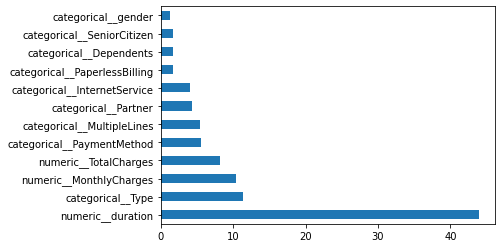

In [107]:

feat_importances = pd.Series(pipeline_cb['model'].feature_importances_, index=pipeline_cb['preprocessor'].get_feature_names_out())
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Таким образом, самые важные признаки оказались длительность договра, тип оплаты (ежемесячный, годовой) и  ежемесячные траты на услуги связи. Что соответствует здравому смыслу, если форма оплаты годовая логично, что клиент с меньшей вероятностью расторгнет догвор, а также лояльные клиенты, которые уже долго пользуются услугами компании.

## Матрица ошибок

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
# Предсказанные значения
y_pred = best_model_cb.predict(features_test)

# Истинные значения
y_true = target_test

# Получение матрицы ошибок
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1448   17]
 [ 107  186]]


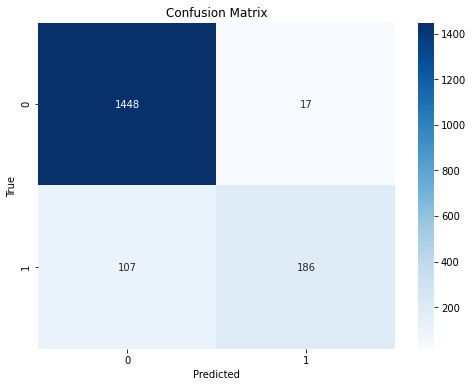

In [110]:
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [111]:
target_test.value_counts()

0    1465
1     293
Name: Exited, dtype: int64

Таким образом, модель пропустила 107 клиентов из 293, которые собирались уйти, что составляет 36% довольно много, но в то же время модель определила 17 клиентов (около 1%) как желающих уйти, но они уходить не собирались, соответственно им были предложены промокоды и этот убыток не так велик.

# Отчет по решению

Мы проанализировали данные оператора связи «Ниединогоразрыва.ком».

В рамках исследования необходимо было выполнить следующие пункты:
- провести EDA
- Разделить исходные данные на обучающую и тестовую выборки
- Провести кодирование категориальных признаков
- Создадим переменные для признаков и целевого признака
- Обучение моделей с подбором гиперпараметров
- Выбрать лучшую модель
- Провести финальное тестирование

Все шаги работы были успешно выполнены. На этапе предобработки данных были изменены типы данных, удаленны лишние признаки и сгенерирован новый признак 'Длительность договора'. 

Также было проведено исследование признаков на мультиколлинеарность, после чего были удаленны лишние признаки.

В данных был выявлен дисбаланс классов 84 на 16%. Для оценки моделей использовалась метрика AUC-ROC, которая не чувствительна к балансу классов.

Для построения модели машиного обучения были использованы количественные признаки:

  - MonthlyCharges  
  - TotalCharges   
  - duration 
  
А также категориальные признаки:

   - Type              
   - PaperlessBilling  
   - PaymentMethod    
   - gender 
   - Dependents
   - SeniorCitizen      
   - Partner           
   - InternetService  
   - MultipleLines

Были построенны модели LogisticRegression, CatBoostClassifier ,RandomForestClassifier.

Наилучшей моделью с показателем AUC-ROC на кроссвалидации 0.91 оказалась модель CatBoostClassifier со следующимим гиперпараметрами: model__depth: 5, model__learning_rate: 0.1, random_state: 220523

Так же был проведен анализ важности признаков выбранной модели, в ходе которго выявленно, что самые важные признаки это
 - длительность договра, 
 - тип оплаты (ежемесячный, годовой),
 - ежемесячные траты на услуги связи.
 
Что соответствует здравому смыслу, если форма оплаты годовая логично, что клиент с меньшей вероятностью расторгнет догвор, а также лояльные клиенты, которые уже долго пользуются услугами компании.

Значение AUC-ROC  модели на тестовой выборке составилo 0.92, что соответствует заявленному целевому уровню больше 0.85.

Была составлена матрица ошибок, где наглядно представленно количество  правильных и ложно определенных моделью клиентов в соответствии с классом ( ушел/не ушел). На основании которой в дальнейшем можно расчитать бизнесс метрики о затратах на промокоды, а также об убытках, связанных с утраченными клиентами.

